# Project Notebook

## 1. Initialisation

### 1.1 Installing and Loading Modules

In this section, relevant modules are installed and imported for use within the notebook.

In [ ]:
pip install git+https://github.com/bradkav/WIMpy_NREFT

  Cloning https://github.com/bradkav/WIMpy_NREFT to /tmp/pip-req-build-9ce6xk8f
  Running command git clone -q https://github.com/bradkav/WIMpy_NREFT /tmp/pip-req-build-9ce6xk8f


In [ ]:
pip install git+https://github.com/tedwards2412/paleopy

  Cloning https://github.com/tedwards2412/paleopy to /tmp/pip-req-build-ulq67pkj
  Running command git clone -q https://github.com/tedwards2412/paleopy /tmp/pip-req-build-ulq67pkj


In [ ]:
pip install git+https://github.com/cweniger/swordfish

  Cloning https://github.com/cweniger/swordfish to /tmp/pip-req-build-_zgftzom
  Running command git clone -q https://github.com/cweniger/swordfish /tmp/pip-req-build-_zgftzom


In [ ]:
# pip install pysrim

In [ ]:
import WIMpy

from WIMpy import DMUtils as wim

import paleopy
import swordfish

#import pysrim

In [ ]:
%matplotlib inline 

import numpy as np
from numpy import pi

import matplotlib.pyplot as plt
from matplotlib import rc


plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 11})
plt.rcParams.update({"legend.fontsize": 11})
plt.rcParams['figure.figsize'] = (16, 9)


import scipy as scipy
from scipy import interpolate

from random import *
from tqdm import tqdm

## Importing, Plotting and Fitting Initial Flux Data

Data from this paper (https://arxiv.org/pdf/1604.03858.pdf) but found via the WIMpy_NREFT github repository (https://github.com/bradkav/WIMpy_NREFT/tree/master/WIMpy/nu_spectra) are loaded into the notebook from the below code cell.

*There is also data available here for N13,O15 and F17 (http://www.sns.ias.edu/~jnb/SNdata/cnospectra.html) that could be used?*

### Loading Data

In [ ]:
### DSNB
DSNB = np.loadtxt("drive//MyDrive//fluxdata//DSNB.txt")
DSNB_x, DSNB_y = DSNB[:,0], DSNB[:,1]

### Atmospheric
atm = np.loadtxt("drive//MyDrive//fluxdata//atm.txt")
atm_x, atm_y = atm[:,0], atm[:,1]

### SOLAR BASED
B8 = np.loadtxt("drive//MyDrive//fluxdata//solar 8-B.txt")
B8_x, B8_y = B8[:,0], B8[:,1]

N13 = np.loadtxt("drive//MyDrive//fluxdata//solar 13-N.txt")
N13_x, N13_y = N13[:,0], N13[:,1]

O15 = np.loadtxt("drive//MyDrive//fluxdata//solar 15-O.txt")
O15_x, O15_y = O15[:,0], O15[:,1]

F17 = np.loadtxt("drive//MyDrive//fluxdata//solar 17-F.txt")
F17_x, F17_y = F17[:,0], F17[:,1]

hep = np.loadtxt("drive//MyDrive//fluxdata//solar hep.txt")
hep_x, hep_y = hep[:,0], hep[:,1]

pp = np.loadtxt("drive//MyDrive//fluxdata//solar pp.txt")
pp_x, pp_y = pp[:,0], pp[:,1]


### Combines all SOLAR sources
total_solar = np.concatenate((B8, N13, O15, F17, hep, pp))
ts_x, ts_y = total_solar[:,0], total_solar[:,1]

### Solar arrays for both dimensions
solar_arr_x = np.array([B8_x, N13_x, O15_x, F17_x, hep_x, pp_x], dtype = object)
solar_arr_y = np.array([B8_y, N13_y, O15_y, F17_y, hep_y, pp_y], dtype = object)
solar_arr_lab = np.array(["B8", "N13", "O15", "F17", "hep", "pp"])

###

The next code cell is a function to plot the data from the previous cell.

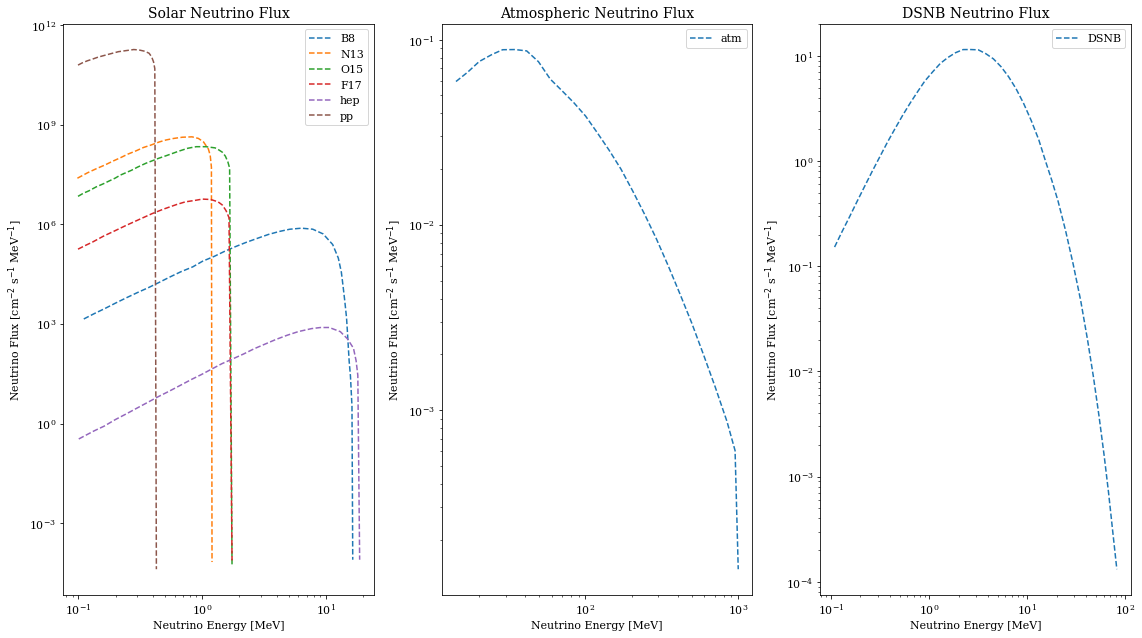

In [ ]:
def Plot(x_min=0, x_max=0, y_min=0, y_max=0, big = 0):

  y_label = "Neutrino Flux [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]"
  x_label = "Neutrino Energy [MeV]"

  if big != 0:
    plt.figure(figsize=(16,9))
    plt.title("Neutrino Fluxes", fontsize=14)
    for i in range(len(solar_arr_x)):
      plt.plot(solar_arr_x[i],solar_arr_y[i], label="{}".format(solar_arr_lab[i]), ls = '--')
    plt.plot(atm_x,atm_y, label="atm")
    plt.plot(DSNB_x,DSNB_y, label="DSNB")
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(color="black", alpha=.3, linewidth=1, linestyle="")
    #ax.grid(axis="y", color="black", alpha=.5, linewidth=.5)
    plt.minorticks_on()
    plt.legend()

  else:

    fig = plt.figure(figsize=(16,9))
    plt.subplot(1, 3, 1)
    for i in range(len(solar_arr_x)):
      plt.plot(solar_arr_x[i],solar_arr_y[i], label="{}".format(solar_arr_lab[i]), ls = '--')

    plt.title("Solar Neutrino Flux", fontsize=14)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if x_min != 0 and x_max != 0 and y_min != 0 and y_max != 0:
      plt.xlim(x_min, x_max)
      plt.ylim(y_min, y_max)
    plt.legend()
    plt.tight_layout()

    plt.subplot(1, 3, 2)
    plt.plot(atm_x,atm_y, label="atm", ls = '--')
    plt.title("Atmospheric Neutrino Flux", fontsize=14)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if x_min != 0 and x_max != 0 and y_min != 0 and y_max != 0:
      plt.xlim(x_min, x_max)
      plt.ylim(y_min, y_max)
    plt.legend()
    plt.tight_layout()


    plt.subplot(1, 3, 3)
    plt.plot(DSNB_x,DSNB_y, label="DSNB", ls = '--')
    plt.title("DSNB Neutrino Flux", fontsize=14)
    plt.yscale("log")
    plt.xscale("log")
    if x_min != 0 and x_max != 0 and y_min != 0 and y_max != 0:
      plt.xlim(x_min, x_max)
      plt.ylim(y_min, y_max)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.tight_layout();

Plot()

Below the function is used to plot again but by using the same axes for an easier comparison.

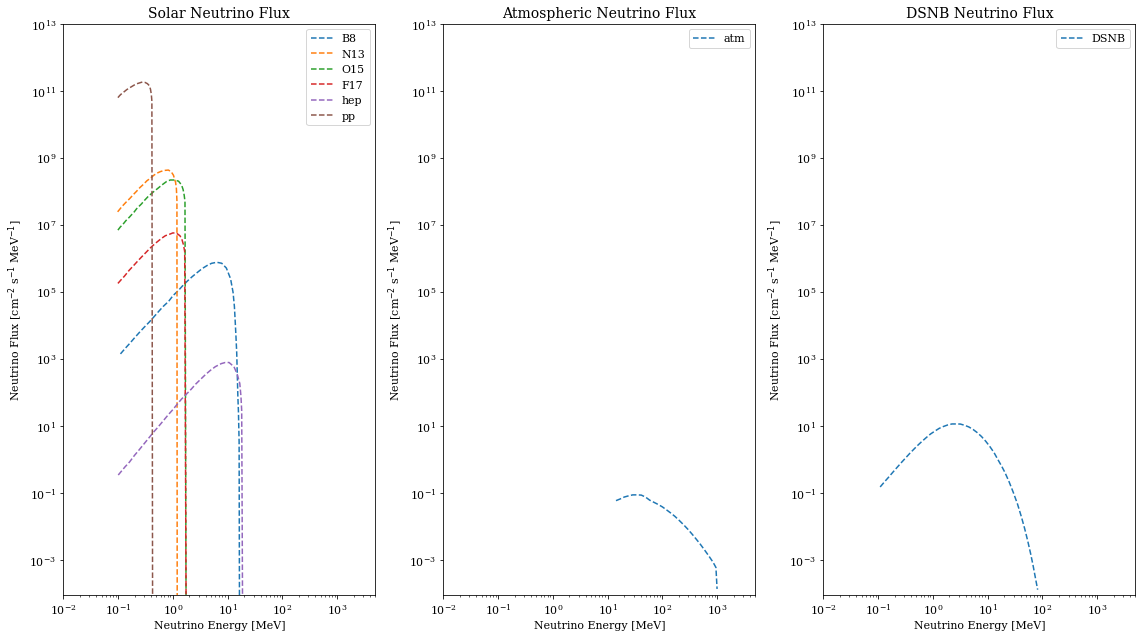

In [ ]:
Plot(0.01, 5000, 0.00009, 10e12) # Plotting with equal axis

And then the last code cell uses another variation of the function to plot the data all on one plot.

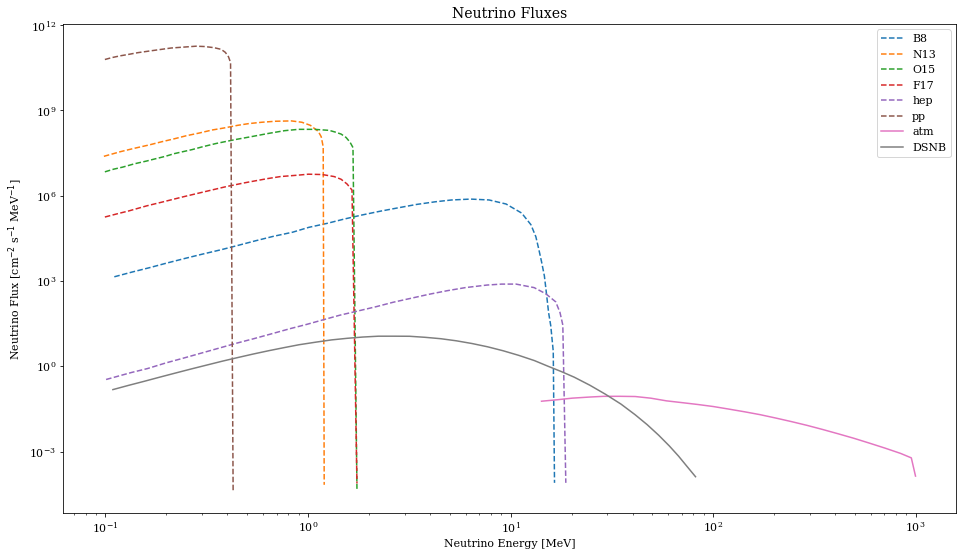

In [ ]:
Plot(0.01, 5000, 0.00009, 10e12, 1) # Plotting all on same axis

The next step is to combine all of the solar neutrino contributions into one dataset. This is accomplished within the next section via interpolation.

### Interpolating Solar Neutrino Datasets

In [ ]:
print('The array of contributions to combine', solar_arr_lab)

The array of contributions to combine ['B8' 'N13' 'O15' 'F17' 'hep' 'pp']


Setting `x_ref` as the standard x-valued dataset for each dataset to be interpolated onto.

In [ ]:
x_ref = np.linspace(0.1, 20, 100000)

x_exp = B8_x
y_exp = B8_y

f = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
B8_ref = f(x_ref).clip(min=0)

# plt.figure(figsize=(16,9))
# plt.loglog(x_exp,y_exp, label = 'real')
# plt.loglog(x_ref,y_ref, label = 'please')
# plt.legend()
# plt.show();

x_exp = N13_x
y_exp = N13_y

f = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
N13_ref = f(x_ref).clip(min=0)

x_exp = O15_x
y_exp = O15_y

f = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
O15_ref = f(x_ref).clip(min=0)

x_exp = F17_x
y_exp = F17_y

f = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
F17_ref = f(x_ref).clip(min=0)

x_exp = hep_x
y_exp = hep_y

f = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
hep_ref = f(x_ref).clip(min=0)

x_exp = pp_x
y_exp = pp_y

f = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
pp_ref = f(x_ref).clip(min=0)


Now that all of the data sets have been exposed to the interpolation method, they can be plotted against the existing datasets.

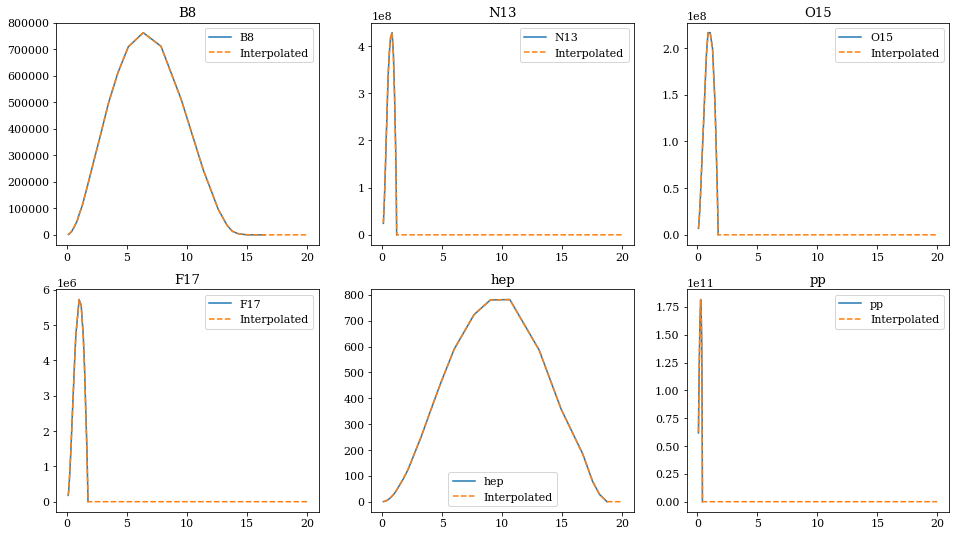

In [ ]:
solar_arr_y_ref = np.array([B8_ref, N13_ref, O15_ref, F17_ref, hep_ref, pp_ref], dtype = object)
solar_arr_lab = np.array(["B8", "N13", "O15", "F17", "hep", "pp"])


fig = plt.figure(figsize = (16,9))

x = np.linspace(0,10,100)
y = np.linspace(0,10,100)


for i in range(len(solar_arr_x)):
  plt.subplot(2, 3, i+1)
  plt.plot(solar_arr_x[i],solar_arr_y[i], label="{}".format(solar_arr_lab[i]))
  plt.plot(x_ref, solar_arr_y_ref[i], ls = '--', label="Interpolated")
  plt.title('{0}'.format(solar_arr_lab[i]))
  plt.legend()
  
plt.show();

These interpolated curves seem to fit the datasets well. Where for any negative values produced are replaced by zeros to ensure the fit doesn't produce unphysical results. Now these curves need to be added together, which is possible as they all share a common axis of x-values or energies.

Here we test just adding two of these new datasets together to make sure that they combine successfully.

[25248757.35435772 25357265.25981807 25465773.16527842 ...
        0.                0.                0.        ]


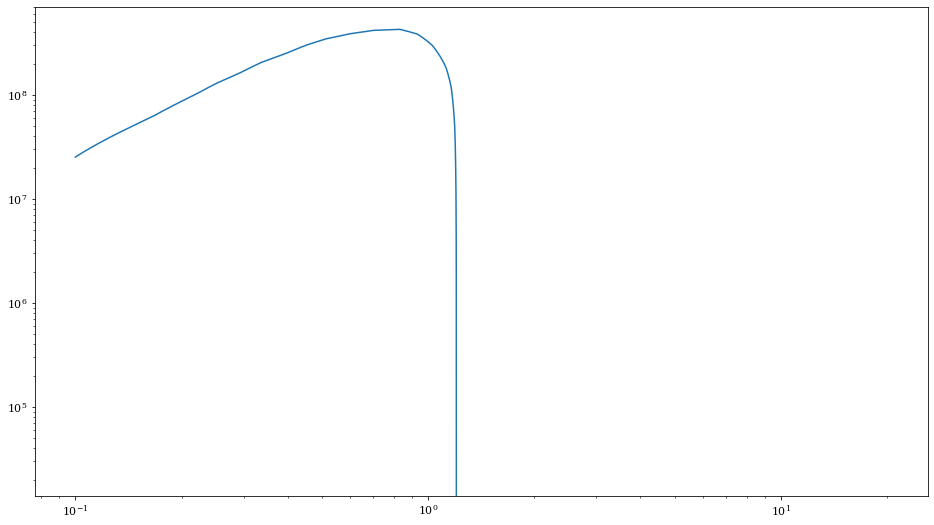

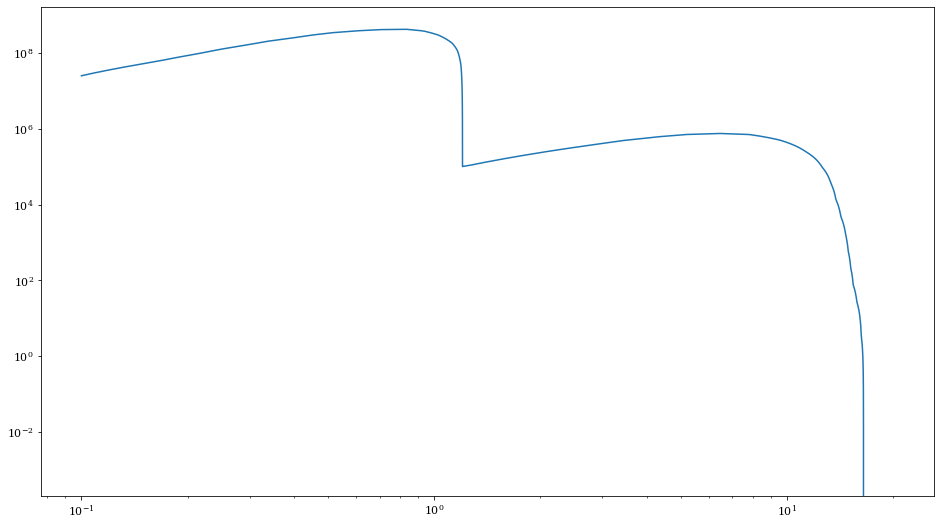

In [ ]:
b8n13 = B8_ref + N13_ref 

# print(B8_ref)
print(N13_ref)
plt.loglog(x_ref, N13_ref.clip(min=0)) # Figured out to get rid of negative interpolation values, clip anything below 0

plt.figure()
plt.loglog(x_ref,b8n13.clip(min=0))
plt.show();

It looks like this has been accomplished, lets try with the entire dataset.

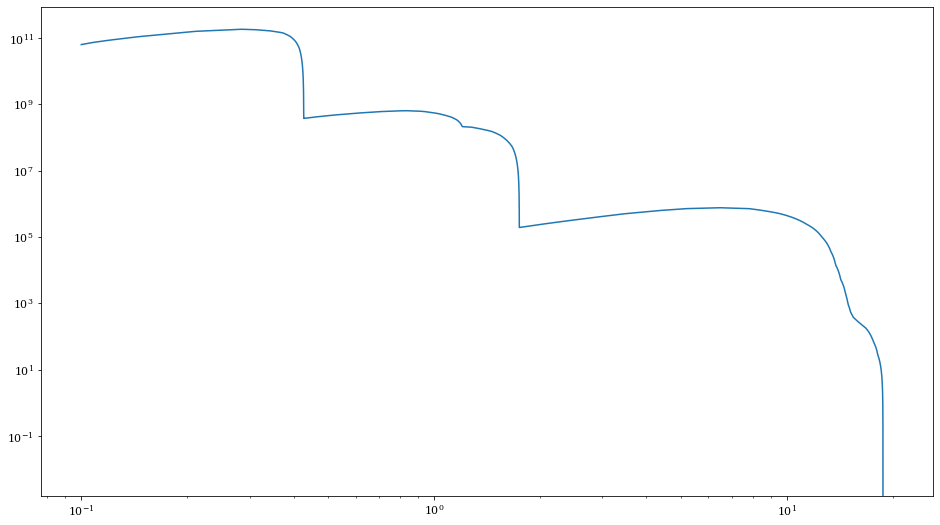

In [ ]:
tot_y = B8_ref + N13_ref + O15_ref + F17_ref + hep_ref + pp_ref

plt.figure(figsize = (16,9))
plt.loglog(x_ref, tot_y);

Now lets plot this new dataset onto what we already had.

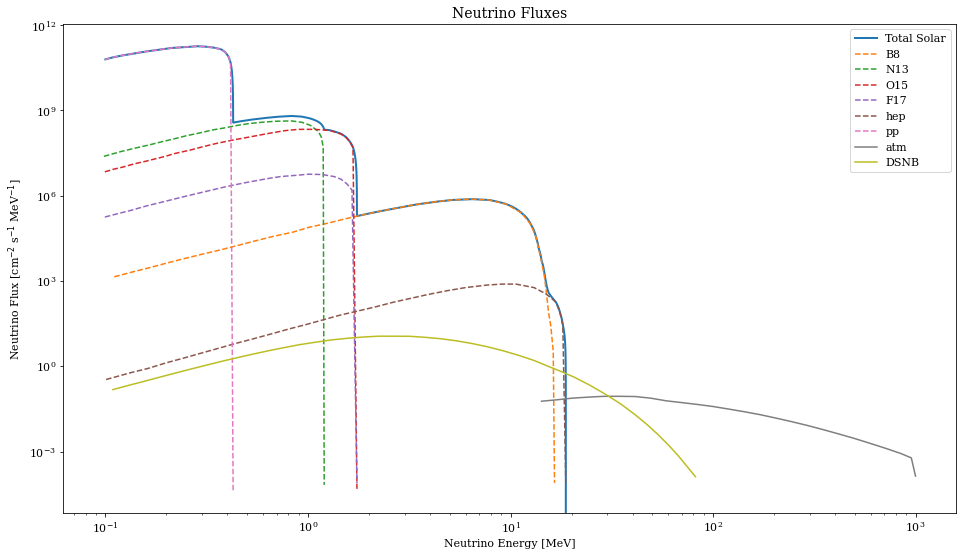

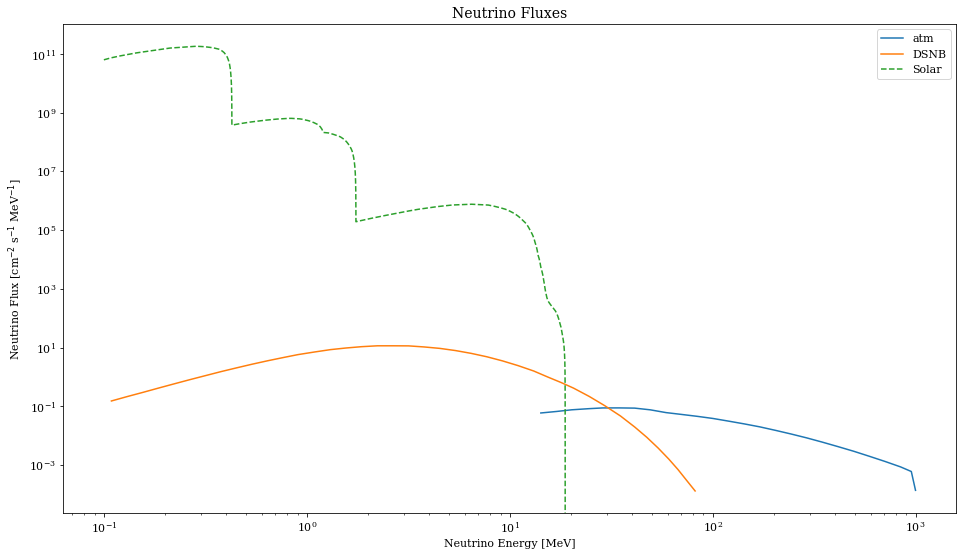

In [ ]:
y_label = "Neutrino Flux [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]"
x_label = "Neutrino Energy [MeV]"

plt.figure(figsize=(16,9))
plt.plot(x_ref, tot_y, label="Total Solar", linewidth = 2)
plt.title("Neutrino Fluxes", fontsize=14)
for i in range(len(solar_arr_x)):
  plt.plot(solar_arr_x[i],solar_arr_y[i], label="{}".format(solar_arr_lab[i]), ls = '--')
plt.plot(atm_x,atm_y, label="atm")
plt.plot(DSNB_x,DSNB_y, label="DSNB")

plt.yscale("log")
plt.xscale("log")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(color="black", alpha=.3, linewidth=1, linestyle="")
#ax.grid(axis="y", color="black", alpha=.5, linewidth=.5)
plt.minorticks_on()
plt.legend()
plt.savefig('full.png', bbox_inches='tight');

plt.figure(figsize=(16,9))
plt.title("Neutrino Fluxes", fontsize=14)
plt.plot(atm_x,atm_y, label="atm")
plt.plot(DSNB_x,DSNB_y, label="DSNB")
plt.plot(x_ref, tot_y, label="Solar", ls = '--')
plt.yscale("log")
plt.xscale("log")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(color="black", alpha=.3, linewidth=1, linestyle="")
#ax.grid(axis="y", color="black", alpha=.5, linewidth=.5)
plt.minorticks_on()
plt.legend()
plt.savefig('stripped.png', bbox_inches='tight');

We've got both the overlayed dataset on the original plot and a stripped down version with just the solar contribution via one line. From what was expected, this looks correct.

The final step for this plot is to introduce the delta functions for Beryllium and pep

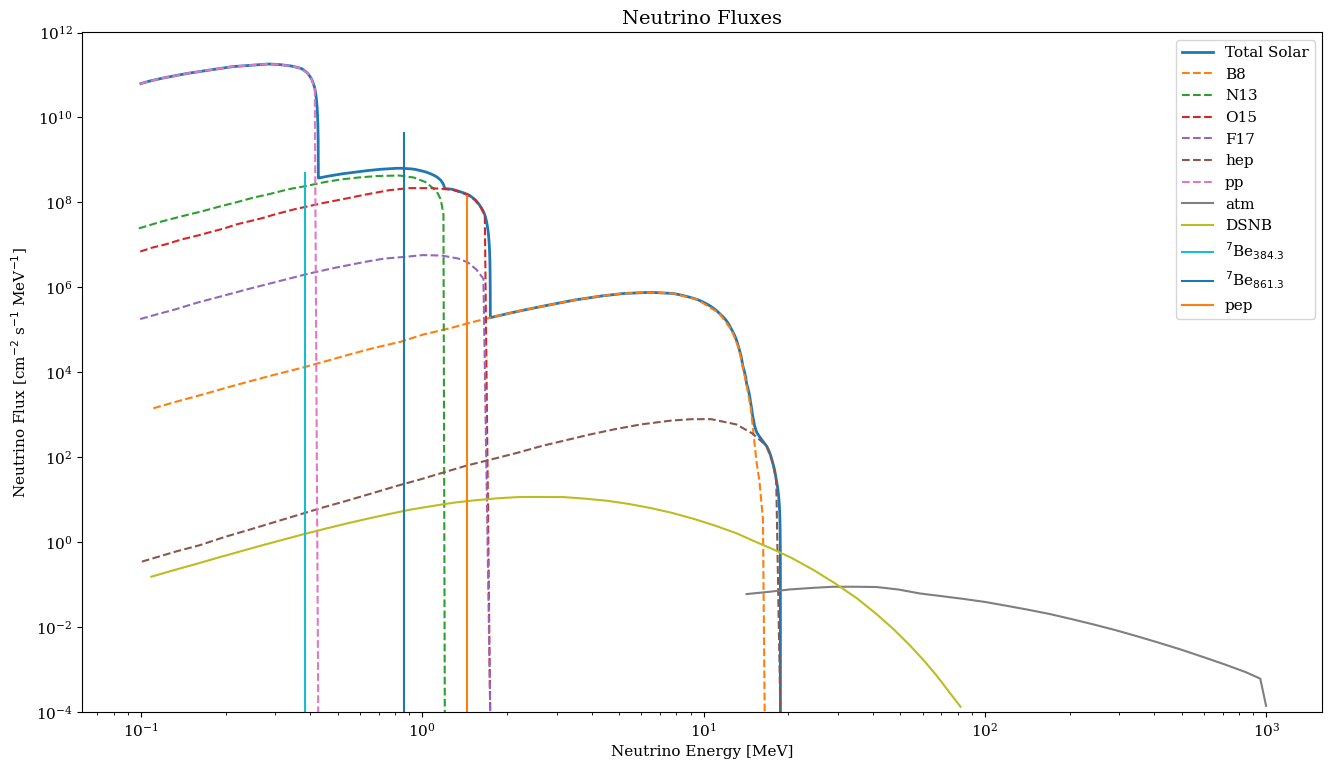

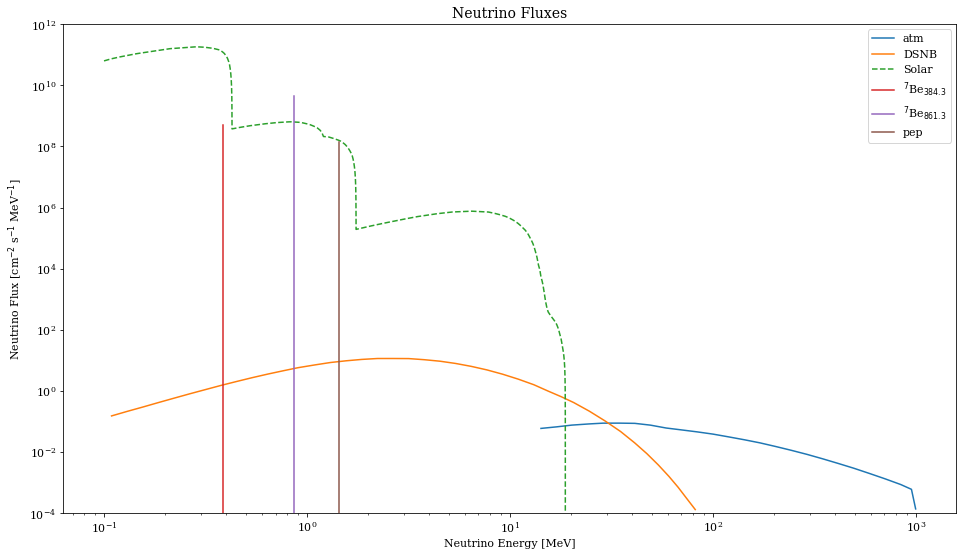

In [ ]:
y_label = "Neutrino Flux [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]"
x_label = "Neutrino Energy [MeV]"

# Delta functions
Be7_384_x = np.array([0.3843,0.3843])
Be7_384 = np.array([0,4.84e8])

Be7_861_x = np.array([0.8613,0.8613])
Be7_861 = np.array([0,4.35e9])

pep_x = np.array([1.440,1.440])
pep = np.array([0, 1.44e8])

###

plt.figure(figsize=(16,9), dpi=100)
plt.plot(x_ref, tot_y, label="Total Solar", linewidth = 2)
plt.title("Neutrino Fluxes", fontsize=14)
for i in range(len(solar_arr_x)):
  plt.plot(solar_arr_x[i],solar_arr_y[i], label="{}".format(solar_arr_lab[i]), ls = '--')
plt.plot(atm_x,atm_y, label="atm")
plt.plot(DSNB_x,DSNB_y, label="DSNB")

plt.plot(Be7_384_x, Be7_384, label="$^{7}$Be$_{384.3}$")
plt.plot(Be7_861_x, Be7_861, label="$^{7}$Be$_{861.3}$")
plt.plot(pep_x, pep, label="pep")
plt.ylim(1e-04, 1.01e12)
plt.yscale("log")
plt.xscale("log")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(color="black", alpha=.3, linewidth=1, linestyle="")
#ax.grid(axis="y", color="black", alpha=.5, linewidth=.5)
plt.minorticks_on()
plt.legend()
plt.savefig('full.png', bbox_inches='tight');



#################################### Stripped
plt.figure(figsize=(16,9))
plt.title("Neutrino Fluxes", fontsize=14)
plt.plot(atm_x,atm_y, label="atm")
plt.plot(DSNB_x,DSNB_y, label="DSNB")
plt.plot(x_ref, tot_y, label="Solar", ls = '--')

plt.plot(Be7_384_x, Be7_384, label="$^{7}$Be$_{384.3}$")
plt.plot(Be7_861_x, Be7_861, label="$^{7}$Be$_{861.3}$")
plt.plot(pep_x, pep, label="pep")
plt.ylim(1e-04, 1.01e12)
plt.yscale("log")
plt.xscale("log")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(color="black", alpha=.3, linewidth=1, linestyle="")
#ax.grid(axis="y", color="black", alpha=.5, linewidth=.5)
plt.minorticks_on()
plt.legend()
plt.savefig('stripped.png', bbox_inches='tight');

Now all of the sources for background neutrinos have been produced. It is important to figure out spectra of the CC supernovae produced neutrinos.

## Supernovae Rate (To Complete)

## DNSB Flux

In this section, it is attempted to reproduce the DNSB flux calculated within the paper (https://arxiv.org/abs/1906.05800).

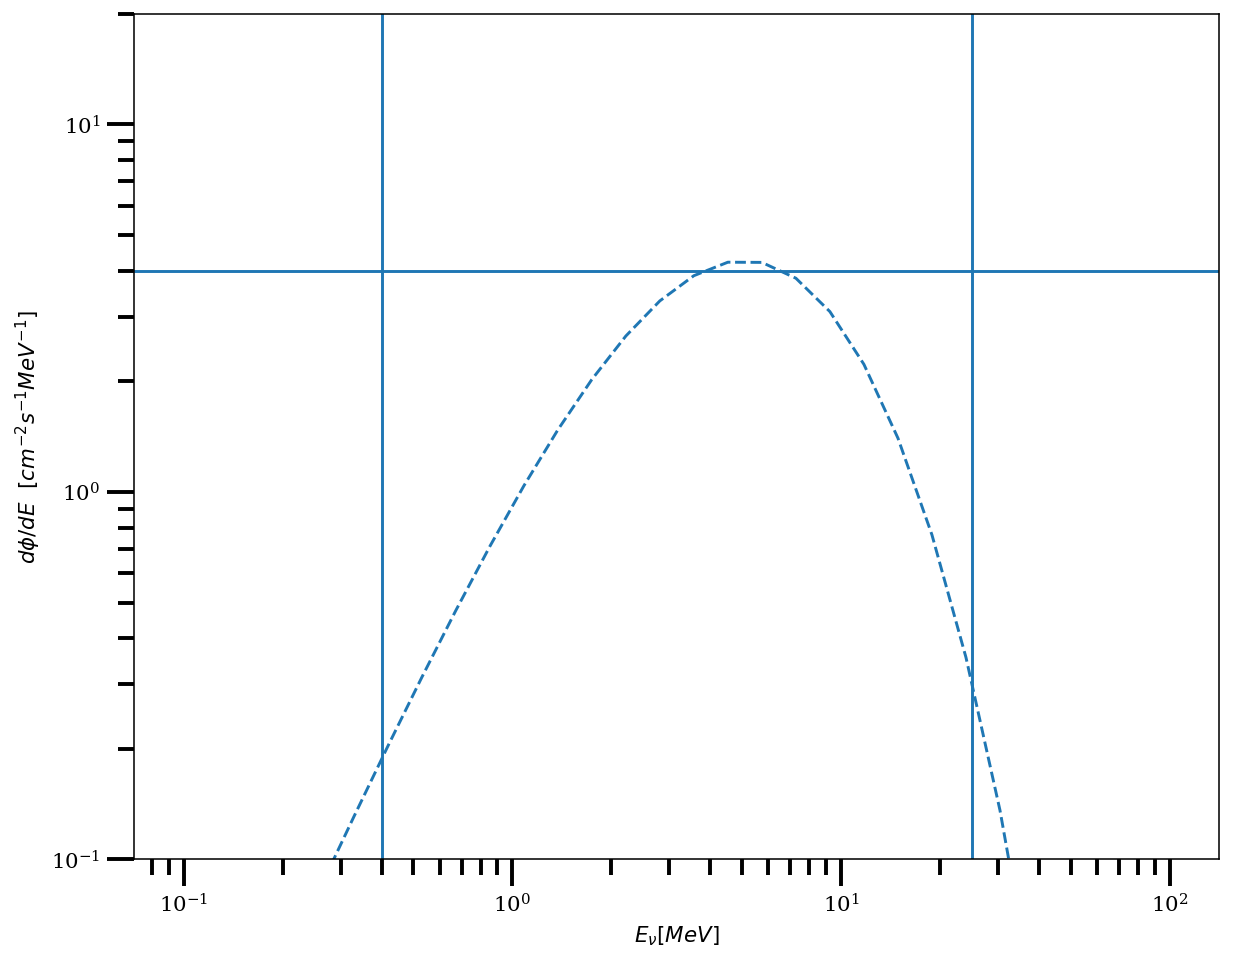

In [ ]:
Elist = np.logspace(2,5,30)
#T_ve = 8.93e3 # keV
#Etot = 3.05e52 # ergs

T_ve = 6.6e3
Etot = 5e52

Etot *= 6.242e+8 # ergs to keV
z = np.linspace(0.01,100,1000)

from scipy.integrate import quad

def dzdt(z, H0=70, omegaM=0.3, omegaA=0.7):
    # z is the redshift
    # H0 is the hubble constant [km s^-1 Mpc^-1]
    # OmegaM is the matter energy density
    # OmegaA is the cosmological constant energy density
    # dzdt in units s^-1
    H0 *= 3.24077929e-20 # convert H0 to s^-1 i.e. converting km to Mpc
    dzdt = H0*(1+z)*(omegaM*(1+z)**3 + omegaA)**0.5
    return dzdt

dzdt_t = dzdt(z)

def R_CCSN(z):
    # Output in s^-1 Mpc^-3
#     Z, R = np.loadtxt("../data/CCSupernova_rate.txt", unpack=True)
#     R *= 3.16887646e-8 # year^-1 to s^-1
#     Rate = interp1d(Z, R, bounds_error=False, fill_value = "extrapolate")
#     return Rate(z)
    R = 0.015*(1+z)**2.7/(1+((1+z)/2.9)**5.6)/143
    return R*3.16887646e-8 # year^-1 to s^-1


def dNdE(E, Etot, T):
    # E is the list of energies [keV]
    # T is the neutrino temperature [keV]
    # Etot is the total energy emitted in the CC supernova [kev]
    # dNdE in keV^-1
    dom = np.exp(E/T) + 1
    return Etot*120.*(E**2.)/7./(np.pi**4.)/(T**4.)/dom

def Nu_flux(E):
    # Output in keV^-1 s^-1 cm^-2
    def integrand(z):
        Eprime = E*(1+z)
        return R_CCSN(z)*dNdE(Eprime, Etot, T_ve)*(1+z)/np.abs(dzdt(z))
    
    Nuflux = quad(integrand,0,10)[0]
    c = 9.7155971e-15 # Mpc s^-1
    Nuflux *= 1.05026504e-49 # convert Mpc^-2 to cm^-2
    return Nuflux*c


Flux_DSNB = np.zeros_like(Elist)
for i, E in enumerate(Elist):
    Flux_DSNB[i] = Nu_flux(E)

Flux_DSNB *= 6. # To account for the fact that there are 6 neutrino species
Flux_DSNB1 = Flux_DSNB * 7.0e-38/6.6551079e-26 # neutrino_interaction_strength/nucleon_mass
Flux_DSNB2 = Flux_DSNB1 * 3.154e+7*1e9 # s^-1 to Gyr^-1


plt.figure(figsize =(10,8), dpi=140)
plt.loglog(Elist/1000, Flux_DSNB*1000, label="DNSB", ls="--")
plt.xlabel("$ E_{\\nu}  [MeV]$")
plt.ylabel("$d\\phi / dE$  $[cm^{-2}s^{-1}MeV^{-1}]$")

#plt.loglog(Elist/1000, Flux_DSNB1*1000, label="DNSB")
#plt.loglog(Elist/1000, Flux_DSNB2*1000, label="DNSB")
plt.ylim(0.1,20)
plt.minorticks_on()
plt.tick_params(which= "minor", width=2, length = 8)
plt.tick_params(which= "major", width=2, length = 14)
plt.axhline(4)
plt.axvline(0.4)
plt.axvline(25);
#plt.tick_params(axis='y', which='minor')

This reproduction is somewhat close to the dimensions that we wanted to acheive but is not exactly correct.

This code above calculates the flux via electron neutrinos temp. However as stated within (https://arxiv.org/abs/1004.3311) that "T = 8 MeV for $\nu_µ , \nu_τ , ¯\nu_µ, ¯\nu_τ$ , T = 5 MeV for $¯\nu_e$, and T = 4 MeV for $\nu_e$". Within this paper it also states the total energy in erg is 5e52.

3.121e+61 KeV


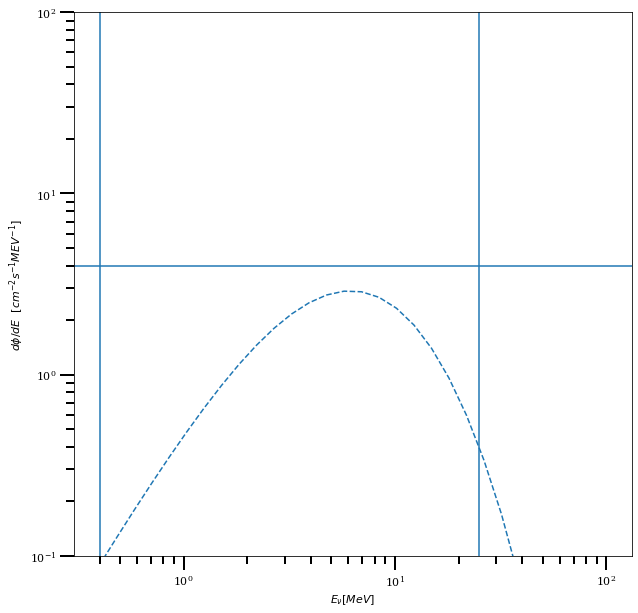

In [ ]:
Elist = np.logspace(2.6,5,30)
#T_ve = 8.93e3 # keV
#Etot = 3.05e52 # ergs

T_ve = 8e3
Etot = 5e52

Etot *= 6.242e+8 # ergs to keV
z = np.linspace(0.1,100,1000)

dzdt_t = dzdt(z)


test = np.zeros_like(Elist)
for i, E in enumerate(Elist):
    test[i] = Nu_flux(E)

test *= 6. # To account for the fact that there are 6 neutrino species
test1 = test * 7.0e-38/6.6551079e-26 # neutrino_interaction_strength/nucleon_mass
test2 = test1 * 3.154e+7*1e9 # s^-1 to Gyr^-1


plt.figure(figsize =(10,10))
plt.loglog(Elist/1000, test*1000, label="DNSB", ls="--")
plt.xlabel("$ E_{\\nu}  [MeV]$")
plt.ylabel("$d\\phi / dE$  $[cm^{-2}s^{-1}MEV^{-1}]$")

#plt.loglog(Elist/1000, Flux_DSNB1*1000, label="DNSB")
#plt.loglog(Elist/1000, Flux_DSNB2*1000, label="DNSB")

plt.ylim(0.1,100)
plt.minorticks_on()
plt.tick_params(which= "minor", width=2, length = 8)
plt.tick_params(which= "major", width=2, length = 14)
plt.axhline(4)
plt.axvline(0.4)
plt.axvline(25);
#plt.tick_params(axis='y', which='minor')

print(Etot, "KeV")

Now that the DNSB has been somewhat been calculated, the focus can move over to being able to calculate the cross sections for the range of neutrino energy values.

## CE$\nu$NS Cross Sections

By using WIMpy it is possible to garner results for the cross sections required. Throughout this section functions used will be explained.

### Maximum Recoil Energies

`ERmax` is used to calculate the maximum nuclear recoil energy (KeV) for a given neutrino energy (MeV) and atomic mass number.

```python
#Maximum nuclear recoil energy (in keV)
#for a given neutrino energy (in MeV)
def ERmax(E_nu, A):

    #Nuclear mass in MeV
    m_A_MeV = A*0.9315e3
    return 1e3*(2.0*E_nu*E_nu)/(m_A_MeV + 2*E_nu)
```

This is tested below via Caesium-133

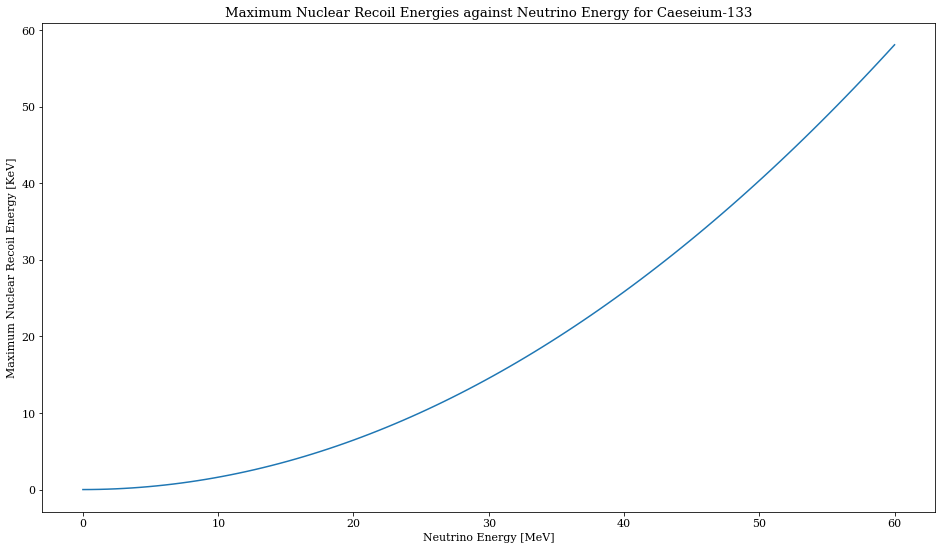

In [ ]:
E_nu = np.linspace(0, 60, 100) # Energies in MeV
A = 133 # 133-Cs

E_R = wim.ERmax(E_nu, A)

plt.plot(E_nu, E_R)
plt.xlabel("Neutrino Energy [MeV]")
plt.ylabel("Maximum Nuclear Recoil Energy [KeV]")
plt.title("Maximum Nuclear Recoil Energies against Neutrino Energy for Caeseium-133");

It is interesting to note the effect on the maximum recoil energy for different nuclear masses.

#### Nuclear Mass Effect on Recoil Energy

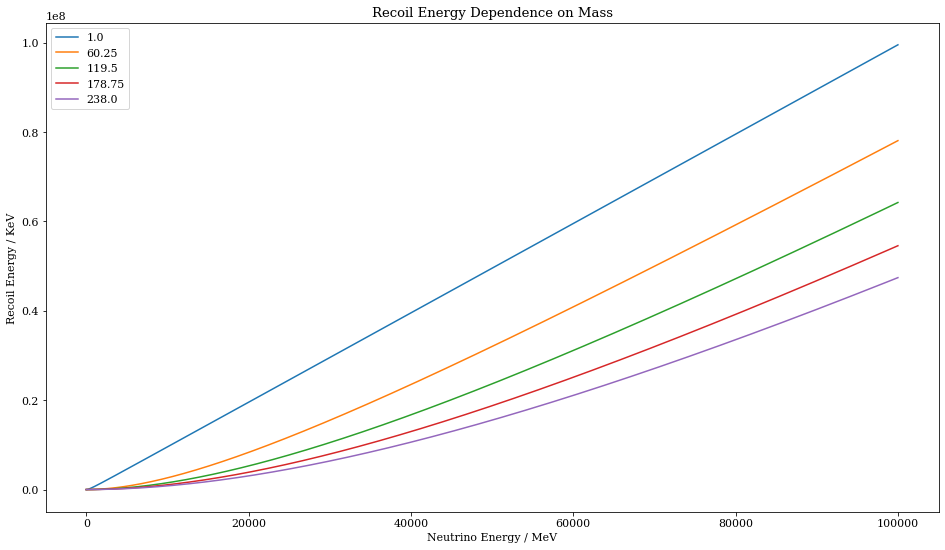

In [ ]:
# Plotting Dependence on Mass for Recoil Energies

masses = np.linspace(1,238,5) # 238 Being the Largest Mass that SRIM may consider
energy_range = np.linspace(1.1e-6,10*10e3,10000) # in MeV

plt.figure(figsize=(16,9))
plt.title("Recoil Energy Dependence on Mass")

for i in range(len(masses)):
  recoils = wim.ERmax(energy_range, masses[i])
  plt.plot(energy_range,recoils, label="{0}".format(masses[i]))

plt.xlabel("Neutrino Energy / MeV")
plt.ylabel("Recoil Energy / KeV")
plt.legend();

Now its time to test the function and generate some differential cross sections for caesium-133.

### Standard Helm Form Factor Calculation

The next function defines the form factor for spin independent scattering, which is required for coherent neutrino scattering.

```python
# Standard Helm Form Factor for SI scattering

def calcSIFormFactor(E, m_N, old=False):

    #Define conversion factor from amu-->keV
    amu = 931.5*1e3

    #Convert recoil energy to momentum transfer q in keV
    q1 = np.sqrt(2*m_N*amu*E)

    #Convert q into fm^-1
    q2 = q1*(1e-12/1.97e-7)
    
    #Calculate nuclear parameters
    s = 0.9
    a = 0.52
    c = 1.23*(m_N**(1.0/3.0)) - 0.60
    R1 = np.sqrt(c*c + 7*pi*pi*a*a/3.0 - 5*s*s)
    
    if (old):
        R1 = np.sqrt((1.2**2)*m_N**(2.0/3.0) - 5)
 
    x = q2*R1
    J1 = np.sin(x)/x**2 - np.cos(x)/x
    F = 3*J1/x
    
    formfactor = (F**2)*(np.exp(-(q2*s)**2))
    #formfactor[E < 1e-3] = 1.0
    return formfactor
```

### Differential Cross Section Calculation

Then we require a function to calculate the differential neutrino cross sections.

```python
def xsec_CEvNS(E_R, E_nu, N_p, N_n):
    """
    Calculates the differential cross section for
    Coherent Elastic Neutrino-Nucleus Scattering.
    
    Parameters
    ----------
    E_R : float
        Recoil energy (in keV)
    E_nu : float
        Neutrino energy (in MeV)
    N_p   : int
        Number of protons in target nucleus
    N_n   : int
        Number of neutrons of target nucleus
        
    Returns
    -------
    float
        Differential scattering cross section 
        (in cm^2/keV)
    """
    
    A = N_p + N_n
    Z = N_p
    
    m_A = A*0.9315 #Mass of target nucleus (in GeV)
    q = np.sqrt(2.0*E_R*m_A) #Recoil momentum (in MeV)
    #Note: m_A in GeV, E_R in keV, E_nu in MeV
    
    #Calculate SM contribution
    Qv = (A-Z) - (1.0-4.0*SIN2THETAW)*Z #Coherence factor
    
    xsec_SM = (G_FERMI*G_FERMI/(4.0*np.pi))*Qv*Qv*m_A*   \
        (1.0-(q*q)/(4.0*E_nu*E_nu))
    
    #Calculate New-Physics correction from Z' coupling
    #Assume universal coupling to quarks (u and d)
    #QvNP = 3.0*A*gsq

    #Factor of 1e6 from (GeV/MeV)^2
    #G_V = 1 - 1e6*(SQRT2/G_FERMI)*(QvNP/Qv)*1.0/(q*q + m_med*m_med)
    
    #Convert from (GeV^-3) to (cm^2/keV)
    #and multiply by form factor
    return xsec_SM*1e-6*(1.98e-14)*(1.98e-14)*calcSIFormFactor(E_R, A)

```

### Generating Explicit Cross Sections using Caesium-133

In [ ]:
E_nu = np.linspace(5, 60, 101) # Energies in MeV
A = 133 # 133-Cs
print(E_nu)

N_p = 55
N_n = A - N_p

[ 5.    5.55  6.1   6.65  7.2   7.75  8.3   8.85  9.4   9.95 10.5  11.05
 11.6  12.15 12.7  13.25 13.8  14.35 14.9  15.45 16.   16.55 17.1  17.65
 18.2  18.75 19.3  19.85 20.4  20.95 21.5  22.05 22.6  23.15 23.7  24.25
 24.8  25.35 25.9  26.45 27.   27.55 28.1  28.65 29.2  29.75 30.3  30.85
 31.4  31.95 32.5  33.05 33.6  34.15 34.7  35.25 35.8  36.35 36.9  37.45
 38.   38.55 39.1  39.65 40.2  40.75 41.3  41.85 42.4  42.95 43.5  44.05
 44.6  45.15 45.7  46.25 46.8  47.35 47.9  48.45 49.   49.55 50.1  50.65
 51.2  51.75 52.3  52.85 53.4  53.95 54.5  55.05 55.6  56.15 56.7  57.25
 57.8  58.35 58.9  59.45 60.  ]


So now we have a range of neutrino energy values which can be used to find some cross sections.

In [ ]:
E_R = wim.ERmax(E_nu, A)
print(E_R)

[ 0.40355288  0.49721309  0.60063744  0.71382568  0.83677753  0.96949276
  1.11197108  1.26421225  1.426216    1.59798207  1.77951021  1.97080015
  2.17185163  2.3826644   2.60323819  2.83357274  3.0736678   3.3235231
  3.58313838  3.85251339  4.13164786  4.42054153  4.71919415  5.02760545
  5.34577518  5.67370307  6.01138886  6.3588323   6.71603313  7.08299107
  7.45970589  7.84617731  8.24240507  8.64838892  9.0641286   9.48962384
  9.92487439 10.36987999 10.82464037 11.28915529 11.76342446 12.24744765
 12.74122458 13.24475501 13.75803866 14.28107528 14.81386461 15.35640639
 15.90870036 16.47074626 17.04254384 17.62409282 18.21539296 18.81644398
 19.42724564 20.04779768 20.67809982 21.31815182 21.96795342 22.62750435
 23.29680435 23.97585317 24.66465055 25.36319622 26.07148993 26.78953142
 27.51732043 28.25485669 29.00213996 29.75916996 30.52594645 31.30246916
 32.08873782 32.88475219 33.69051201 34.506017   35.33126692 36.16626151
 37.0110005  37.86548363 38.72971066 39.60368131 40.

Now we have all of the maximum recoil energies in kev for each specific neutrino energy.

We want to take the integral of the differential cross section in the boundary of zero to the maximum recoil energy. This can be accomplished by constraining the neutrino energy and creating a range of recoil energies up to the maximum energy and integrating the data set numerically to generate an explicit cross section for each neutrino energy.

14.522043251485483


/usr/local/lib/python3.7/dist-packages/WIMpy/DMUtils.py:210: RuntimeWarning: invalid value encountered in true_divide
  J1 = np.sin(x)/x**2 - np.cos(x)/x
/usr/local/lib/python3.7/dist-packages/WIMpy/DMUtils.py:210: RuntimeWarning: divide by zero encountered in true_divide
  J1 = np.sin(x)/x**2 - np.cos(x)/x


1.7290406423438835e-38

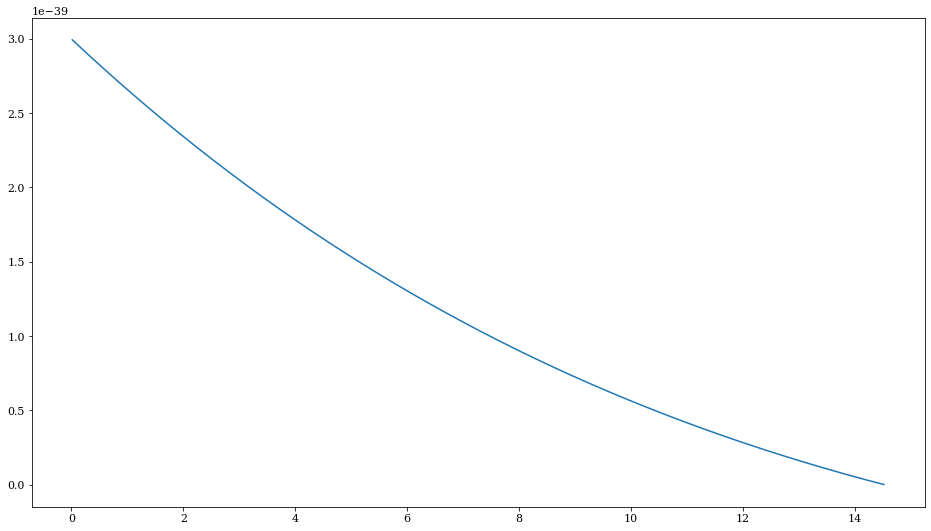

In [ ]:
test_E_R = wim.ERmax(30, A)    # Getting E_R Max
print(test_E_R) 

test_bounds = np.linspace(0, test_E_R, 1000)   # G
test_cross = wim.xsec_CEvNS(test_bounds, 30, N_p, N_n)


test_cross[np.isnan(test_cross)] = 0

#plt.plot(test_bounds, test_cross)

#print(test_cross)

plt.plot(test_bounds[1:], test_cross[1:])

scipy.integrate.simps(test_cross[1:],test_bounds[1:])

Explicit Cross Sections are calculated in the cell below through numerical integration.

In [ ]:
cross_secs = np.zeros(len(E_nu))

for i, NE in enumerate(E_nu):
  bounds = np.linspace(0,E_R[i],100)
  cross_temp = wim.xsec_CEvNS(bounds, NE, N_p, N_n)

  cross_temp[np.isnan(cross_temp)] = 0
  integral = scipy.integrate.simps(cross_temp[1:],bounds[1:])

  cross_secs[i] = integral

/usr/local/lib/python3.7/dist-packages/WIMpy/DMUtils.py:210: RuntimeWarning: invalid value encountered in true_divide
  J1 = np.sin(x)/x**2 - np.cos(x)/x
/usr/local/lib/python3.7/dist-packages/WIMpy/DMUtils.py:210: RuntimeWarning: divide by zero encountered in true_divide
  J1 = np.sin(x)/x**2 - np.cos(x)/x


Explicit Cross sections are plotted below.

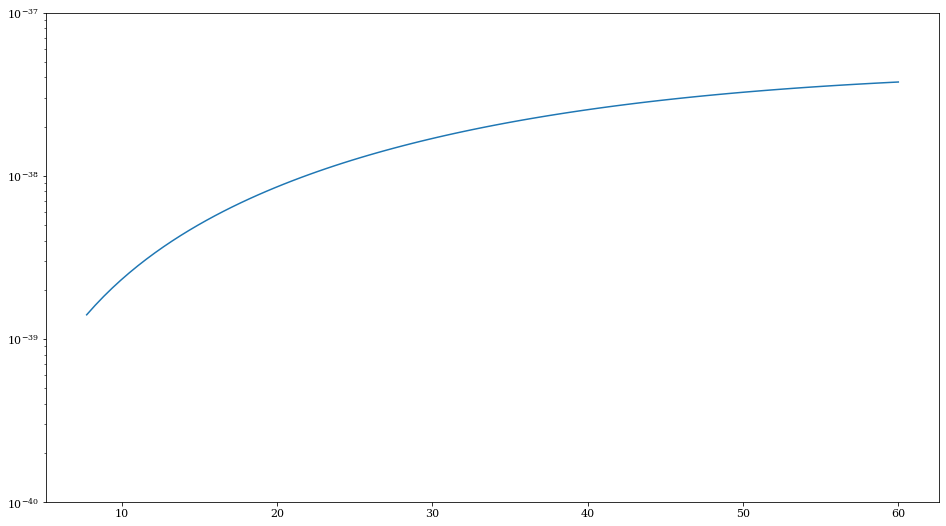

In [ ]:
#print(cross_secs)
plt.semilogy(E_nu[5:], cross_secs[5:])
plt.ylim(1e-40, 1e-37)

cross_secs_CS = cross_secs

In [ ]:
E_nu = np.linspace(5, 60, 101) # Energies in MeV

print(len(E_nu))
A = 40 # 40-Ar
E_R = wim.ERmax(E_nu, A)

N_p = 18
N_n = A - N_p

cross_secs_Ar = np.array([])

for i, NE in enumerate(E_nu):
  bounds = np.linspace(0,E_R[i],100)
  cross_temp = wim.xsec_CEvNS(bounds, NE, N_p, N_n)

  cross_temp[np.isnan(cross_temp)] = 0
  integral = scipy.integrate.simps(cross_temp[1:],bounds[1:])
  #print(integral)
  cross_secs_Ar = np.append(cross_secs, integral)



101


/usr/local/lib/python3.7/dist-packages/WIMpy/DMUtils.py:210: RuntimeWarning: invalid value encountered in true_divide
  J1 = np.sin(x)/x**2 - np.cos(x)/x
/usr/local/lib/python3.7/dist-packages/WIMpy/DMUtils.py:210: RuntimeWarning: divide by zero encountered in true_divide
  J1 = np.sin(x)/x**2 - np.cos(x)/x


Function for calculating and plotting explicit cross sections for a range of Neutrino energies for a designated target nucleus.

In [ ]:
def CrossSections(A, N_p):
  E_nu = np.linspace(0, 60, 201) # Energies in MeV
  N_n = A - N_p
  E_R = wim.ERmax(E_nu, A)

  cross_secs = np.zeros(len(E_nu))

  for i, NE in enumerate(E_nu):
    bounds = np.linspace(0,E_R[i],100)
    cross_temp = wim.xsec_CEvNS(bounds, NE, N_p, N_n)
    cross_temp[np.isnan(cross_temp)] = 0
    integral = scipy.integrate.simps(cross_temp[1:],bounds[1:])
    cross_secs[i] = integral


  plt.semilogy(E_nu[16:], cross_secs[16:])
  print(E_nu[16])

  return cross_secs

Plotting and calculating explicit cross sections for multiple targets, in order to validate method.

4.8
4.8


/usr/local/lib/python3.7/dist-packages/WIMpy/DMUtils.py:704: RuntimeWarning: invalid value encountered in true_divide
  (1.0-(q*q)/(4.0*E_nu*E_nu))
/usr/local/lib/python3.7/dist-packages/WIMpy/DMUtils.py:210: RuntimeWarning: invalid value encountered in true_divide
  J1 = np.sin(x)/x**2 - np.cos(x)/x
/usr/local/lib/python3.7/dist-packages/WIMpy/DMUtils.py:210: RuntimeWarning: divide by zero encountered in true_divide
  J1 = np.sin(x)/x**2 - np.cos(x)/x
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadrature.py:376: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadrature.py:378: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +
/usr/local/lib/python3.7/dist-packages/WIMpy/DMUtils.py:704: RuntimeWarning: invalid value encountered in true_divide
  (1.0-(q*q)/(4.0*E_nu*E_nu))
/usr/local/lib/python3.7/dist-packages/WIMpy/DMUtils.py:210: RuntimeWarning: invali

4.8
4.8


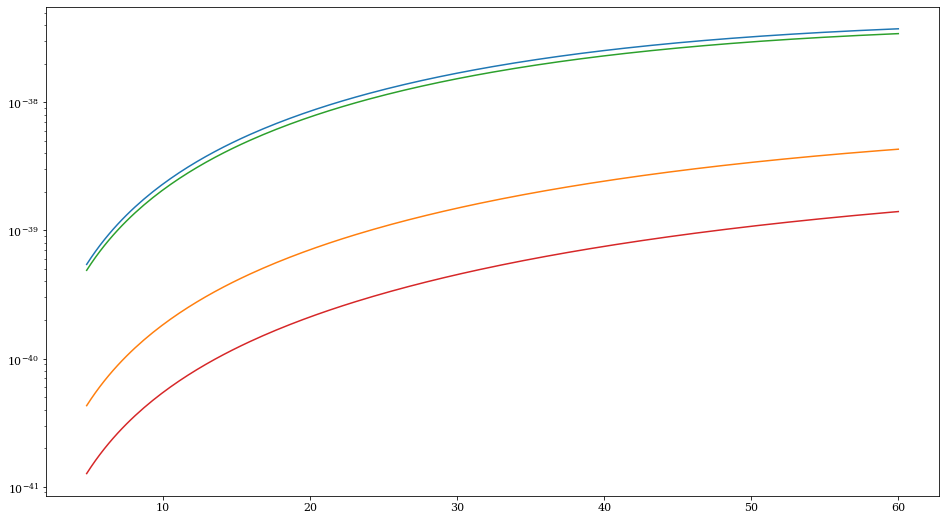

In [ ]:
CS_CS = CrossSections(133, 55)
AR_CS = CrossSections(40, 18)
I_CS = CrossSections(127, 53)
NA_CS = CrossSections(23, 11)

Refined plot

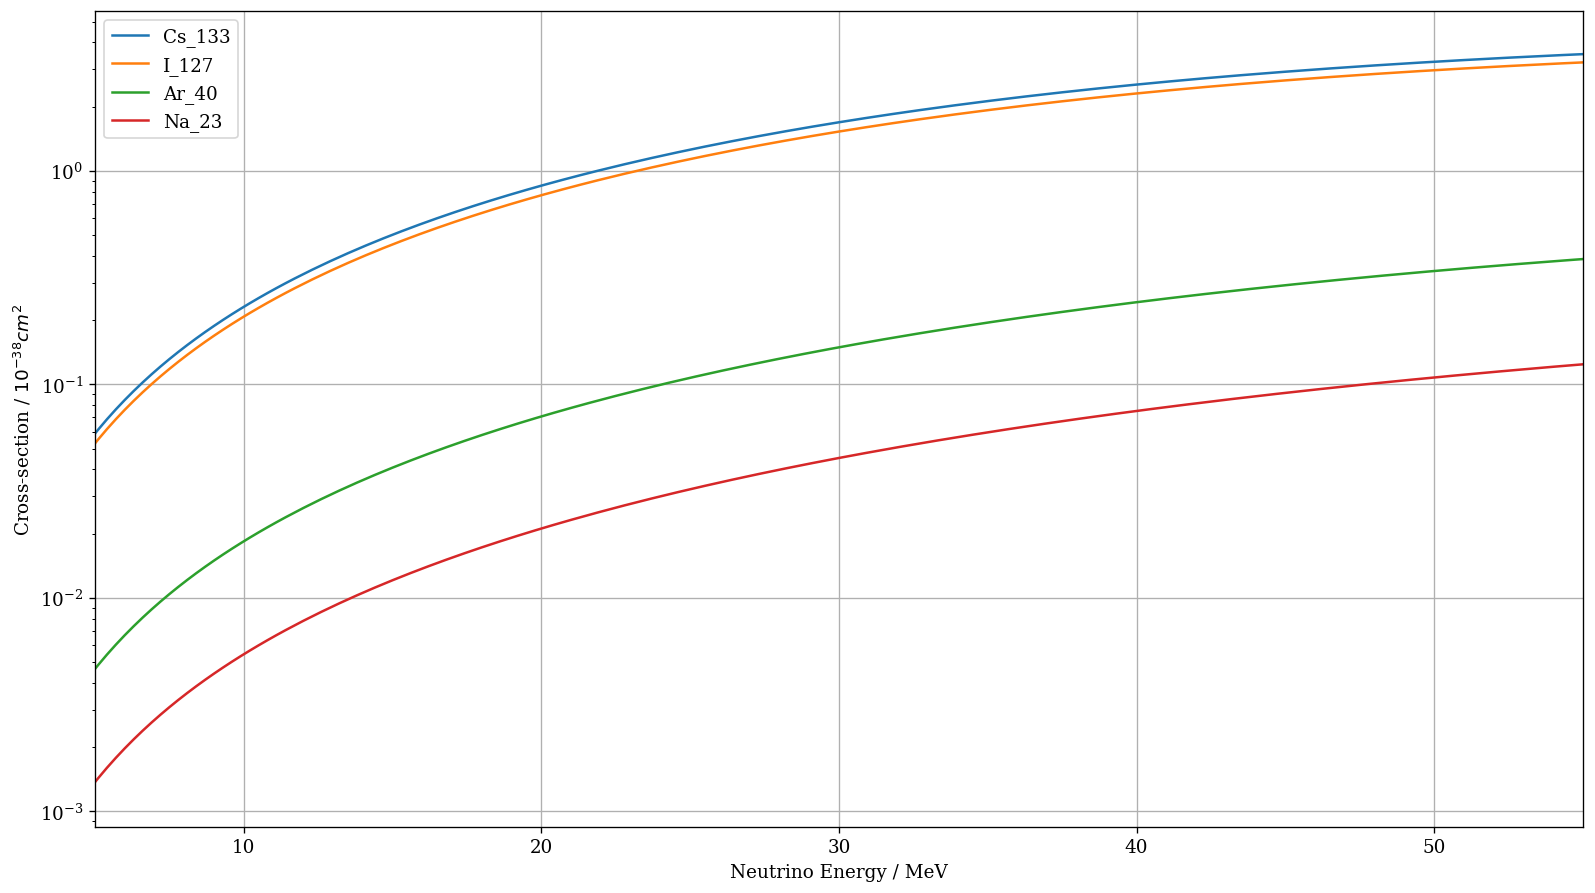

In [ ]:
E_nu = np.linspace(0, 60, 201) # Energies in MeV

plt.figure(figsize=(16,9), dpi=120)

plt.semilogy(E_nu[16:], CS_CS[16:]*1e38, label='Cs_133')
plt.semilogy(E_nu[16:], I_CS[16:]*1e38, label='I_127')
plt.semilogy(E_nu[16:], AR_CS[16:]*1e38, label='Ar_40')
plt.semilogy(E_nu[16:], NA_CS[16:]*1e38, label='Na_23')
plt.grid()
plt.ylabel('Cross-section / $10^{-38} cm^2$')
plt.xlabel('Neutrino Energy / MeV')
plt.xlim(5,55)
plt.legend();


This is what we wanted! Our method for calculating cross sections is valid. Now we can move onto figuring out SRIM and the data it provides.

## SRIM

### Cleaning Generated SRIM Data

Via paleopy, CleanSRIM.ipynb can be used to clean the data files generated via SRIM.

```python
infile = "Sulfur in Epsomite.txt" # Raw Data
outfile = "S-Eps.txt" # Cleaned Data

N_skip = 0

E_list = np.loadtxt(infile, usecols=(0,), skiprows=N_skip)
Eunits_list = np.loadtxt(infile, usecols=(1,), dtype=str, skiprows=N_skip)

for i in range(len(E_list)):
    unit = Eunits_list[i]
    if (unit == "eV"):
        E_list[i] *= 1e-3
    elif (unit == "MeV"):
        E_list[i] *= 1e3
        
dEedx =  np.loadtxt(infile, usecols=(2,), skiprows=N_skip)
dEndx =  np.loadtxt(infile, usecols=(3,), skiprows=N_skip)

x_list = np.loadtxt(infile, usecols=(4,), skiprows=N_skip)
xunits_list = np.loadtxt(infile, usecols=(5,),dtype=str,skiprows=N_skip)

for i in range(len(x_list)):
    unit = xunits_list[i]
    if (unit == "A"):
        x_list[i] *= 1e-4

        
np.savetxt(outfile, np.vstack([E_list, dEedx, dEndx, x_list]).T, header="Energy(keV)  dEe/dx(keV/micro_m)  dEn/dx(keV/micro_m)  x(micro_m)")

```

This aligns all of the energy and length units.

In [ ]:
def Clean_SRIM(infile, outfile):
  """
  infile is the string location of the .txt to be cleaned

  outfile is the string location of the empty .txt to be saved to

  Outputs in KeV and um (micrometers)
  """

  N_skip = 3

  E_list = np.loadtxt(infile, usecols=(0,), skiprows=N_skip)
  Eunits_list = np.loadtxt(infile, usecols=(1,), dtype=str, skiprows=N_skip)

  for i in range(len(E_list)):
      unit = Eunits_list[i]
      if (unit == "eV"):
          E_list[i] *= 1e-3
      elif (unit == "MeV"):
          E_list[i] *= 1e3
      elif (unit == "GeV"):
          E_list[i] *= 1e6

  dEedx =  np.loadtxt(infile, usecols=(2,), skiprows=N_skip)
  dEndx =  np.loadtxt(infile, usecols=(3,), skiprows=N_skip)

  x_list = np.loadtxt(infile, usecols=(4,), skiprows=N_skip)
  xunits_list = np.loadtxt(infile, usecols=(5,),dtype=str,skiprows=N_skip)

  for i in range(len(x_list)):
      unit = xunits_list[i]
      if (unit == "A"):
          x_list[i] *= 1e-4
      if (unit == "mm"):
          x_list[i] *= 1e3
      if (unit == "m"):
          x_list[i] *= 1e6


  np.savetxt(outfile, np.vstack([E_list, dEedx, dEndx, x_list]).T, header="Energy(keV)  dEe/dx(keV/micro_m)  dEn/dx(keV/micro_m)  x(micro_m)")

In [ ]:
see = np.loadtxt("drive//MyDrive//epsomite//H(N).txt", usecols=(0,), skiprows=3)

print(see)

[  1.1       1.2       1.3       1.4       1.5       1.6       1.7
   1.8       2.        2.25      2.49999   2.74999   2.99999   3.24999
   3.49999   3.74999   3.99999   4.49999   4.99999   5.49999   5.99999
   6.49999   6.99999   7.99999   8.99999   9.99999  10.9999   11.9999
  12.9999   13.9999   14.9999   15.9999   16.9999   17.9999   19.9999
  22.4999   24.9999   27.4999   29.9999   32.4999   34.9999   37.4999
  39.9999   44.9999   49.9999   54.9999   59.9999   64.9999   69.9999
  79.9999   89.9999   99.9999  110.      120.      130.      139.999
 149.999   159.999   169.999   179.999   199.999   224.999   249.999
 274.999   299.999   324.999   349.999   374.999   399.999   449.999
 499.999   549.999   599.999   649.999   699.999   799.999   899.999
 999.999     1.1       1.2       1.3       1.4       1.5       1.6
   1.7       1.8       2.        2.25      2.5       2.75      3.
   3.25      3.5       3.75      4.        4.5       5.        5.5
   6.        6.5       7.        8.

In [ ]:
Clean_SRIM("drive//MyDrive//epsomite//H(N).txt", "drive//MyDrive//epsomite//H(N)_cleaned.txt")

In [ ]:
H_Cleaned = np.loadtxt("drive//MyDrive//epsomite//H(N)_cleaned.txt")

### Aligning SRIM & Paleopy Data

#### Halite

Cleaning Data for Halite Stopping Powers.

In [ ]:
Clean_SRIM("drive//MyDrive//halite//na_halite_paleopy.txt", "drive//MyDrive//halite//na_halite_paleopy_clean.txt")
Clean_SRIM("drive//MyDrive//halite//cl_halite_paleopy.txt", "drive//MyDrive//halite//cl_halite_paleopy_clean.txt")

Clean_SRIM("drive//MyDrive//halite//na_halite_NH.txt", "drive//MyDrive//halite//na_halite_NH_clean.txt")
Clean_SRIM("drive//MyDrive//halite//cl_halite_NH.txt", "drive//MyDrive//halite//cl_halite_NH_clean.txt")

Loading Cleaned Data

In [ ]:
na_paleopy = np.loadtxt("drive//MyDrive//halite//na_halite_paleopy_clean.txt")
cl_paleopy = np.loadtxt("drive//MyDrive//halite//cl_halite_paleopy_clean.txt")

na_NH = np.loadtxt("drive//MyDrive//halite//na_halite_NH_clean.txt")
cl_NH = np.loadtxt("drive//MyDrive//halite//cl_halite_NH_clean.txt")

Plotting Nuclear Stopping

In [ ]:
verbose = 0

if verbose == 1:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
  fig.suptitle('Nuclear Stopping')
  ax1.set_title("Sodium in Halite")
  ax1.loglog(na_paleopy[:,0], na_paleopy[:,2], 'o', label="Paleopy")
  ax1.loglog(na_NH[:,0], na_NH[:,2], label="SRIM")
  ax2.set_title("Chlorine in Halite")
  ax2.loglog(cl_paleopy[:,0], cl_paleopy[:,2], 'o', label="Paleopy")
  ax2.loglog(cl_NH[:,0], cl_NH[:,2], label="SRIM")

  ax1.set_xlabel("Energy / KeV")
  ax1.set_ylabel("dE_n/dx   / KeV/micro_m")
  ax2.set_xlabel("Energy / KeV")
  ax2.set_ylabel("dE_n/dx   / KeV/micro_m")

  ax2.legend()

  plt.show();

Plotting Electronic Stopping

In [ ]:
if verbose == 1:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
  fig.suptitle('Electronic Stopping')
  ax1.set_title("Sodium in Halite")
  ax1.loglog(na_paleopy[:,0], na_paleopy[:,1], 'o', label="Paleopy")
  ax1.loglog(na_NH[:,0], na_NH[:,1], label="SRIM")
  ax2.set_title("Chlorine in Halite")
  ax2.loglog(cl_paleopy[:,0], cl_paleopy[:,1], 'o', label="Paleopy")
  ax2.loglog(cl_NH[:,0], cl_NH[:,1], label="SRIM")

  ax1.set_xlabel("Energy / KeV")
  ax1.set_ylabel("dE_e/dx   / KeV/micro_m")
  ax2.set_xlabel("Energy / KeV")
  ax2.set_ylabel("dE_e/dx   / KeV/micro_m")
  ax2.legend()

  plt.show();

In the code cell below, I explore Halite up to recoil energies of 10 GeV.

In [ ]:
Clean_SRIM("drive//MyDrive//halite//na_halite_NH_10GeV.txt", "drive//MyDrive//halite//na_halite_NH_10GeV_clean.txt")
Clean_SRIM("drive//MyDrive//halite//cl_halite_NH_10GeV.txt", "drive//MyDrive//halite//cl_halite_NH_10GeV_clean.txt")

na_NH = np.loadtxt("drive//MyDrive//halite//na_halite_NH_10GeV_clean.txt")
cl_NH = np.loadtxt("drive//MyDrive//halite//cl_halite_NH_10GeV_clean.txt")

verbose = 0
if verbose == 1:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
  fig.suptitle('Nuclear Stopping')
  ax1.set_title("Sodium in Halite")
  ax1.loglog(na_paleopy[:,0], na_paleopy[:,2], 'o', label="Paleopy")
  ax1.loglog(na_NH[:,0], na_NH[:,2], label="SRIM")
  ax2.set_title("Chlorine in Halite")
  ax2.loglog(cl_paleopy[:,0], cl_paleopy[:,2], 'o', label="Paleopy")
  ax2.loglog(cl_NH[:,0], cl_NH[:,2], label="SRIM")

  ax1.set_xlabel("Energy / KeV")
  ax1.set_ylabel("dE_n/dx   / KeV/micro_m")
  ax2.set_xlabel("Energy / KeV")
  ax2.set_ylabel("dE_n/dx   / KeV/micro_m")

  ax2.legend()

  plt.show();

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
  fig.suptitle('Electronic Stopping')
  ax1.set_title("Sodium in Halite")
  ax1.loglog(na_paleopy[:,0], na_paleopy[:,1], 'o', label="Paleopy")
  ax1.loglog(na_NH[:,0], na_NH[:,1], label="SRIM")
  ax2.set_title("Chlorine in Halite")
  ax2.loglog(cl_paleopy[:,0], cl_paleopy[:,1], 'o', label="Paleopy")
  ax2.loglog(cl_NH[:,0], cl_NH[:,1], label="SRIM")


  ax1.set_xlabel("Energy / KeV")
  ax1.set_ylabel("dE_e/dx   / KeV/micro_m")
  ax2.set_xlabel("Energy / KeV")
  ax2.set_ylabel("dE_e/dx   / KeV/micro_m")


  ax2.legend()

  plt.show();

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
  fig.suptitle('Combined Stopping')
  ax1.set_title("Sodium in Halite")
  ax1.loglog(na_paleopy[:,0], na_paleopy[:,1]+na_paleopy[:,2], 'o', label="Paleopy")
  ax1.loglog(na_NH[:,0], na_NH[:,1]+na_NH[:,2], label="SRIM")
  ax2.set_title("Chlorine in Halite")
  ax2.loglog(cl_paleopy[:,0], cl_paleopy[:,1]+cl_paleopy[:,2], 'o', label="Paleopy")
  ax2.loglog(cl_NH[:,0], cl_NH[:,1]+cl_NH[:,2], label="SRIM")


  ax1.set_xlabel("Energy / KeV")
  ax1.set_ylabel("dE_R/dx   / KeV/micro_m")
  ax2.set_xlabel("Energy / KeV")
  ax2.set_ylabel("dE_R/dx   / KeV/micro_m")


  ax2.legend()

  plt.show();

This all works out well, and we have generated data for a larger range of recoil energies. We will see with Phlogopite, there isn't alignment due to a required correction.

#### Epsomite

In this section I'll be uploading SRIM generated data sets and plotting them. These plots will show differential stopping powers against recoil energies. These will then be used to find track lengths. I will be using Epsomite as there are multiple plots that can be used to validate the results against.

I will also plot my own generated data sets against the sets garnered by the initial investigators, so a comparison may be made.

In [ ]:
# Cleaned Dataset from paleopy for Epsomite

hydrogen = np.loadtxt("drive//MyDrive//epsomite//H-Eps.txt")
oxygen = np.loadtxt("drive//MyDrive//epsomite//O-Eps.txt")
magnesium = np.loadtxt("drive//MyDrive//epsomite//Mg-Eps.txt")
sulfur = np.loadtxt("drive//MyDrive//epsomite//S-Eps.txt")

myhydrogen = np.loadtxt("drive//MyDrive//epsomite//H(N)_cleaned.txt")

In [ ]:
ions = [hydrogen, oxygen, magnesium, sulfur]

In [ ]:
# print(hydrogen[:,0])
# print(hydrogen[:,1])

In [ ]:
# verbose = 0
if verbose == 1:
  plt.figure(figsize=(16,9))

  plt.loglog(hydrogen[:,0], hydrogen[:,1]+hydrogen[:,2], label="Combined Stopping")
  plt.loglog(myhydrogen[:,0], myhydrogen[:,1]+myhydrogen[:,2], label="My Combined Stopping")
  plt.legend()


  plt.figure(figsize=(16,9))

  plt.loglog(hydrogen[:,0], hydrogen[:,1], label="Electronic Stopping")
  plt.loglog(myhydrogen[:,0], myhydrogen[:,1], label="My Electronic Stopping")
  plt.legend()

  plt.xlabel("Recoil Energy")
  plt.ylabel("dE/dx")

As one can see below, for my initial test, the nuclear stopping power seems to match up with what the initial investigators have. But above, the electronic stopping differs.

In [ ]:
# verbose = 0
if verbose == 1:
  plt.figure(figsize=(16,9))
  plt.loglog(hydrogen[:,0], hydrogen[:,2], 'o', label="Nuclear Stopping")
  plt.loglog(myhydrogen[:,0], myhydrogen[:,2], label="My Nuclear Stopping")

  plt.legend()

In [ ]:
# verbose = 0
if verbose == 1:

  plt.figure(figsize=(16,9))
  plt.loglog(hydrogen[:,3][10:120]*1000, hydrogen[:,1][10:120]+hydrogen[:,2][10:120])
  plt.loglog(sulfur[:,3][15:150]*1000, sulfur[:,1][15:150]+sulfur[:,2][15:150])
  plt.loglog(oxygen[:,3][15:150]*1000, oxygen[:,1][15:150]+oxygen[:,2][15:150])
  plt.loglog(magnesium[:,3][15:150]*1000, magnesium[:,1][15:150]+magnesium[:,2][15:150]);

In [ ]:
# recoils = np.array([])

# for i in range(len(ions)):
#   parse = ions[0]
#   recoils = np.append(recoils)

#### Phlogopite

Followed the stoichiometry set out in Paleopy MineralList.txt for Phlogopite.

Cleaning data for Phlogopite nuclei.

In [ ]:
Clean_SRIM("drive//MyDrive//phlogopite//Al_phlogopite.txt", "drive//MyDrive//phlogopite//Al_phlogopite_clean.txt")
Clean_SRIM("drive//MyDrive//phlogopite//F_phlogopite.txt", "drive//MyDrive//phlogopite//F_phlogopite_clean.txt")
Clean_SRIM("drive//MyDrive//phlogopite//H_phlogopite.txt", "drive//MyDrive//phlogopite//H_phlogopite_clean.txt")
Clean_SRIM("drive//MyDrive//phlogopite//K_phlogopite.txt", "drive//MyDrive//phlogopite//K_phlogopite_clean.txt")
Clean_SRIM("drive//MyDrive//phlogopite//Mg_phlogopite.txt", "drive//MyDrive//phlogopite//Mg_phlogopite_clean.txt")
Clean_SRIM("drive//MyDrive//phlogopite//O_phlogopite.txt", "drive//MyDrive//phlogopite//O_phlogopite_clean.txt")
Clean_SRIM("drive//MyDrive//phlogopite//Si_phlogopite.txt", "drive//MyDrive//phlogopite//Si_phlogopite_clean.txt")

Loading data.

In [ ]:
Al = np.loadtxt("drive//MyDrive//phlogopite//Al_phlogopite_clean.txt")
F = np.loadtxt("drive//MyDrive//phlogopite//F_phlogopite_clean.txt")
H = np.loadtxt("drive//MyDrive//phlogopite//H_phlogopite_clean.txt")
K = np.loadtxt("drive//MyDrive//phlogopite//K_phlogopite_clean.txt")
Mg = np.loadtxt("drive//MyDrive//phlogopite//Mg_phlogopite_clean.txt")
O = np.loadtxt("drive//MyDrive//phlogopite//O_phlogopite_clean.txt")
Si = np.loadtxt("drive//MyDrive//phlogopite//Si_phlogopite_clean.txt")

Al_p = np.loadtxt("drive//MyDrive//phlogopite//Al-Phlo.txt")
F_p = np.loadtxt("drive//MyDrive//phlogopite//F-Phlo.txt")
H_p = np.loadtxt("drive//MyDrive//phlogopite//H-Phlo.txt")
K_p = np.loadtxt("drive//MyDrive//phlogopite//K-Phlo.txt")
Mg_p = np.loadtxt("drive//MyDrive//phlogopite//Mg-Phlo.txt")
O_p = np.loadtxt("drive//MyDrive//phlogopite//O-Phlo.txt")
Si_p =np.loadtxt("drive//MyDrive//phlogopite//Si-Phlo.txt")

my_data = [Al, F, H, K, Mg, O, Si]
pal_data = [Al_p, F_p, H_p, K_p, Mg_p, O_p, Si_p]
data_ref = ["Al", "F", "H", "K", "Mg", "O", "Si"]

Plotting Comparisons between Phlogopite Data via SRIM and Paleopy.

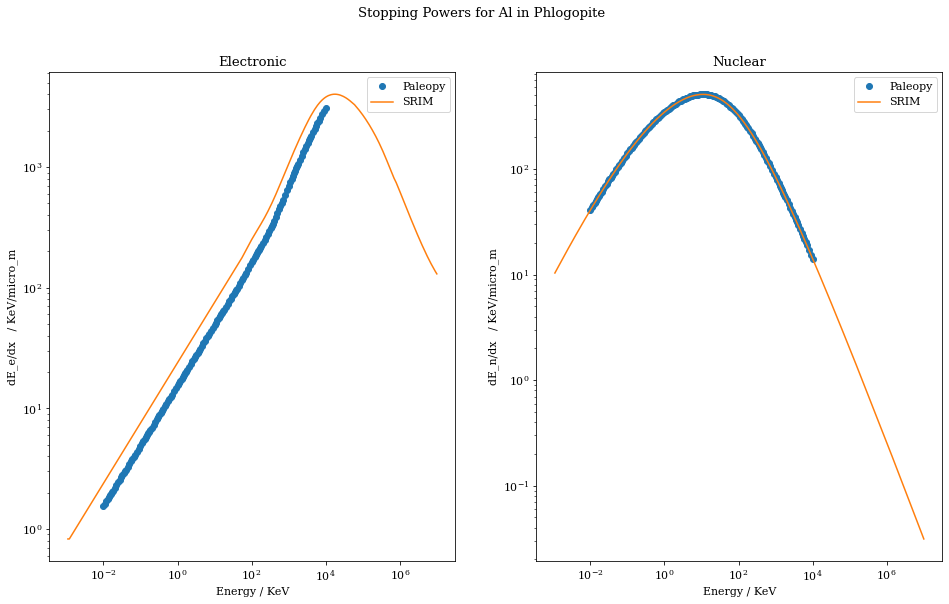

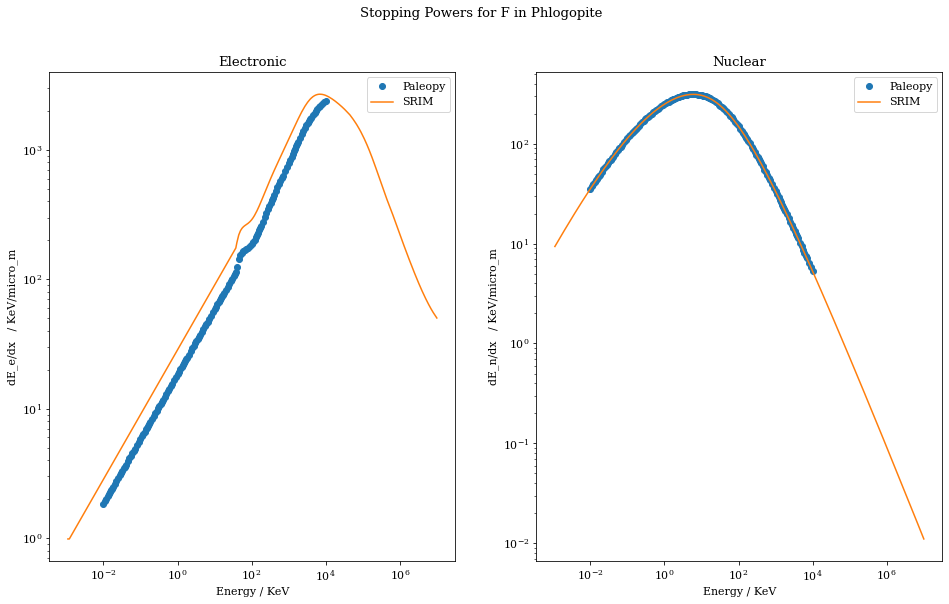

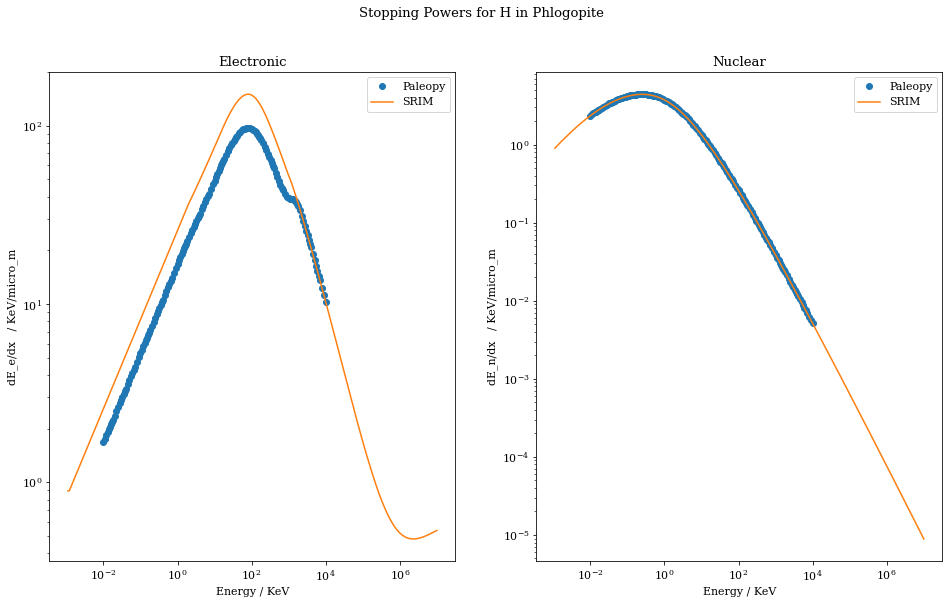

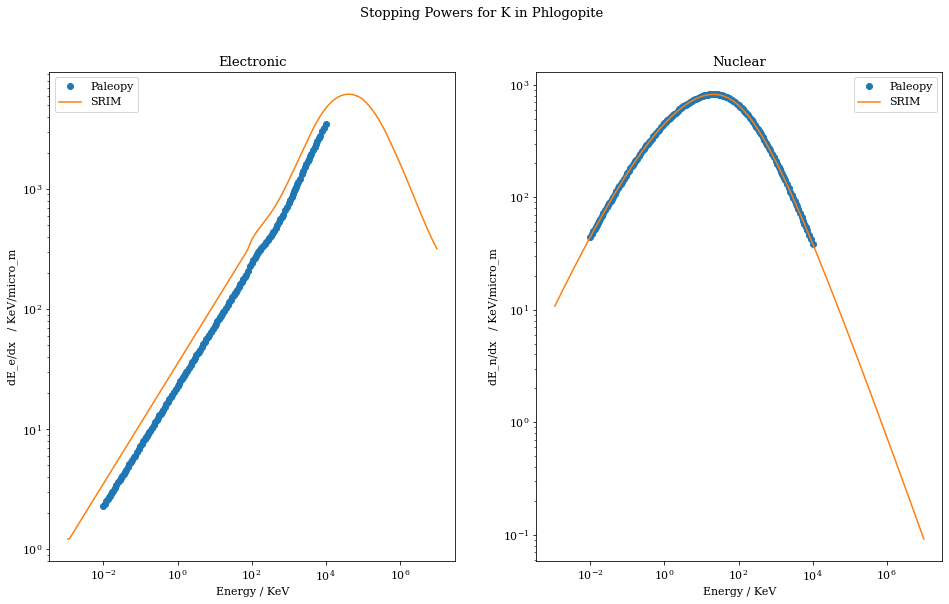

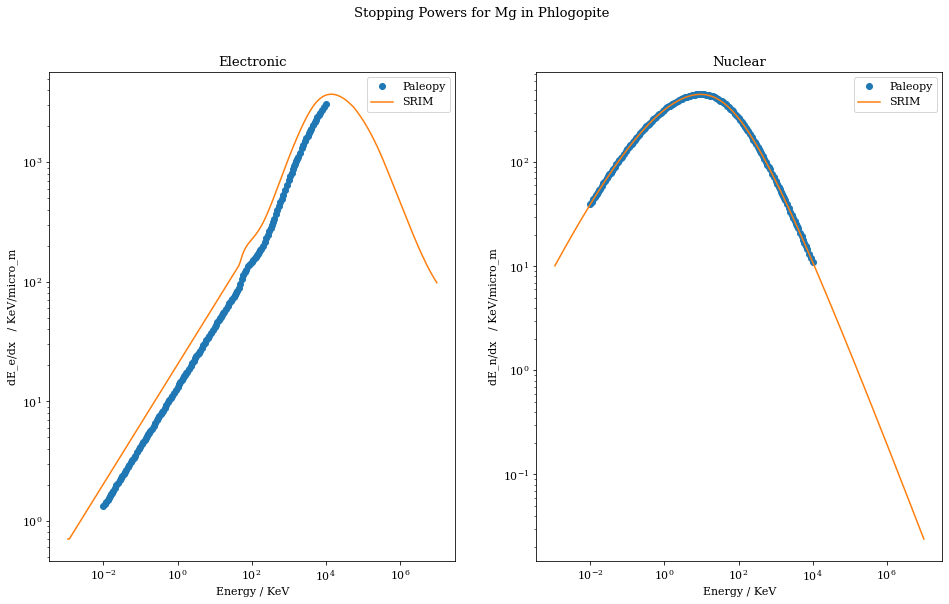

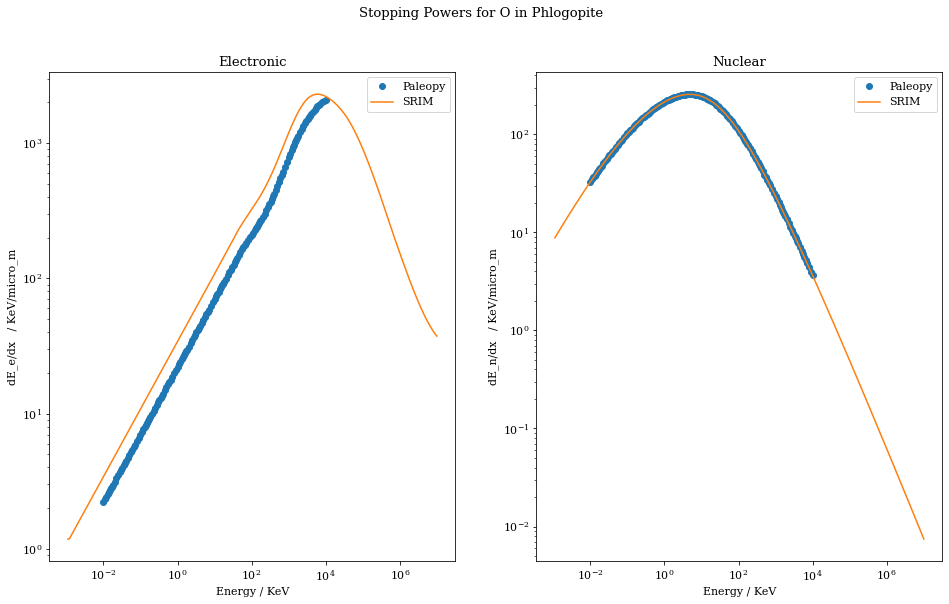

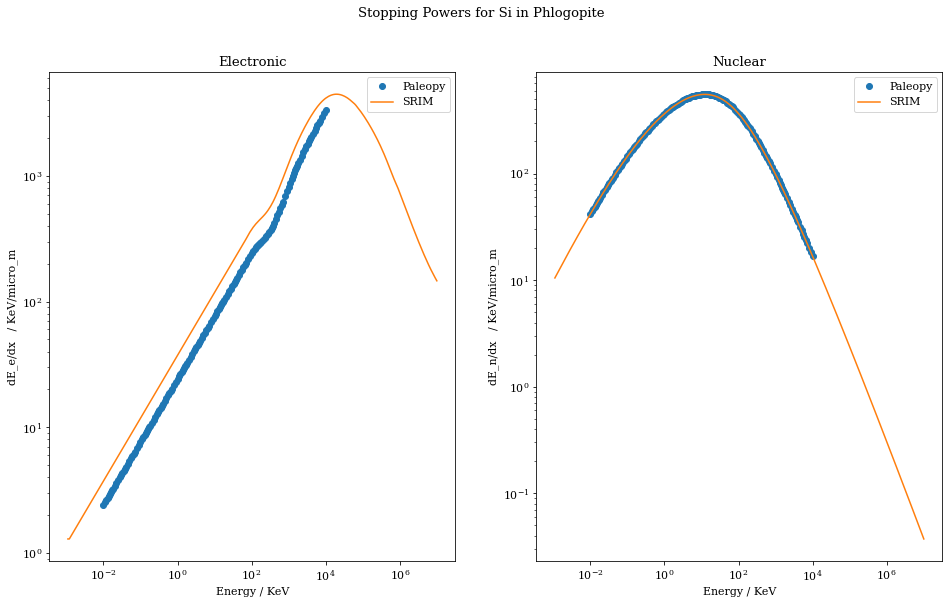

In [ ]:
verbose = 1
if verbose == 1:
  for i in range(len(my_data)):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,9))
    fig.suptitle("Stopping Powers for {0} in Phlogopite".format(data_ref[i]))
    ax1.set_title("Electronic")
    ax1.loglog(pal_data[i][:,0], pal_data[i][:,1], 'o', label="Paleopy")
    ax1.loglog(my_data[i][:,0], my_data[i][:,1], label="SRIM")
    ax1.set_xlabel("Energy / KeV")
    ax1.set_ylabel("dE_e/dx   / KeV/micro_m")
    ax1.legend()


    ax2.set_title("Nuclear")
    ax2.loglog(pal_data[i][:,0], pal_data[i][:,2], 'o', label="Paleopy")
    ax2.loglog(my_data[i][:,0], my_data[i][:,2], label="SRIM")
    ax2.set_xlabel("Energy / KeV")
    ax2.set_ylabel("dE_n/dx   / KeV/micro_m")
    ax2.legend()


  plt.show();

Some kind of correction is also required here.

#### Solution

To solve for disparities between SRIM and paleopy, we need to specify the target material's bonds within the `Compounds.dat` file in the SRIM install directory. This bond specification allows SRIM to calculate and figure out the relevant correction factor.

## dR/dX Spectra

$$ \frac{dR}{dx} = ∑_{T} \xi_{T} \frac{dE_R}{dx_T} \left(\frac{dR}{dE_R}\right)_T $$

Is the equation required to produce the differential recoil rate w.r.t track length spectra. While SRIM provides $\frac{dE_R}{dx_T}$, we need to calculate $(\frac{dR}{dE_R}) $,. The $T$ represents each target nuclei.

So for a material like Halite (NaCl) the summation will look something like

$$ \frac{dR}{dx} = \xi_{Na} \frac{dE_R}{dx_{Na}} \left(\frac{dR}{dE_R}\right)_{Na} + \xi_{Cl} \frac{dE_R}{dx_{Cl}} \left(\frac{dR}{dE_R}\right)_{Cl} $$

For Epsomite (MgSO4·7H2O), which we will consider first to verify our method the summation is as follows

$$ \frac{dR}{dx} = \xi_{Mg} \frac{dE_R}{dx_{Mg}} \left(\frac{dR}{dE_R}\right)_{Mg} + \xi_{S} \frac{dE_R}{dx_{S}} \left(\frac{dR}{dE_R}\right)_{S} + \xi_{O} \frac{dE_R}{dx_{O}} \left(\frac{dR}{dE_R}\right)_{O} + \xi_{H} \frac{dE_R}{dx_{H}} \left(\frac{dR}{dE_R}\right)_{H} $$

Hence, let us calculate $(\frac{dR}{dE_R}) $ for each component nucleus within Epsomite.

### Differential Recoil Rate

In this section, the differential recoil rates for Halite will be calculated. This is the beginnings of the scheme that will underly further target material investigations. 

This will be executed via defining a general function that has the capability of calculating a distribution component associated with a certain nuclei.

$$ \left(\frac{dR}{dE_R}\right)_{T} = \int_{E^{min}_{\nu}} dE_{\nu} \frac{d\sigma}{dE_R} \frac{d\phi}{dE_{\nu}} $$

### Specific Case of dR/dE: Sodium in Halite

Our first action is to load some flux data. Here I've loaded in the galactic CC supernovae data, so that my result may be validated against this reference plot in the paper (Baum et al. https://arxiv.org/pdf/1906.05800.pdf).


<div>
<img src="https://drive.google.com/uc?id=1EBDoGcjIQbaQAVxqjOlT-KSFURmPn6Tv" width = "600"/>
</div>

#### Importing Supernovae Flux

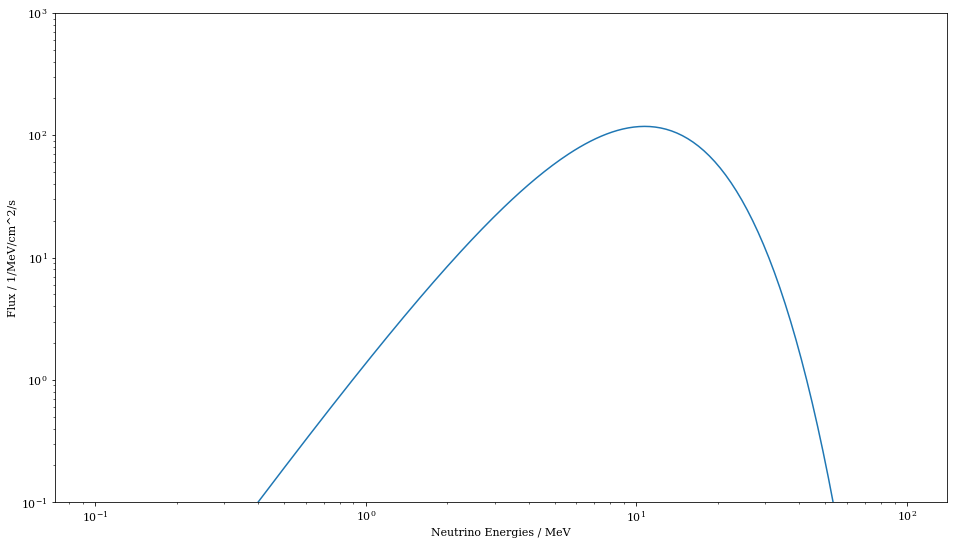

<Figure size 1152x648 with 0 Axes>

In [ ]:
### CC Supernovae Flux
atm = np.loadtxt("drive//MyDrive//fluxdata//Galactic_SN_spec.txt")
SN_x, SN_y = atm[:,0], atm[:,1]

plt.figure(figsize=(16,9))
plt.loglog(SN_x, SN_y)
plt.xlabel("Neutrino Energies / MeV")
plt.ylabel("Flux / 1/MeV/cm^2/s")
plt.ylim(1e-1, 1e3)
plt.show()
plt.savefig("CC.pdf");

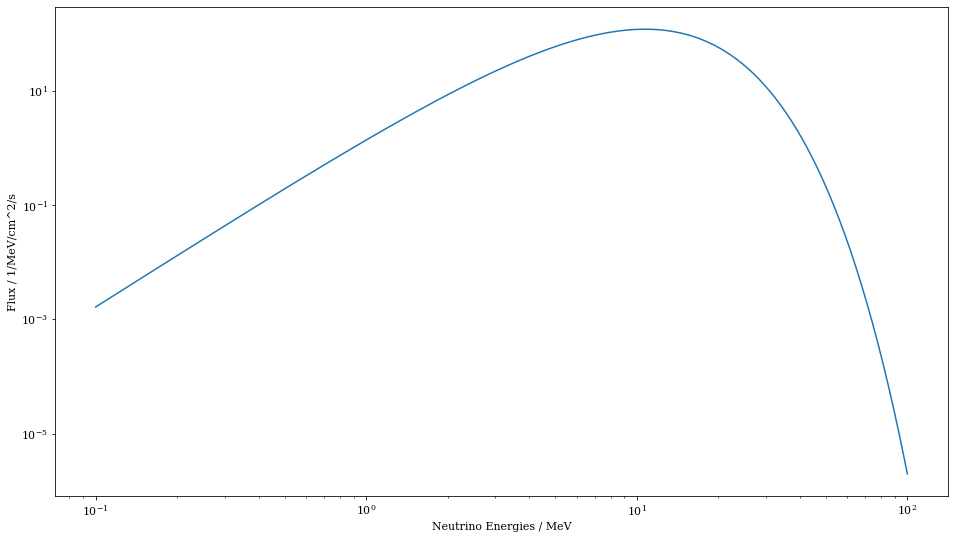

In [ ]:
### CC Supernovae Flux
atm = np.loadtxt("drive//MyDrive//fluxdata//Galactic_SN_spec.txt")
SN_x, SN_y = atm[:,0], atm[:,1]

plt.loglog(SN_x, SN_y)
plt.xlabel("Neutrino Energies / MeV")
plt.ylabel("Flux / 1/MeV/cm^2/s")
plt.show();

As a quick sanity check, we can take a look at the potential resultant maximum recoil energies if this flux interacts with a sodium nucleus. Plus the resultant differential cross sections. Both will be required in our scheme to generate dRdx distributions.

#### Supernovae Flux Example Attributes:

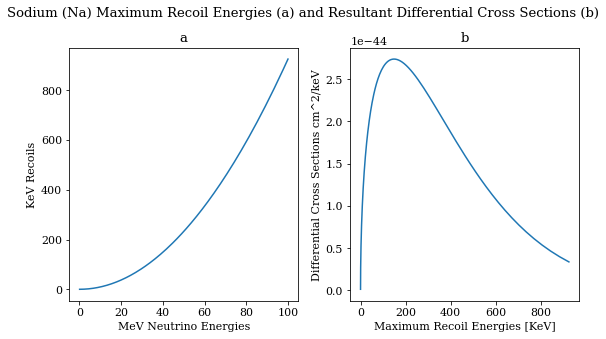

In [ ]:
E_SN = SN_x
Na_A = 22.99
Na_p = 11
ERmax_Na = wim.ERmax(E_SN, Na_A)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4.5))

plt.suptitle('Sodium (Na) Maximum Recoil Energies (a) and Resultant Differential Cross Sections (b)', y=1.04)
ax1.set_title('a')
ax2.set_title('b')


ax1.plot(SN_x, ERmax_Na)
ax1.set_xlabel("MeV Neutrino Energies")
ax1.set_ylabel("KeV Recoils");

diff_cross_na = wim.xsec_CEvNS(ERmax_Na, SN_x, Na_p, Na_A-Na_p)

ax2.plot(ERmax_Na, diff_cross_na)
ax2.set_xlabel("Maximum Recoil Energies [KeV]")
ax2.set_ylabel("Differential Cross Sections cm^2/keV")
plt.tight_layout();

#### Interpolating Flux Method

In the next code cell, a basis of neutrino energies are set out. We plan to interpolate the flux data, fitting a function which will then be applied to this basis set of energy values. `np.geomspace` is utilised for its log based array generation; this characteristic is highlighted via the plot below. The broad range will allow dense granularity for the lower energies but still considers the possibility of larger energies if they're inputted.

1e-06 100000.0 MeV


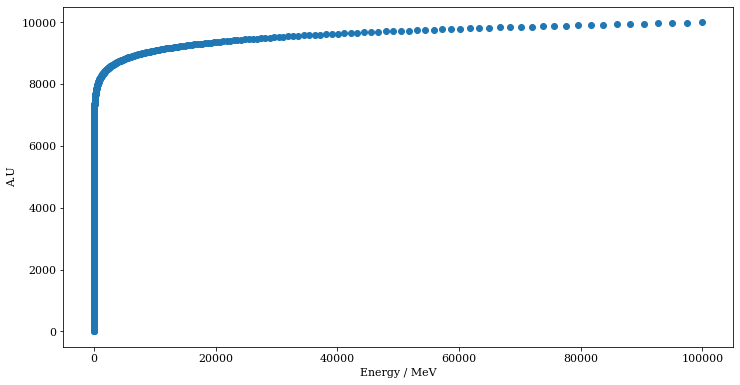

In [ ]:
points = 1000

x_ref = np.geomspace(1e-6, 1e5, points)
print(x_ref[0],x_ref[-1],"MeV")

y_ref = np.linspace(0,10000, points)

plt.figure(figsize=(12,6.25))
plt.plot(x_ref, y_ref, 'o')
plt.xlabel("Energy / MeV")
plt.ylabel("A.U");

Below, the scheme for generating a flux function has been set out. This works by figuring out how many elements of the energy basis are included within the initial data set. Interpolating the dataset and applying the fitted function to the those elements included in the range of the initial data set.

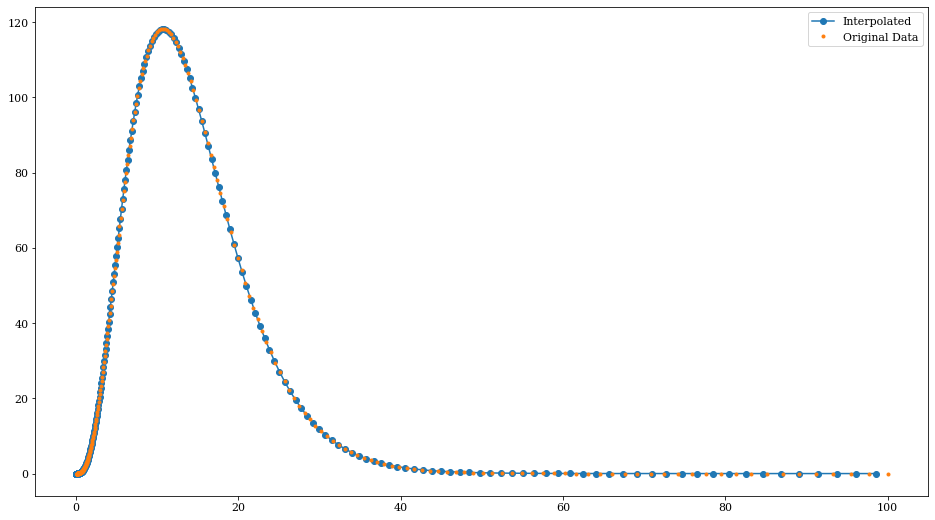

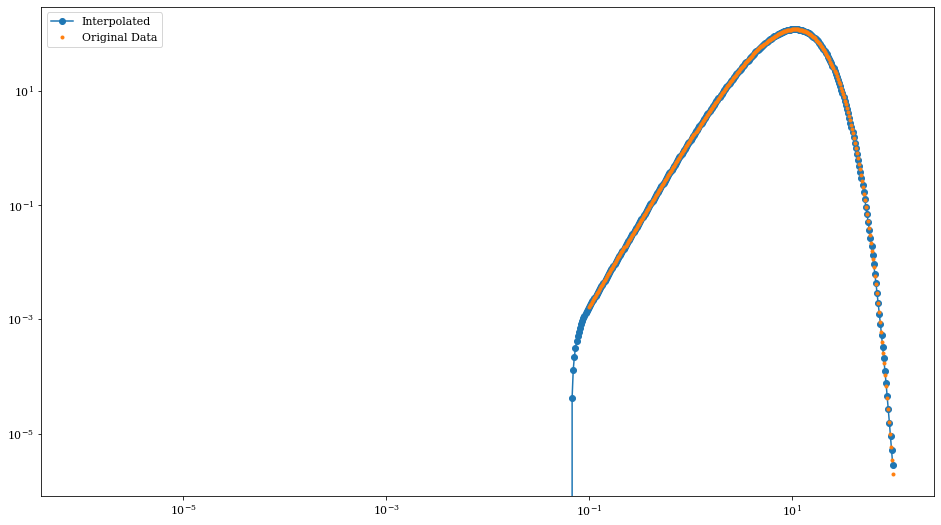

In [ ]:
x_ref = np.geomspace(1e-6, 1e5, points)

x_exp = SN_x # X to be interpolated
y_exp = SN_y # Y to be interpolated

E_last = SN_x[-1] # Last Energy Value included in dataset

for i in range(len(x_ref)):
  if x_ref[i] > E_last:
    pos = i
    break

x_ref_i = x_ref[:pos] # Here we limit the fit to the energies involved in the original dataset. 

flux_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
ref = flux_func(x_ref_i).clip(min=0)
plt.plot(x_ref_i, ref, '-o', label='Interpolated')
plt.plot(SN_x, SN_y, '.', label="Original Data") # Plotting original 
plt.legend();

plt.figure()
plt.loglog(x_ref_i, ref, '-o', label='Interpolated')
plt.loglog(SN_x, SN_y, '.', label="Original Data") # Plotting original 
plt.legend();

#### Calculating dR/dE (for Na - Halite)

Now that a flux function has been defined, we set the neutrino energies to the basis we defined as `x_ref`. The length of this is also the number of iterations that occurs in order to generate the distribution of differential recoil rates, as a calculation occurs for each energy value. We also define the mass of the nucleus for normalising the rates per unit mass.

We then calculate the associated maximum recoil energies of each neutrino energy. These are then iterated through, in order to calculate the differential cross sections. The cross sections are then multiplied against the relevant neutrino energy flux values. This product is therefore integrated from the minimum neutrino energy that is capable of producing the designated recoil energy to the final neutrino energy within the dataset. This integration provides us with the differential recoil rate dRdE.

In [ ]:
E_nu = x_ref_i
Na_A = 22.99
Na_p = 11
m_N = Na_A*1.66054e-27
iterations = len(E_nu)

ERmax_Na = wim.ERmax(E_nu, Na_A)

#integrand = wim.xsec_CEvNS(ERmax_Na, E_nu, Na_p, Na_A-Na_p) * flux_func(E_nu)

rates = np.zeros(iterations)

for i in range(iterations):
  integrand = wim.xsec_CEvNS(ERmax_Na[i], E_nu[i:], Na_p, Na_A-Na_p) * flux_func(E_nu[i:])
  rates[i] = scipy.integrate.simps(integrand, E_nu[i:])


rates = rates / m_N # Standard Rate event per second
rates_daily = rates*86400 # Same as above but per day
rates_standard = (rates_daily * 1e6 * 365) # Same as above but per Megayear (as in paper)

Now that dR/dE has been calculated, we can plot the results. We can also fit the results via interpolation and apply them to the same basis of recoil energies involved in the SRIM datasets for stopping powers.

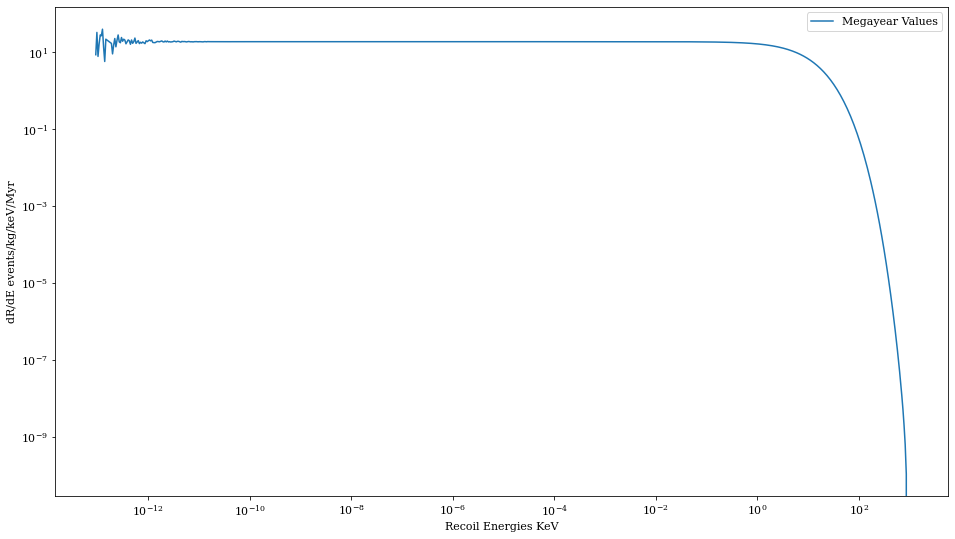

In [ ]:
verbose = 0
if verbose == 1:
  plt.figure(figsize=(16,9))
  plt.xlabel("Recoil Energies KeV")
  plt.ylabel("dR/dE events/kg/keV/s")
  plt.loglog(ERmax_Na, rates, label= "Seconds Values")
  plt.legend()

  plt.figure(figsize=(16,9))
  plt.xlabel("Recoil Energies KeV")
  plt.ylabel("dR/dE events/kg/keV/day")
  plt.loglog(ERmax_Na, rates_daily, label="Daily Values")
  plt.legend()

plt.figure(figsize=(16,9))
plt.xlabel("Recoil Energies KeV")
plt.ylabel("dR/dE events/kg/keV/Myr")
plt.loglog(ERmax_Na, rates_standard, label= "Megayear Values")
plt.legend();
#print(rates)

#### Standard Energy Basis Arrays (`SRIM_array` and `SRIM_array_10GeV`)

Now the data has been plotted it is time to fit it so that it may be multiplied with the stopping powers generated via SRIM. To do this, the recoil energies between the two datasets must be the same. Hence the energies are defined in the next code cell.

In [ ]:
SRIM_array = np.array([1.10000e-03,1.20000e-03,1.30000e-03,1.40000e-03,1.50000e-03,1.60000e-03,1.70000e-03,1.80000e-03,2.00000e-03,2.25000e-03,2.49999e-03,2.74999e-03,2.99999e-03,
                       3.24999e-03,3.49999e-03,3.74999e-03,3.99999e-03,4.49999e-03,4.99999e-03,5.49999e-03,5.99999e-03,6.49999e-03,6.99999e-03,7.99999e-03,8.99999e-03,9.99999e-03,
                       1.09999e-02,1.19999e-02,1.29999e-02,1.39999e-02,1.49999e-02,1.59999e-02,1.69999e-02,1.79999e-02,1.99999e-02,2.24999e-02,2.49999e-02,2.74999e-02,2.99999e-02,
                       3.24999e-02,3.49999e-02,3.74999e-02,3.99999e-02,4.49999e-02,4.99999e-02,5.49999e-02,5.99999e-02,6.49999e-02,6.99999e-02,7.99999e-02,8.99999e-02,9.99999e-02,
                       1.10000e-01,1.20000e-01,1.30000e-01,1.39999e-01,1.49999e-01,1.59999e-01,1.69999e-01,1.79999e-01,1.99999e-01,2.24999e-01,2.49999e-01,2.74999e-01,2.99999e-01,
                       3.24999e-01,3.49999e-01,3.74999e-01,3.99999e-01,4.49999e-01,4.99999e-01,5.49999e-01,5.99999e-01,6.49999e-01,6.99999e-01,7.99999e-01,8.99999e-01,9.99999e-01,
                       1.10000e+00,1.20000e+00,1.30000e+00,1.40000e+00,1.50000e+00,1.60000e+00,1.70000e+00,1.80000e+00,2.00000e+00,2.25000e+00,2.50000e+00,2.75000e+00,3.00000e+00,
                       3.25000e+00,3.50000e+00,3.75000e+00,4.00000e+00,4.50000e+00,5.00000e+00,5.50000e+00,6.00000e+00,6.50000e+00,7.00000e+00,8.00000e+00,9.00000e+00,1.00000e+01,
                       1.10000e+01,1.20000e+01,1.30000e+01,1.40000e+01,1.50000e+01,1.60000e+01,1.70000e+01,1.80000e+01,2.00000e+01,2.25000e+01,2.50000e+01,2.75000e+01,3.00000e+01,
                       3.25000e+01,3.50000e+01,3.75000e+01,4.00000e+01,4.50000e+01,5.00000e+01,5.50000e+01,6.00000e+01,6.50000e+01,7.00000e+01,8.00000e+01,9.00000e+01,1.00000e+02,
                       1.10000e+02,1.20000e+02,1.30000e+02,1.40000e+02,1.50000e+02,1.60000e+02,1.70000e+02,1.80000e+02,2.00000e+02,2.25000e+02,2.50000e+02,2.75000e+02,3.00000e+02,
                       3.25000e+02,3.50000e+02,3.75000e+02,4.00000e+02,4.50000e+02,5.00000e+02,5.50000e+02,6.00000e+02,6.50000e+02,7.00000e+02,8.00000e+02,9.00000e+02,1.00000e+03,
                       1.10000e+03,1.20000e+03,1.30000e+03,1.40000e+03,1.50000e+03,1.60000e+03,1.70000e+03,1.80000e+03,2.00000e+03,2.25000e+03,2.50000e+03,2.75000e+03,3.00000e+03,
                       3.25000e+03,3.50000e+03,3.75000e+03,4.00000e+03,4.50000e+03,5.00000e+03,5.50000e+03,6.00000e+03,6.50000e+03,7.00000e+03,8.00000e+03,9.00000e+03,1.00000e+04])

SRIM_array_10GeV = np.array([1.10000e-03,1.20000e-03,1.30000e-03,1.40000e-03,1.50000e-03,1.60000e-03,1.70000e-03,1.80000e-03,2.00000e-03,2.25000e-03,2.49999e-03,2.74999e-03,2.99999e-03,
                             3.24999e-03,3.49999e-03,3.74999e-03,3.99999e-03,4.49999e-03,4.99999e-03,5.49999e-03,5.99999e-03,6.49999e-03,6.99999e-03,7.99999e-03,8.99999e-03,9.99999e-03,
                             1.09999e-02,1.19999e-02,1.29999e-02,1.39999e-02,1.49999e-02,1.59999e-02,1.69999e-02,1.79999e-02,1.99999e-02,2.24999e-02,2.49999e-02,2.74999e-02,2.99999e-02,
                             3.24999e-02,3.49999e-02,3.74999e-02,3.99999e-02,4.49999e-02,4.99999e-02,5.49999e-02,5.99999e-02,6.49999e-02,6.99999e-02,7.99999e-02,8.99999e-02,9.99999e-02,
                             1.10000e-01,1.20000e-01,1.30000e-01,1.39999e-01,1.49999e-01,1.59999e-01,1.69999e-01,1.79999e-01,1.99999e-01,2.24999e-01,2.49999e-01,2.74999e-01,2.99999e-01,
                             3.24999e-01,3.49999e-01,3.74999e-01,3.99999e-01,4.49999e-01,4.99999e-01,5.49999e-01,5.99999e-01,6.49999e-01,6.99999e-01,7.99999e-01,8.99999e-01,9.99999e-01,
                             1.10000e+00,1.20000e+00,1.30000e+00,1.40000e+00,1.50000e+00,1.60000e+00,1.70000e+00,1.80000e+00,2.00000e+00,2.25000e+00,2.50000e+00,2.75000e+00,3.00000e+00,
                             3.25000e+00,3.50000e+00,3.75000e+00,4.00000e+00,4.50000e+00,5.00000e+00,5.50000e+00,6.00000e+00,6.50000e+00,7.00000e+00,8.00000e+00,9.00000e+00,1.00000e+01,
                             1.10000e+01,1.20000e+01,1.30000e+01,1.40000e+01,1.50000e+01,1.60000e+01,1.70000e+01,1.80000e+01,2.00000e+01,2.25000e+01,2.50000e+01,2.75000e+01,3.00000e+01,
                             3.25000e+01,3.50000e+01,3.75000e+01,4.00000e+01,4.50000e+01,5.00000e+01,5.50000e+01,6.00000e+01,6.50000e+01,7.00000e+01,8.00000e+01,9.00000e+01,1.00000e+02,
                             1.10000e+02,1.20000e+02,1.30000e+02,1.40000e+02,1.50000e+02,1.60000e+02,1.70000e+02,1.80000e+02,2.00000e+02,2.25000e+02,2.50000e+02,2.75000e+02,3.00000e+02,
                             3.25000e+02,3.50000e+02,3.75000e+02,4.00000e+02,4.50000e+02,5.00000e+02,5.50000e+02,6.00000e+02,6.50000e+02,7.00000e+02,8.00000e+02,9.00000e+02,1.00000e+03,
                             1.10000e+03,1.20000e+03,1.30000e+03,1.40000e+03,1.50000e+03,1.60000e+03,1.70000e+03,1.80000e+03,2.00000e+03,2.25000e+03,2.50000e+03,2.75000e+03,3.00000e+03,
                             3.25000e+03,3.50000e+03,3.75000e+03,4.00000e+03,4.50000e+03,5.00000e+03,5.50000e+03,6.00000e+03,6.50000e+03,7.00000e+03,8.00000e+03,9.00000e+03,1.00000e+04,
                             1.10000e+04,1.20000e+04,1.30000e+04,1.40000e+04,1.50000e+04,1.60000e+04,1.70000e+04,1.80000e+04,2.00000e+04,2.25000e+04,2.50000e+04,2.75000e+04,3.00000e+04,
                             3.25000e+04,3.50000e+04,3.75000e+04,4.00000e+04,4.50000e+04,5.00000e+04,5.50000e+04,6.00000e+04,6.50000e+04,7.00000e+04,8.00000e+04,9.00000e+04,1.00000e+05,
                             1.10000e+05,1.20000e+05,1.30000e+05,1.40000e+05,1.50000e+05,1.60000e+05,1.70000e+05,1.80000e+05,2.00000e+05,2.25000e+05,2.50000e+05,2.75000e+05,3.00000e+05,
                             3.25000e+05,3.50000e+05,3.75000e+05,4.00000e+05,4.50000e+05,5.00000e+05,5.50000e+05,6.00000e+05,6.50000e+05,7.00000e+05,8.00000e+05,9.00000e+05,1.00000e+06,
                             1.10000e+06,1.20000e+06,1.30000e+06,1.40000e+06,1.50000e+06,1.60000e+06,1.70000e+06,1.80000e+06,2.00000e+06,2.25000e+06,2.50000e+06,2.75000e+06,3.00000e+06,
                             3.25000e+06,3.50000e+06,3.75000e+06,4.00000e+06,4.50000e+06,5.00000e+06,5.50000e+06,6.00000e+06,6.50000e+06,7.00000e+06,8.00000e+06,9.00000e+06,1.00000e+07])

#### Fitting dR/dE via Interpolation

With the recoil energies defined, dRdE may now be fitted and applied to this basis set of energies.

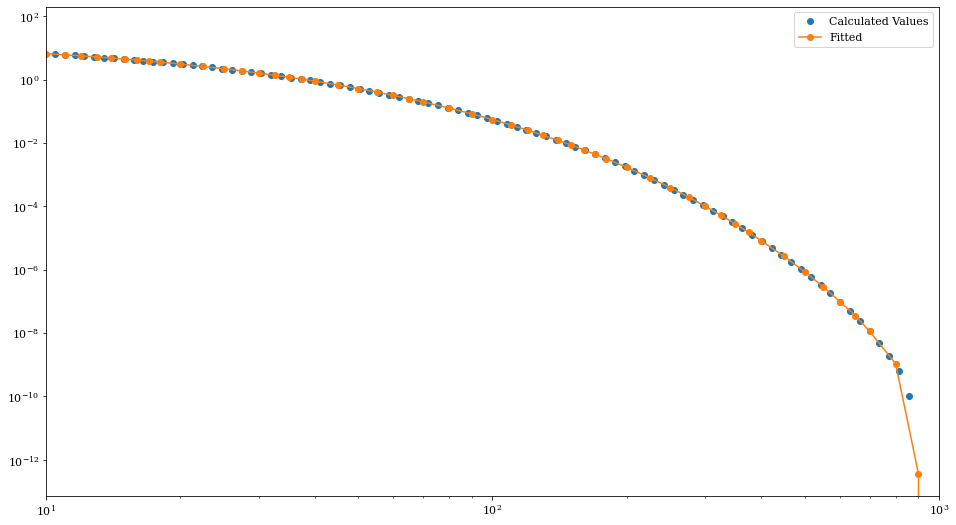

In [ ]:
# Fitting

x_ref = SRIM_array_10GeV

x_exp = ERmax_Na # X to be interpolated
y_exp = rates_standard # Y to be interpolated
plt.figure(figsize=(16,9))
plt.loglog(x_exp, y_exp, 'o', label='Calculated Values')

flux_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
ref = flux_func(x_ref).clip(min=0)

plt.loglog(x_ref, ref,'-o', label="Fitted")
plt.xlim(10,1000)
plt.legend();

#### Computing dR/dx

Now the total stopping power is calculated for the ion w.r.t the recoil energy. This is then multiplied with dRdE in order to compute dRdx.

In [ ]:
Na_stopping = na_NH[:,1] + na_NH[:,2] # Stopping power in kev per micron

dRdx = (ref) * Na_stopping # Rate per micron -> divide by 1000 for rate per nanometre

#print(len(na_NH[:,3]))

(0.0001, 1000000.0)

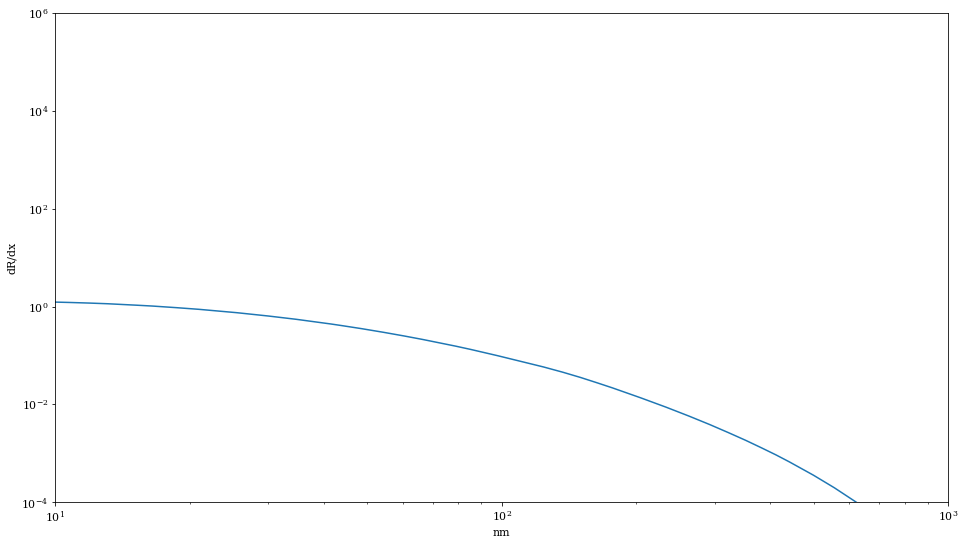

In [ ]:
plt.figure(figsize=(16,9))
plt.loglog(na_NH[:,3]*1000, dRdx*0.3934/1000) #*1000 for micrometers to nano, *0.3934 for mass fraction /1000 for dependence on nm,  not micrometers
plt.xlabel("nm")
plt.ylabel("dR/dx")
plt.xlim(10,1000)
plt.ylim(1e-4, 10e5)

This is a useful result. However we have only interpolated for a shared axis in terms of the recoil energies. This also needs to be done for stopping distances. As stopping distances don't follow the same relationship for each material interaction. But this initial result looks promising as this is only one component of the final $dR/dx$ distribution, given what we are aiming for:

<div>
<img src="https://drive.google.com/uc?id=1EBDoGcjIQbaQAVxqjOlT-KSFURmPn6Tv" width = "500"/>
</div>

### Generalising Track Length Rate Distribution (dRdx_component)

#### `dRdx_component()` Function

Lets try to generalise this by defining a function dRdx_component. This function will provide the component of the dRdx distribution for a single nuclei

In [ ]:
def dRdx_component(E_flux, flux_y, A, N_p, SRIM, verbose=0):
  """
  Inputs:
  E_flux - Energy values of neutrino spectra
  flux_y - Flux values of neutrino spectra
  A - Mass of target nuclei
  N_p - Number of protons in target nuclei
  SRIM - Generated SRIM Dataset


  Outputs:
  dRdx - Calculated dRdx Distributions
  rates_ref - Calculate dRdE distributions 
  dRdx_d -  Calculated dRdx Distribution relevant to shared track length array
  x_ref - Shared Track Length Array

  """


  m_N = A*1.66054e-27 # The target mass

  ########## Fitting Flux Function via interpolation (Flux Function) ##########################

  x_ref = np.geomspace(1e-6, 1e5, 10000) # Reference energy scale 1ev to 10GeV in MeV units

  x_exp = SN_x # X to be interpolated (Energy)
  y_exp = SN_y # Y to be interpolated (Flux)

  flux_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
  ref = flux_func(x_ref).clip(min=0)

  E_last = SN_x[-1] # Final energy considered in spectra

  for i in range(len(ref)):
    if x_ref[i] >= E_last:
      pos = i
      break

  if verbose==1:
    plt.plot(E_flux, flux_y)
    plt.plot(x_ref[:pos], ref[:pos], 'o')
    print("Maximum Neutrino Energy Index Considered", pos)

 
  ###### dRdE ###########################################################################

  E_nu = x_ref[:pos] # Sets up the range of neutrino energies to use

  iterations = len(E_nu) # The number of iterations for the integral to be calculated for each recoil energy

  ERmax = wim.ERmax(E_nu, A) # Recoil energies calculated via neutrino energies

  rates = np.zeros(iterations) # Empty array for the rate values for each recoil energy

  for i in range(iterations): # here we iterate over every recoil energy value and calculate the differential cross section for each neutrino energy that could produce it. This is multiplied by the actual flux of the energy too. 
    integrand = wim.xsec_CEvNS(ERmax[i], E_nu[i:], N_p, A-N_p) * flux_func(E_nu[i:]) # This forms the curve to integrate
    rates[i] = scipy.integrate.simps(integrand, E_nu[i:]) # This integrates the curve over the range of neutrino energies considered. To then be repeated for the next recoil energy


  rates *= (86400 * 365.25 * 1e6/m_N) # Rates for the Myr timescale divided by mass in kilograms for mass dependent rate.

  x_ref = SRIM_array_10GeV

  x_exp = ERmax # X to be interpolated
  y_exp = rates # Y to be interpolated


  ###### Interpolation For Energy (dRdE) ############################################### 
  
  rates_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
  rates_ref = rates_func(x_ref).clip(min=0)

  ###### Calculating dRdx ##############################################################

    
  stopping = SRIM[:,1] + SRIM[:,2] # Stopping Power


  dRdx = rates_ref * stopping # dRdx distribution


  ###### Interpolation for track lengths ###############################################

  lengths = SRIM[:,3] * 1000 # Track lengths in nanometres
  
  for i in range(len(lengths)):
    if lengths[i] > 10:
      pos = i
      break
  
  x_exp = lengths[pos:]
  
  y_exp = dRdx[pos:] # dRdx for per micron


  tracks_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=2)

  points = 1000
  x_ref = np.geomspace(1e1, 5e3, points) # Track Lengths in micrometres
  dRdx_d = tracks_func(x_ref).clip(min=0)

  ###### Details #######################################################################
  if verbose ==1:

    plt.figure(figsize=(16,9))
    plt.loglog(x_exp, y_exp, 'o', label='Calculated Values')

    print("Length of Stopping Distances Arrays", len(Na_stopping))

    plt.loglog(x_ref, rates_ref,'-o', label="Fitted")
    plt.xlim(10,1000)
    plt.legend();

    plt.figure()
    plt.loglog(SRIM[:,3]*1000, dRdx/1000)
    plt.xlabel("nm")
    plt.xlim(10,1000)
    plt.ylim(1e-4,1e6)

    #dRdx = Na_stopping * rates

    plt.figure()
    plt.loglog(ERmax, rates)
    # plt.figure()
    # plt.loglog(na_NH[:,3], dRdx)
    
  return dRdx, rates_ref, dRdx_d, x_ref 


#### Halite Components

In the code cell below, the required values for both Chlorine and Sodium have been defined. While calling the SRIM data `na_NH` and `cl_NH` along with the flux data `SN_x` and `SN_y`.

In [ ]:
Na_A = 22.99
Na_p = 11

dRdx, rates_ref, dRdx_d_Na, x_ref = dRdx_component(SN_x, SN_y, Na_A, Na_p, na_NH, 0)

Cl_A = 35.45
Cl_p = 17

dRdx_Cl, rates_ref_Cl, dRdx_d_Cl, x_ref = dRdx_component(SN_x, SN_y, Cl_A, Cl_p, cl_NH, 0)

# verbose = 1
if verbose == 1:
  plt.loglog(SRIM_array_10GeV, rates_ref);

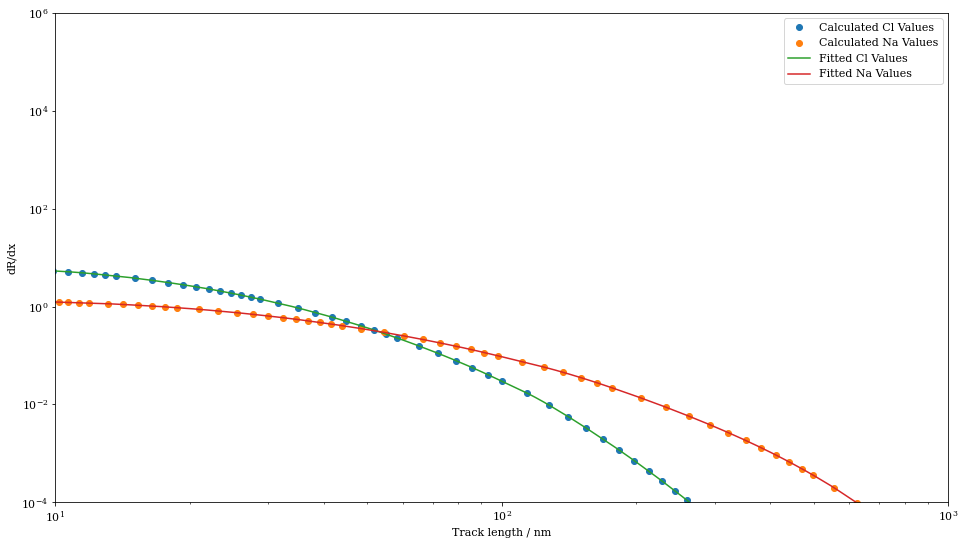

In [ ]:
plt.figure(figsize=(16,9))
plt.loglog(cl_NH[:,3]*1000, (dRdx_Cl*0.6066)/1000, 'o', label='Calculated Cl Values')
plt.loglog(na_NH[:,3]*1000, dRdx*0.3934/1000, 'o', label='Calculated Na Values')
plt.loglog(x_ref, dRdx_d_Cl*0.6066/1000, label='Fitted Cl Values')
plt.loglog(x_ref, dRdx_d_Na*0.3934/1000, label='Fitted Na Values')

plt.xlabel("Track length / nm")
plt.ylabel("dR/dx")


plt.xlim(10,1000)
plt.ylim(1e-4,1e6)
plt.legend()
plt.savefig("Test.pdf");

This shows for this range of interest, the interpolation method is sufficient. Hence the total dRdx spectrum is shown below.

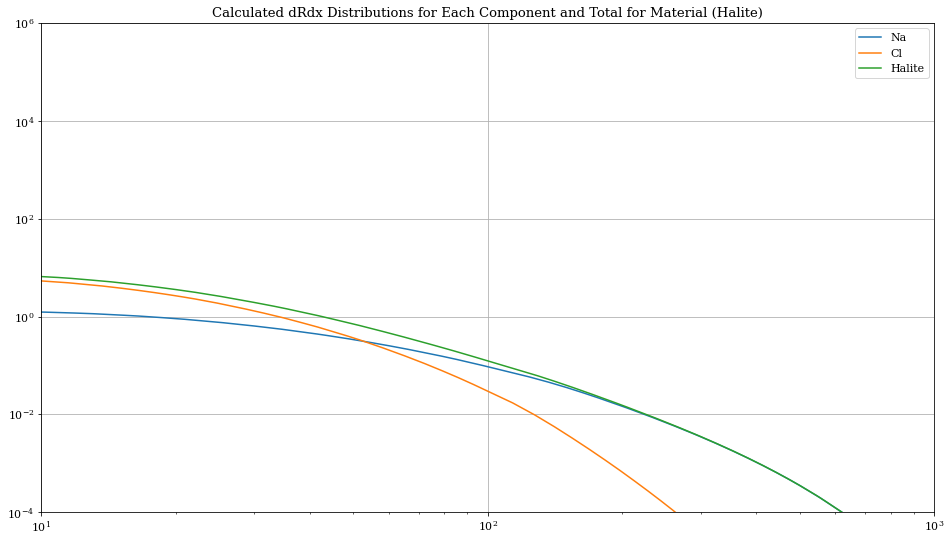

In [ ]:
# plt.figure(figsize=(16,9))
# plt.loglog(na_NH[:,3]*1000, (dRdx_Cl*0.6066)/1000)
# plt.xlim(10,1000)
# plt.ylim(1e-4,1e6)


plt.figure(figsize=(16,9))
#plt.loglog(x_ref, dRdx_d_Na/1000, 'o')
plt.loglog(na_NH[:,3]*1000, 0.3934*dRdx/1000, label='Na')
plt.loglog(cl_NH[:,3]*1000, 0.6066*dRdx_Cl/1000,label='Cl')
plt.title('Calculated dRdx Distributions for Each Component and Total for Material (Halite)')


# plt.figure(figsize=(16,9))
# plt.title("dRdx Plot for CC Supernovae Neutrino Flux incident on Halite (NH SRIM Data)")
# plt.loglog(x_ref, ((dRdx_d_Na*0.3934)+(dRdx_d_Cl*0.6066)))

plt.loglog(x_ref, ((dRdx_d_Na*0.3934)+(dRdx_d_Cl*0.6066))/1000, label='Halite')
# plt.axvline(41.3)
plt.xlim(10,1000)
plt.ylim(1e-4,1e6)
# plt.xlabel("nm")
# plt.ylabel("dR/dx [1/ nm kg Myr]")
plt.grid()
plt.legend();


This doesn't match with what is expected. Let us repeat this with the data set from Paleopy to make sure the issue isn't with the data.

#### Aside: Checking Via Paleopy

The process above is repeated to see if using the original paleopy data provides us with a plot that aligns with what we were expecting.

In [ ]:
paleopy_ref = np.array([1.29999e-02, 1.39999e-02, 1.49999e-02, 1.59999e-02, 1.69999e-02, 1.79999e-02,
 1.99999e-02, 2.24999e-02, 2.49999e-02, 2.74999e-02, 2.99999e-02, 3.24999e-02,
 3.49999e-02, 3.74999e-02, 3.99999e-02, 4.49999e-02, 4.99999e-02, 5.49999e-02,
 5.99999e-02, 6.49999e-02, 6.99999e-02, 7.99999e-02, 8.99999e-02, 9.99999e-02,
 1.10000e-01, 1.20000e-01, 1.30000e-01, 1.39999e-01, 1.49999e-01, 1.59999e-01,
 1.69999e-01, 1.79999e-01, 1.99999e-01, 2.24999e-01, 2.49999e-01, 2.74999e-01,
 2.99999e-01, 3.24999e-01, 3.49999e-01, 3.74999e-01, 3.99999e-01, 4.49999e-01,
 4.99999e-01, 5.49999e-01, 5.99999e-01, 6.49999e-01, 6.99999e-01, 7.99999e-01,
 8.99999e-01, 9.99999e-01, 1.10000e+00, 1.20000e+00, 1.30000e+00, 1.40000e+00,
 1.50000e+00, 1.60000e+00, 1.70000e+00, 1.80000e+00, 2.00000e+00, 2.25000e+00,
 2.50000e+00, 2.75000e+00, 3.00000e+00, 3.25000e+00, 3.50000e+00, 3.75000e+00,
 4.00000e+00, 4.50000e+00, 5.00000e+00, 5.50000e+00, 6.00000e+00, 6.50000e+00,
 7.00000e+00, 8.00000e+00, 9.00000e+00, 1.00000e+01, 1.10000e+01, 1.20000e+01,
 1.30000e+01, 1.40000e+01, 1.50000e+01, 1.60000e+01, 1.70000e+01, 1.80000e+01,
 2.00000e+01, 2.25000e+01, 2.50000e+01, 2.75000e+01, 3.00000e+01, 3.25000e+01,
 3.50000e+01, 3.75000e+01, 4.00000e+01, 4.50000e+01, 5.00000e+01, 5.50000e+01,
 6.00000e+01, 6.50000e+01, 7.00000e+01, 8.00000e+01, 9.00000e+01, 1.00000e+02,
 1.10000e+02, 1.20000e+02, 1.30000e+02, 1.40000e+02, 1.50000e+02, 1.60000e+02,
 1.70000e+02, 1.80000e+02, 2.00000e+02, 2.25000e+02, 2.50000e+02, 2.75000e+02,
 3.00000e+02, 3.25000e+02, 3.50000e+02, 3.75000e+02, 4.00000e+02, 4.50000e+02,
 5.00000e+02, 5.50000e+02, 6.00000e+02, 6.50000e+02, 7.00000e+02, 8.00000e+02,
 9.00000e+02, 1.00000e+03, 1.10000e+03, 1.20000e+03, 1.30000e+03, 1.40000e+03,
 1.50000e+03, 1.60000e+03, 1.70000e+03, 1.80000e+03, 2.00000e+03, 2.25000e+03,
 2.50000e+03, 2.75000e+03, 3.00000e+03, 3.25000e+03, 3.50000e+03, 3.75000e+03,
 4.00000e+03, 4.50000e+03, 5.00000e+03, 5.50000e+03, 6.00000e+03, 6.50000e+03,
 7.00000e+03, 8.00000e+03, 9.00000e+03, 1.00000e+04])

Here I have defined a new function, the same in a calculative manner but differing in the energy basis array used in order to align with the paleopy data.

In [ ]:
def dRdx_component_10Kev(E_flux, flux_y, A, N_p, SRIM, verbose=0):
  """
  Inputs:
  E_flux - Energy values of neutrino spectra
  flux_y - Flux values of neutrino spectra
  A - Mass of target nuclei
  N_p - Number of protons in target nuclei
  SRIM - Generated SRIM Dataset


  Outputs:
  dRdx - Calculated dRdx Distributions
  rates_ref - Calculate dRdE distributions 
  dRdx_d -  Calculated dRdx Distribution relevant to shared track length array
  x_ref - Shared Track Length Array

  """

  m_N = A*1.66054e-27

  ############### Fitting Flux Function via interpolation (Flux Function) ################################

  x_ref = np.geomspace(1e-6, 1e5, 10000) # Reference energy scale 1ev to 10GeV

  x_exp = SN_x # X to be interpolated
  y_exp = SN_y # Y to be interpolated

  flux_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
  ref = flux_func(x_ref).clip(min=0)

  E_last = SN_x[-1] # Final energy considered in spectra

  for i in range(len(ref)):
    if x_ref[i] >= E_last:
      pos = i
      break

  if verbose==1:
    plt.plot(E_flux, flux_y)
    plt.plot(x_ref[:pos], ref[:pos], 'o')
    print("Maximum Neutrino Energy Index Considered", pos)

  ######################### dRdE #######################################################

  E_nu = x_ref[:pos] # Sets up the range of neutrino energies to use

  iterations = len(E_nu) # The number of iterations for the integral to be calculated for each recoil energy

  ERmax = wim.ERmax(E_nu, A) # Recoil energies calculated via neutrino energies

  rates = np.zeros(iterations) # Empty array for the rate values for each recoil energy

  for i in range(iterations): # here we iterate over every recoil energy value and calculate the differential cross section for each neutrino energy that could produce it. This is multiplied by the actual flux of the energy too. 
    integrand = wim.xsec_CEvNS(ERmax[i], E_nu[i:], N_p, A-N_p) * flux_func(E_nu[i:]) # This forms the curve to integrate
    rates[i] = scipy.integrate.simps(integrand, E_nu[i:]) # This integrates the curve over the range of neutrino energies considered. To then be repeated for the next recoil energy

  rates *= (86400 * 365.25 * 1e6/m_N) # Rates for the Myr timescale divided by mass in kilograms for mass dependent rate.

  x_ref = paleopy_ref

  x_exp = ERmax # X to be interpolated
  y_exp = rates # Y to be interpolated


  # Interpolation For Energy ################################################## 
  
  rates_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
  rates_ref = rates_func(x_ref).clip(min=0)

  ##################################################################

    
  stopping = SRIM[:,1] + SRIM[:,2]


  dRdx = rates_ref * stopping


  # Interpolation for track lengths ########################################## 


  lengths = SRIM[:,3] * 1000 # Track lengths in nanometres
  
  for i in range(len(lengths)):
    if lengths[i] > 10:
      pos = i
      break
  
  x_exp = lengths[pos:]
  
  y_exp = dRdx[pos:] # dRdx for per micron


  rates_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=2)

  points = 1000
  x_ref = np.geomspace(1e1, 5e3, points) # Track Lengths in micrometres
  dRdx_d = rates_func(x_ref).clip(min=0)


    ## Fitting Rates
  if verbose ==1:

    plt.figure(figsize=(16,9))
    plt.loglog(x_exp, y_exp, 'o', label='Calculated Values')

    print("Length of Stopping Distances Arrays", len(Na_stopping))

    plt.loglog(x_ref, rates_ref,'-o', label="Fitted")
    plt.xlim(10,1000)
    plt.legend();

    plt.figure()
    plt.loglog(SRIM[:,3]*1000, dRdx/1000)
    plt.xlabel("nm")
    plt.xlim(10,1000)
    plt.ylim(1e-4,1e6)

    #dRdx = Na_stopping * rates

    plt.figure()
    plt.loglog(ERmax, rates)
    # plt.figure()
    # plt.loglog(na_NH[:,3], dRdx)
    
  return dRdx, rates_ref, dRdx_d, x_ref 


In [ ]:
Na_A = 22.99
Na_p = 11


dRdx, rates_ref, dRdx_d, Na_ref = dRdx_component_10Kev(SN_x, SN_y, Na_A, Na_p, na_paleopy, 0)

Cl_A = 35.45
Cl_p = 17

dRdx_Cl, rates_ref_Cl, dRdx_Cl_d, Cl_ref = dRdx_component_10Kev(SN_x, SN_y, Cl_A, Cl_p, cl_paleopy, 0)

# plt.figure(figsize=(16,9))
# plt.title("dRdx Plot for CC Supernovae Neutrino Flux incident on Halite (Paleopy Data)")
# plt.loglog(na_NH[:,3]*1000, ((dRdx*0.3934)+(dRdx_Cl*0.6066))/1000)
# plt.axvline(41.3)
# plt.xlim(10,1000)
# plt.ylim(1e-4,1e6)
# plt.xlabel("nm")
# plt.ylabel("dR/dx [1/ nm kg Myr]")
# plt.grid();

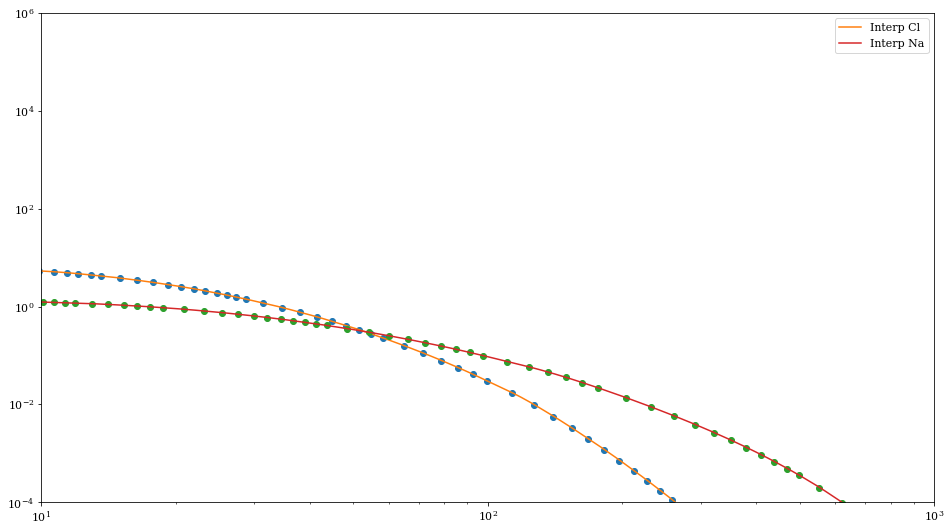

In [ ]:
plt.figure(figsize=(16,9))
plt.loglog(cl_paleopy[:,3]*1000, (dRdx_Cl*0.6066)/1000, 'o')
plt.loglog(x_ref, dRdx_d_Cl*0.6066/1000, label='Interp Cl')

plt.loglog(na_paleopy[:,3]*1000, dRdx*0.3934/1000, 'o')
plt.loglog(x_ref, dRdx_d_Na*0.3934/1000, label='Interp Na')

plt.xlim(10,1000)
plt.ylim(1e-4,1e6)
plt.legend();

Once again the plot doesn't align with what we're aiming for. Our data doesn't seem to be the issue. It could be the data for the neutrino flux. The plot that I'm comparing to is included in the original Baum paper and I'm using the neutrino flux from Baum's github repository, separate from the paleopy repository.

The plot below incorporates the Thorium-234 signal, generated via SRIM.

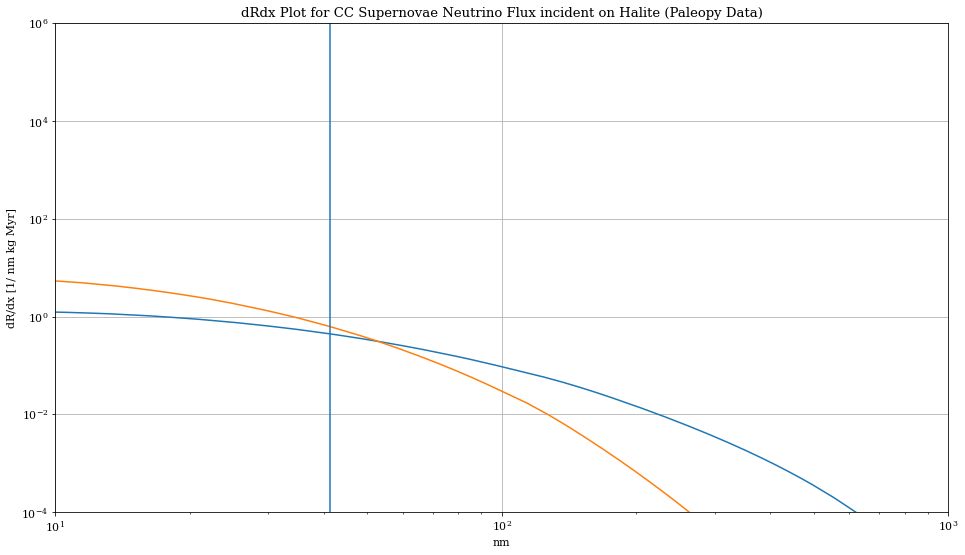

In [ ]:
Na_A = 22.99
Na_p = 11

dRdx, rates_ref, dRdx_d, Na_ref = dRdx_component(SN_x, SN_y, Na_A, Na_p, na_NH, 0)

Cl_A = 35.45
Cl_p = 17

dRdx_Cl, rates_ref_Cl, dRdx_Cl_d, Cl_ref = dRdx_component(SN_x, SN_y, Cl_A, Cl_p, cl_NH, 0)

plt.figure(figsize=(16,9))
plt.title("dRdx Plot for CC Supernovae Neutrino Flux incident on Halite (Paleopy Data)")
plt.loglog(na_NH[:,3]*1000, (dRdx*0.3934)/1000)
plt.loglog(cl_NH[:,3]*1000 ,(dRdx_Cl*0.6066)/1000)
plt.axvline(41.3)
plt.xlim(10,1000)
plt.ylim(1e-4,1e6)
plt.xlabel("nm")
plt.ylabel("dR/dx [1/ nm kg Myr]")
plt.grid();

Plotting the Thorium vertical line makes it clear that the track lengths must not match up. Therefore I'll instead work to calculate the track lengths using the formula introduced in the next section.

### Thorium Track Length Integral

Here I am double checking the track length generated by SRIM against an analytical calculation via the formula below.

$$ x_T(E_R) = \int^{E_r}_0 dE \ \bigg|{\frac{dE}{dx_T}}\bigg|^{-1} $$

#### Halite:

Calculated Track Length: 45.4588771449128 nm
SRIM Track Length: 41.5 nm


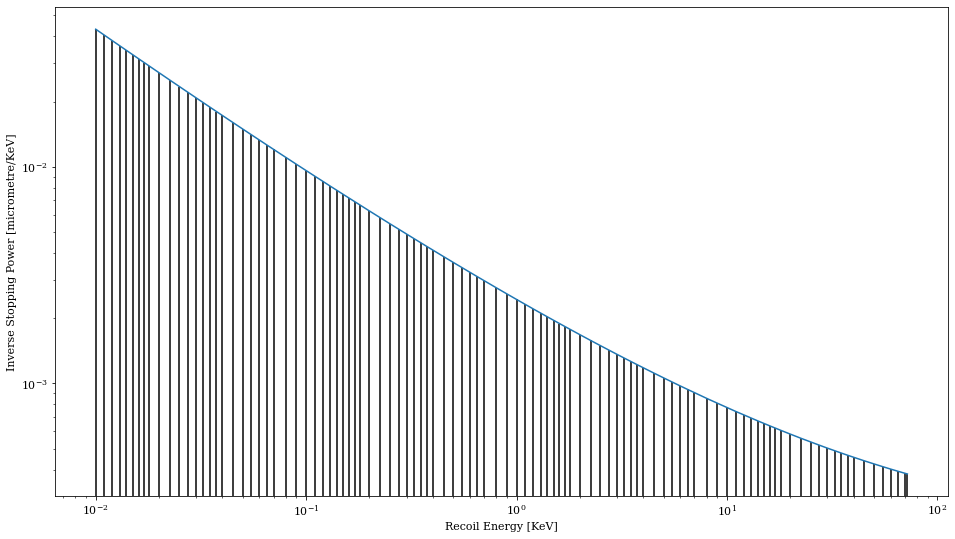

In [ ]:
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Halite//Th.txt", "drive//MyDrive//Compound Stopping powers//Halite//Th_.txt")

Thorium = np.loadtxt("drive//MyDrive//Compound Stopping powers//Halite//Th_.txt")

integrand = (1/(Thorium[:,1]+Thorium[:,2])) # Setting integral, energies multiplied by inverse stopping powers 

plt.loglog(Thorium[:,0], integrand)
plt.ylabel('Inverse Stopping Power [micrometre/KeV]')
plt.xlabel('Recoil Energy [KeV]')

plt.vlines(Thorium[:,0],ymin=0, ymax=integrand)

length = scipy.integrate.simps(integrand, Thorium[:,0])

print('Calculated Track Length:',length*1000,'nm')
print('SRIM Track Length:',Thorium[-1,3]*1000,'nm')

There is a clear disparity between the SRIM and calculated track length (found via the integral of the above curve). One may also note that there are somewhat large gaps between the recoil energies potentially causing less accuracy with regards to the track length calculations. This may be solved via interpolation.

This difference makes one question whether calculated track lengths would provide the correct alignment for my calculations and previous plots.

#### Scheme for Track Lengths

Here we'll devise a scheme to calculate track lengths for SRIM data. We will do this for Halite and then compare with the original results.

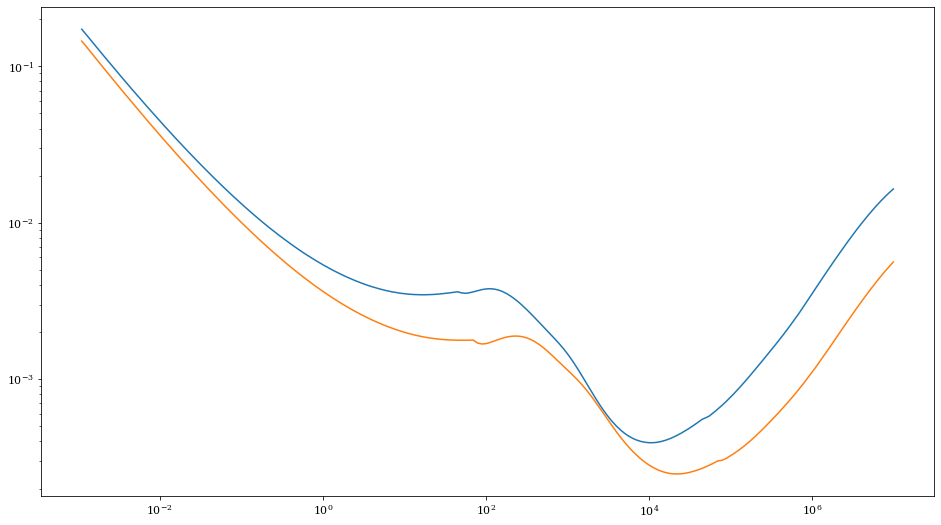

In [ ]:
Sodium = na_NH
    
integrand = (1/(Sodium[:,1]+Sodium[:,2])) # Setting integral inverse stopping powers 

plt.loglog(Sodium[:,0], integrand)

iterations = len(Sodium[:,3])
lengths = np.zeros(iterations)

for i in range(iterations):
  if i > 0:
    integrand = (1/(Sodium[:i,1]+Sodium[:i,2])) # Setting integral inverse stopping powers 
    lengths[i] = scipy.integrate.simps(integrand, Sodium[:i,0])

Sodium[:,3] = lengths

###################################################################################################

Chlorine = cl_NH

integrand = (1/(Chlorine[:,1]+Chlorine[:,2])) # Setting integral inverse stopping powers 

plt.loglog(Chlorine[:,0], integrand)

iterations = len(Chlorine[:,3])
lengths = np.zeros(iterations)

for i in range(iterations):
  if i > 0:
    integrand = (1/(Chlorine[:i,1]+Chlorine[:i,2])) # Setting integral, energies multiplied by inverse stopping powers 
    lengths[i] = scipy.integrate.simps(integrand, Chlorine[:i,0])

Chlorine[:,3] = lengths


#### Applied New Track Lengths to Halite

In [ ]:
# def dRdx_component(E_flux, flux_y, A, N_p, SRIM, verbose=0):
#   """
  
#   Inputs:
#   E_flux - Energy values of neutrino spectra
#   flux_y - Flux values of neutrino spectra
#   A - Mass of target nuclei
#   N_p - Number of protons in target nuclei
#   SRIM - Generated Dataset


#   Outputs:
#   dRdx - Calculate Rates Distributions
#   rates_ref - Calculate Rates 
#   dRdx_d -  

#   """


  
#   m_N = A*1.66054e-27

#   # Fitting Flux Function via interpolation (Flux Function)

#   x_ref = np.geomspace(1e-6, 1e5, 10000) # Reference energy scale 1ev to 10GeV

#   x_exp = SN_x # X to be interpolated
#   y_exp = SN_y # Y to be interpolated

#   flux_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
#   ref = flux_func(x_ref).clip(min=0)

#   E_last = SN_x[-1] # Final energy considered in spectra

#   for i in range(len(ref)):
#     if x_ref[i] >= E_last:
#       pos = i
#       break

#   if verbose==1:
#     plt.plot(E_flux, flux_y)
#     plt.plot(x_ref[:pos], ref[:pos], 'o')
#     print("Maximum Neutrino Energy Index Considered", pos)

#   ### dRdE 

#   E_nu = x_ref[:pos] # Sets up the range of neutrino energies to use

#   iterations = len(E_nu) # The number of iterations for the integral to be calculated for each recoil energy

#   ERmax = wim.ERmax(E_nu, A) # Recoil energies calculated via neutrino energies

#   rates = np.zeros(iterations) # Empty array for the rate values for each recoil energy

#   for i in range(iterations): # here we iterate over every recoil energy value and calculate the differential cross section for each neutrino energy that could produce it. This is multiplied by the actual flux of the energy too. 
#     integrand = wim.xsec_CEvNS(ERmax[i], E_nu[i:], N_p, A-N_p) * flux_func(E_nu[i:]) # This forms the curve to integrate
#     rates[i] = scipy.integrate.simps(integrand, E_nu[i:]) # This integrates the curve over the range of neutrino energies considered. To then be repeated for the next recoil energy


#   rates *= (86400 * 365.25 * 1e6/m_N) # Rates for the Myr timescale divided by mass in kilograms for mass dependent rate.

#   x_ref = SRIM_array_10GeV

#   x_exp = ERmax # X to be interpolated
#   y_exp = rates # Y to be interpolated


#   # Interpolation For Energy ################################################## 
  
#   rates_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
#   rates_ref = rates_func(x_ref).clip(min=0)

#   ##################################################################

    
#   stopping = SRIM[:,1] + SRIM[:,2]


#   dRdx = rates_ref * stopping


#   # Interpolation for track lengths ########################################## 


#   lengths = SRIM[:,3] * 1000 # Track lengths in nanometres
  
#   for i in range(len(lengths)):
#     if lengths[i] > 10:
#       pos = i
#       break
  
#   x_exp = lengths[pos:]
  
#   y_exp = dRdx[pos:] # dRdx for per micron


#   rates_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=3)

#   points = 1000
#   x_ref = np.geomspace(1e1, 5e3, points) # Track Lengths in micrometres
#   dRdx_d = rates_func(x_ref).clip(min=0)


#     ## Fitting Rates
#   if verbose ==1:

#     plt.figure(figsize=(16,9))
#     plt.loglog(x_exp, y_exp, 'o', label='Calculated Values')

#     print("Length of Stopping Distances Arrays", len(Na_stopping))

#     plt.loglog(x_ref, rates_ref,'-o', label="Fitted")
#     plt.xlim(10,1000)
#     plt.legend();

#     plt.figure()
#     plt.loglog(SRIM[:,3]*1000, dRdx/1000)
#     plt.xlabel("nm")
#     plt.xlim(10,1000)
#     plt.ylim(1e-4,1e6)

#     #dRdx = Na_stopping * rates

#     plt.figure()
#     plt.loglog(ERmax, rates)
#     # plt.figure()
#     # plt.loglog(na_NH[:,3], dRdx)
    
#   return dRdx, rates_ref, dRdx_d, x_ref 


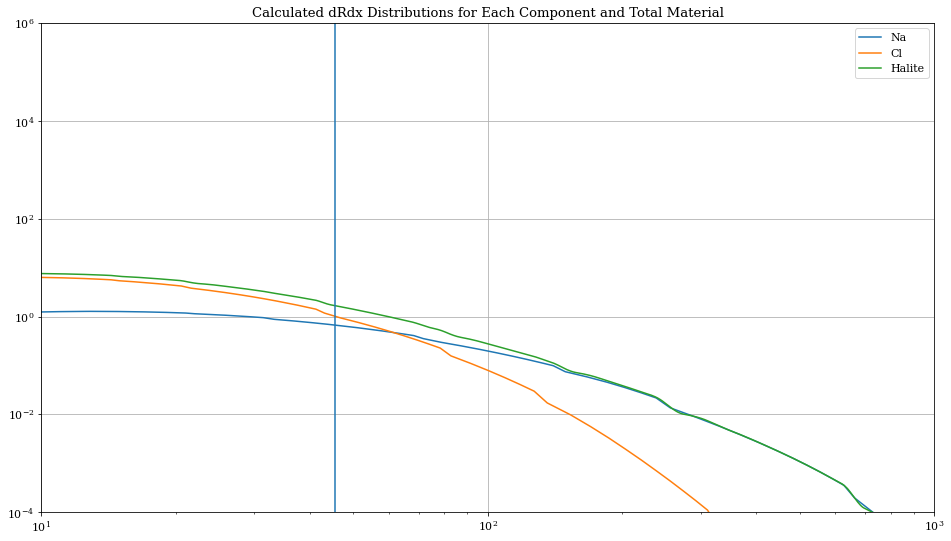

In [ ]:
Na_A = 22.99
Na_p = 11

dRdx, rates_ref, dRdx_d_Na, Na_ref = dRdx_component(SN_x, SN_y, Na_A, Na_p, Sodium, 0)

Cl_A = 35.45
Cl_p = 17

dRdx_Cl, rates_ref_Cl, dRdx_d_Cl, Cl_ref = dRdx_component(SN_x, SN_y, Cl_A, Cl_p, Chlorine, 0)

points = 1000
x_ref = np.geomspace(1e1, 5e3, points) # Track Lengths in micrometres

# plt.figure(figsize=(16,9))
# plt.loglog(na_NH[:,3]*1000, (dRdx_Cl*0.6066)/1000)
# plt.xlim(10,1000)
# plt.ylim(1e-4,1e6)


plt.figure(figsize=(16,9))
#plt.loglog(x_ref, dRdx_d_Na/1000, 'o')
plt.loglog(Sodium[:,3]*1000, 0.3934*dRdx/1000, label='Na')
plt.loglog(Chlorine[:,3]*1000, 0.6066*dRdx_Cl/1000, label='Cl')
plt.title('Calculated dRdx Distributions for Each Component and Total Material')


# plt.figure(figsize=(16,9))
# plt.title("dRdx Plot for CC Supernovae Neutrino Flux incident on Halite (NH SRIM Data)")
# plt.loglog(x_ref, ((dRdx_d_Na*0.3934)+(dRdx_d_Cl*0.6066)))

plt.loglog(x_ref, ((dRdx_d_Na*0.3934)+(dRdx_d_Cl*0.6066))/1000, label='Halite')
# plt.axvline(41.3)
plt.xlim(10,1000)
plt.ylim(1e-4,1e6)
# plt.xlabel("nm")
# plt.ylabel("dR/dx [1/ nm kg Myr]")
plt.grid()
plt.axvline(0.0454588771449128*1000)
plt.legend()
plt.savefig("Halite Plot.pdf");


This is successful to a certain degree but it seems likely that we'll have to increase the incrementation of our data to prohibit any noisy curves like above.

#### More precise Track Lengths

To proceed, the plan is to interpolate the stopping powers generated via SRIM on a much larger energy basis array, where 100 extra points will reside between each SRIM recoil energy. Then once all has been computed, we'll extract each 100th track length value and plug them back into the original SRIM database structure and enact the dRdx function again.

In [ ]:
# Here is a scheme set to expand the defined energy recoil array, SRIM_array_10GeV, to one where each 0th and 100th element are from the original array.
# The purpose of this is to hopefully generate some more accurate track lengths in order to stop the curve being so wobbly.

ER_expanded_xref = np.array([SRIM_array_10GeV[0]])

for i in range(len(SRIM_array_10GeV)):
  if i != 0:
    segment = np.geomspace(SRIM_array_10GeV[i-1], SRIM_array_10GeV[i], 101)
    ER_expanded_xref = np.append(ER_expanded_xref, segment[1:])

The plot below is purely to visualise the increased granularity by using this expanded array.

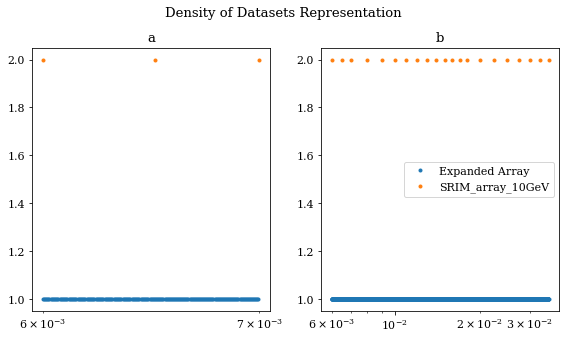

In [ ]:
y_1 = np.ones(len(ER_expanded_xref))
y_2 = 2*np.ones(len(SRIM_array_10GeV))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4.5))

plt.suptitle('Density of Datasets Representation', y=1.04)
ax1.set_title('a')
ax2.set_title('b')

ax1.semilogx(ER_expanded_xref[2000:2200], y_1[2000:2200],'.', label='Expanded Array')
ax1.semilogx(SRIM_array_10GeV[20:23], y_2[20:23],'.', label='SRIM_array_10GeV')

ax2.semilogx(ER_expanded_xref[2000:4000], y_1[2000:4000],'.', label='Expanded Array')
ax2.semilogx(SRIM_array_10GeV[20:41], y_2[20:41],'.', label='SRIM_array_10GeV')
ax2.legend()

plt.tight_layout();

Now the interpolation scheme for both sodium and chlorine is enacted.

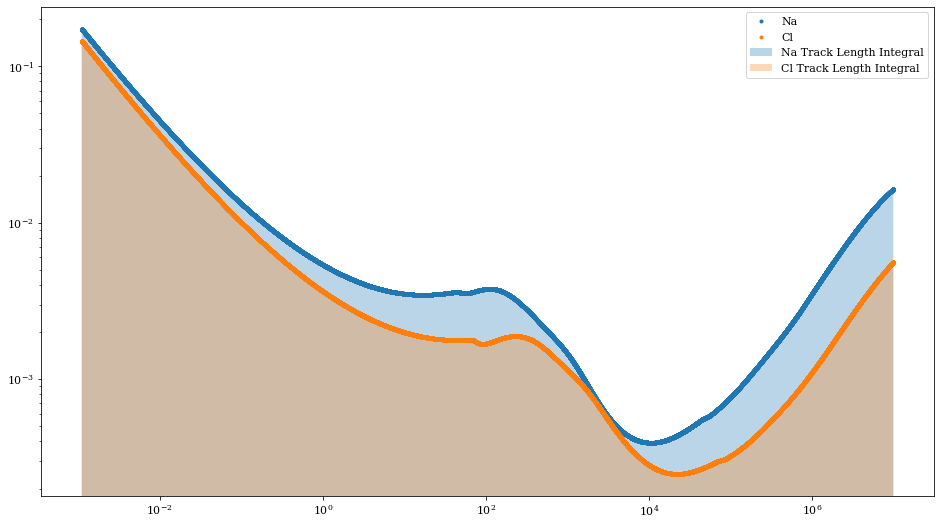

In [ ]:
SRIM = Sodium

x_exp = SRIM[:,0] # Recoil Energies
y_exp = 1/(SRIM[:,1] + SRIM[:,2]) # Stopping Powers to be interpolated

S_power = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)

solution = S_power(ER_expanded_xref).clip(min=0)

SRIM_cl = Chlorine

x_exp_cl = SRIM_cl[:,0] # Recoil Energies
y_exp_cl = 1/(SRIM_cl[:,1] + SRIM_cl[:,2]) # Stopping Powers to be interpolated

S_power_cl = interpolate.InterpolatedUnivariateSpline(x_exp_cl, y_exp_cl, k=1)

solution_cl = S_power_cl(ER_expanded_xref).clip(min=0)

verbose = 1
if verbose == 1:
  plt.loglog(ER_expanded_xref, solution, '.', label='Na')
  plt.fill_between(ER_expanded_xref, solution, y2=0, alpha=0.3, label='Na Track Length Integral')
  
  plt.loglog(ER_expanded_xref, solution_cl, '.', label='Cl')
  plt.fill_between(ER_expanded_xref, solution_cl, y2=0, alpha=0.3, label='Cl Track Length Integral')
  
  plt.legend();

The interpolated stopping powers are then used for calculating track lengths.

In [ ]:
## Using expanded arrays for interpolation

inv_stop = solution # Setting integral inverse stopping powers 
x_ref = ER_expanded_xref # Energy basis

iterations = len(solution)
lengths = np.zeros(iterations)

for i in range(iterations):
  if i > 0:
    integrand = (inv_stop[:i]) # Setting integral inverse stopping powers 
    lengths[i] = scipy.integrate.simps(integrand, x_ref[:i])

## Using expanded arrays for interpolation for Chlorine #################

inv_stop_cl = solution_cl # Setting integral inverse stopping powers 
x_ref = ER_expanded_xref # Energy basis

iterations = len(solution)
lengths_cl = np.zeros(iterations)

for i in range(iterations):
  if i > 0:
    integrand = (inv_stop_cl[:i]) # Setting integral inverse stopping powers 
    lengths_cl[i] = scipy.integrate.simps(integrand, x_ref[:i])

Extracting 100th values to check alignment with original data for stopping powers and to update data with regard to track lengths.

In [ ]:
original_stopping = np.zeros(260)
original_lengths = np.zeros(260)

indices = np.arange(0,26000,100)

for i in indices:
  j = int(i/100)
  original_stopping[j] = 1/solution[i] 

for i in indices:
  j = int(i/100)
  original_lengths[j] = lengths[i] 

###############################################
original_stopping_cl = np.zeros(260)
original_lengths_cl = np.zeros(260)

indices = np.arange(0,26000,100)

for i in indices:
  j = int(i/100)
  original_stopping_cl[j] = 1/solution_cl[i] 

for i in indices:
  j = int(i/100)
  original_lengths_cl[j] = lengths_cl[i] 

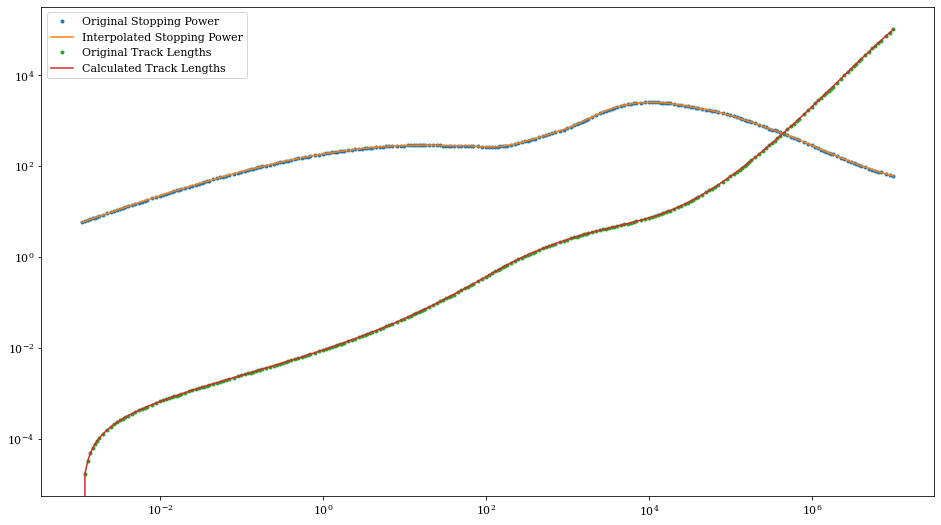

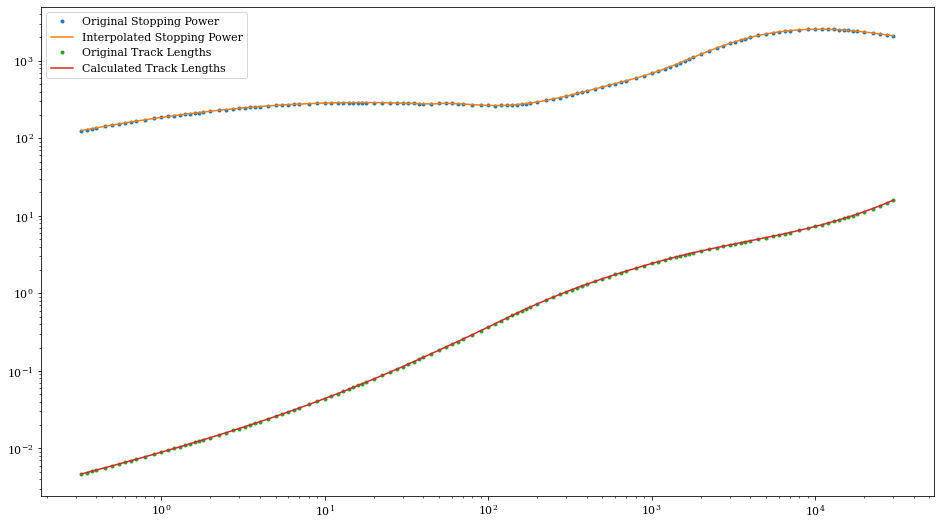

In [ ]:
plt.figure(figsize=(16,9))
plt.loglog(Sodium[:,0],Sodium[:,1]+Sodium[:,2],'.', label='Original Stopping Power')
plt.loglog(Sodium[:,0],original_stopping, label='Interpolated Stopping Power')

plt.loglog(Sodium[:,0],Sodium[:,3],'.', label='Original Track Lengths')
plt.loglog(Sodium[:,0],original_lengths, label='Calculated Track Lengths')

plt.legend();
######################################################

plt.figure(figsize=(16,9))
plt.loglog(Sodium[65:195,0],Sodium[65:195,1]+Sodium[65:195,2],'.', label='Original Stopping Power')
plt.loglog(Sodium[65:195,0],original_stopping[65:195], label='Interpolated Stopping Power')


plt.loglog(Sodium[65:195,0],Sodium[65:195,3],'.', label='Original Track Lengths')
plt.loglog(Sodium[65:195,0],original_lengths[65:195], label='Calculated Track Lengths')
plt.legend();

Generally the data seems to be similar to both the original values, with the knowledge that the calculation of track lengths provides a relatively close value to the original but is different.

Below we're now setting up some updated structures with these new track lengths.

In [ ]:
Sodium_updated = Sodium

Sodium_updated[:,3] = original_lengths

Chlorine_updated = Chlorine

Chlorine_updated[:,3] = original_lengths_cl

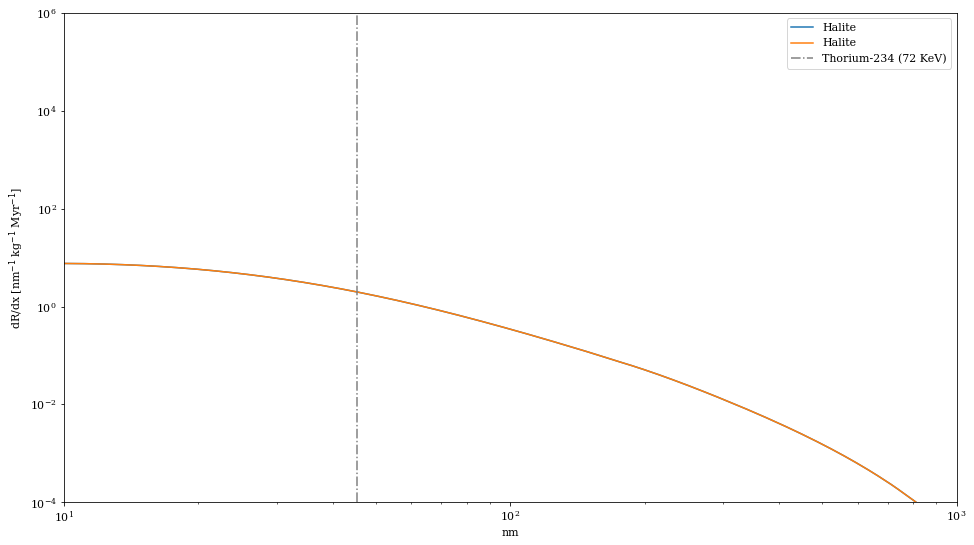

In [ ]:
Na_A = 22.99
Na_p = 11

dRdx_u, rates_ref_u, dRdx_d_Na_u, Na_ref_u = dRdx_component(SN_x, SN_y, Na_A, Na_p, Sodium_updated, 0)

Cl_A = 35.45
Cl_p = 17

dRdx_Cl_u, rates_ref_Cl_u, dRdx_d_Cl_u, Cl_ref_u = dRdx_component(SN_x, SN_y, Cl_A, Cl_p, Chlorine_updated, 0)


plt.figure(figsize=(16,9))


#plt.loglog(na_NH[:,3]*1000, 0.3934*dRdx/1000, '-', label='Original Na') # Original Rate Calculation


#plt.loglog(x_ref, ((dRdx_d_Na*0.3934))/1000, label='Na Fitted')

# plt.loglog(Sodium_updated[:,3]*1000, 0.3934*dRdx_u/1000, label='Na updated')

# plt.loglog(Chlorine_updated[:,3]*1000, dRdx_Cl_u*0.6066/1000, label='Cl updated')

#plt.loglog(Na_ref_u, ((dRdx_d_Na_u*0.3934))/1000,'.', label='Na')

#plt.loglog(Cl_ref_u, ((dRdx_d_Cl_u*0.6066))/1000,'.', label='Cl')



plt.loglog(Na_ref_u, ((dRdx_d_Na_u*0.3934)+(dRdx_d_Cl_u*0.6066))/1000, label='Halite')

plt.axvline(0.0454588771449128*1000, linestyle='dashdot',label='Thorium-234 (72 KeV)', color='grey')
plt.xlim(10,1000)
plt.ylim(1e-4,1e6)
plt.ylabel("dR/dx [nm$^{-1}$ kg$^{-1}$ Myr$^{-1}$]")
plt.xlabel("nm")
plt.legend()
plt.savefig("Halite Plot2.pdf");

## Generating Discrete Plots for Halite

This will require rethinking the dRdx_component function for single energy and flux values rather than a spectrum.

In [ ]:
x = 
y = 

SyntaxError: ignored

In [ ]:
Na_A = 22.99
Na_p = 11

dRdx, rates_ref, dRdx_d_Na, Na_ref = dRdx_component(x, y, Na_A, Na_p, Sodium, 0)

Cl_A = 35.45
Cl_p = 17

dRdx_Cl, rates_ref_Cl, dRdx_d_Cl, Cl_ref = dRdx_component(x, y, Cl_A, Cl_p, Chlorine, 0)

points = 1000
x_ref = np.geomspace(1e1, 5e3, points) # Track Lengths in micrometres

# plt.figure(figsize=(16,9))
# plt.loglog(na_NH[:,3]*1000, (dRdx_Cl*0.6066)/1000)
# plt.xlim(10,1000)
# plt.ylim(1e-4,1e6)


plt.figure(figsize=(16,9))
#plt.loglog(x_ref, dRdx_d_Na/1000, 'o')
plt.loglog(Sodium[:,3]*1000, 0.3934*dRdx/1000, label='Na')
plt.loglog(Chlorine[:,3]*1000, 0.6066*dRdx_Cl/1000, label='Cl')
plt.title('Calculated dRdx Distributions for Each Component and Total Material')


# plt.figure(figsize=(16,9))
# plt.title("dRdx Plot for CC Supernovae Neutrino Flux incident on Halite (NH SRIM Data)")
# plt.loglog(x_ref, ((dRdx_d_Na*0.3934)+(dRdx_d_Cl*0.6066)))

plt.loglog(x_ref, ((dRdx_d_Na*0.3934)+(dRdx_d_Cl*0.6066))/1000, label='Halite')
# plt.axvline(41.3)
plt.xlim(10,1000)
plt.ylim(1e-4,1e6)
# plt.xlabel("nm")
# plt.ylabel("dR/dx [1/ nm kg Myr]")
plt.grid()
plt.axvline(0.0454588771449128*1000)
plt.legend();


## Simulating Epsomite with CC Supernovae Neutrino Flux

#### Uploading and Cleaning Data

In [ ]:
### CC Supernovae Flux
SN = np.loadtxt("drive//MyDrive//fluxdata//Galactic_SN_spec.txt")
SN_x, SN_y = SN[:,0], SN[:,1]


#H = np.loadtxt("drive//MyDrive//Compound Stopping Powers//Epsomite//H.txt", usecols=(0,), skiprows=3)
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Epsomite//H.txt", "drive//MyDrive//Compound Stopping powers//Epsomite//H_.txt")
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Epsomite//O.txt", "drive//MyDrive//Compound Stopping powers//Epsomite//O_.txt")
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Epsomite//Mg.txt", "drive//MyDrive//Compound Stopping powers//Epsomite//Mg_.txt")
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Epsomite//S.txt", "drive//MyDrive//Compound Stopping powers//Epsomite//S_.txt")

H = np.loadtxt("drive//MyDrive//Compound Stopping powers//Epsomite//H_.txt")
O = np.loadtxt("drive//MyDrive//Compound Stopping powers//Epsomite//O_.txt")
Mg = np.loadtxt("drive//MyDrive//Compound Stopping powers//Epsomite//Mg_.txt")
S = np.loadtxt("drive//MyDrive//Compound Stopping powers//Epsomite//S_.txt")


#### Aside: Check that it now Aligns with Paleopy

In [ ]:
### Paleopy Data

hydrogen = np.loadtxt("drive//MyDrive//epsomite//H-Eps.txt")
oxygen = np.loadtxt("drive//MyDrive//epsomite//O-Eps.txt")
magnesium = np.loadtxt("drive//MyDrive//epsomite//Mg-Eps.txt")
sulfur = np.loadtxt("drive//MyDrive//epsomite//S-Eps.txt")

In [ ]:
plt.figure(figsize=(16,9))
plt.loglog(H[:,0], H[:,1]+H[:,2], label = 'H')
plt.loglog(O[:,0], O[:,1]+O[:,2], label = 'O')
plt.loglog(Mg[:,0], Mg[:,1]+Mg[:,2], label = 'Mg')
plt.loglog(S[:,0], S[:,1]+S[:,2], label = 'S')

plt.loglog(hydrogen[:,0], hydrogen[:,1]+hydrogen[:,2],'.', label = 'H (Paleopy)')
plt.loglog(oxygen[:,0], oxygen[:,1]+oxygen[:,2],'.', label = 'O (Paleopy)')
plt.loglog(magnesium[:,0], magnesium[:,1]+magnesium[:,2],'.', label = 'Mg (Paleopy)')
plt.loglog(sulfur[:,0], sulfur[:,1]+sulfur[:,2],'.', label = 'S (Paleopy)')
plt.legend();

i = 0 

if i == 1:
  plt.figure(figsize=(16,9))
  plt.loglog(H[:,0], H[:,1]+H[:,2], label = 'H')
  plt.loglog(hydrogen[:,0], hydrogen[:,1]+hydrogen[:,2],'.', label = 'H (Paleopy)')
  plt.legend();

  plt.figure(figsize=(16,9))
  plt.loglog(O[:,0], O[:,1]+O[:,2], label = 'O')
  plt.loglog(oxygen[:,0], oxygen[:,1]+oxygen[:,2],'.', label = 'O (Paleopy)')
  plt.legend();

  plt.figure(figsize=(16,9))
  plt.loglog(Mg[:,0], Mg[:,1]+Mg[:,2], label = 'Mg')
  plt.loglog(magnesium[:,0], magnesium[:,1]+magnesium[:,2],'.', label = 'Mg (Paleopy)')
  plt.legend(); 

  plt.figure(figsize=(16,9))
  plt.loglog(S[:,0], S[:,1]+S[:,2], label = 'S')
  plt.loglog(sulfur[:,0], sulfur[:,1]+sulfur[:,2],'.', label = 'S (Paleopy)')
  plt.legend();

There seems to be some discrepancy here between the paleopy data and my own.

#### Epsomite:

Output from SRIM (for 72 KeV Recoil Energy)

```python
        Ion        dE/dx      dE/dx     Projected  Longitudinal   Lateral
       Energy      Elec.      Nuclear     Range     Straggling   Straggling
  --------------  ---------- ---------- ----------  ----------  ----------
  72.00 keV   1.431E+02  2.276E+03     470 A        79 A        63 A   
```

Input Parameters

```python
==================================================================
              SRIM version ---> SRIM-2013.00
              Calc. date   ---> February 28, 2022 
 ==================================================================

 Disk File Name = SRIM Outputs\Thorium in Mg- S- O- H.txt

 Ion = Thorium [90] , Mass = 234.0436 amu

 Target Density =  1.6700E+00 g/cm3 = 1.0988E+23 atoms/cm3
 ======= Target  Composition ========
    Atom   Atom   Atomic    Mass     
    Name   Numb   Percent   Percent  
    ----   ----   -------   -------  
     Mg     12    003.72    009.88   
      S     16    003.71    013.00   
      O      8    040.86    071.43   
      H      1    051.71    005.69   
 ====================================
 Bragg Correction = -50.86%

```

In [ ]:
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Epsomite//Th.txt", "drive//MyDrive//Compound Stopping powers//Epsomite//Th_.txt")

Thorium = np.loadtxt("drive//MyDrive//Compound Stopping powers//Epsomite//Th_.txt")

In [ ]:
integrand = (1/(Thorium[:,1]+Thorium[:,2])) # Setting integral, energies multiplied by inverse stopping powers for epsomite

plt.loglog(Thorium[:,0], integrand)
plt.vlines(Thorium[:,0],ymin=0, ymax=integrand)

length = scipy.integrate.simps(integrand, Thorium[:,0])
print(length)
print(Thorium[-1,3])

### Calculating dRdX Distributions

In [ ]:
## Hydrogen
H_A = 1.008
H_p = 1

dRdx_H, rates_H = dRdx_component(SN_x, SN_y, H_A, H_p, H, 0)

## Oxygen
O_A = 15.999
O_p = 8

dRdx_O, rates_O = dRdx_component(SN_x, SN_y, O_A, O_p, O, 0)

## Magnesium
Mg_A = 24.305
Mg_p = 12

dRdx_Mg, rates_Mg = dRdx_component(SN_x, SN_y, Mg_A, Mg_p, Mg, 0)

## Sulphur

S_A = 32.066
S_p = 16

dRdx_S, rates_S = dRdx_component(SN_x, SN_y, S_A, S_p, S, 0)

####################################################################


plt.figure(figsize=(16,9))
plt.title("dRdx Plot for CC Supernovae Neutrino Flux incident on Halite (Paleopy Data)")
plt.loglog(na_NH[:,3]*1000, ((dRdx*0.3934)+(dRdx_Cl*0.6066))/1000)
plt.axvline(41.3)
plt.xlim(10,1000)
plt.ylim(1e-4,1e6)
plt.xlabel("nm")
plt.ylabel("dR/dx [1/ nm kg Myr]")
plt.grid();

### Recoil Energy Basis

Firstly, we have set out the recoil energies that are to be tested via what SRIM generates.

In [ ]:
SRIM_array = np.array([1.10000e-03,1.20000e-03,1.30000e-03,1.40000e-03,1.50000e-03,1.60000e-03,1.70000e-03,1.80000e-03,2.00000e-03,2.25000e-03,2.49999e-03,2.74999e-03,2.99999e-03,
                       3.24999e-03,3.49999e-03,3.74999e-03,3.99999e-03,4.49999e-03,4.99999e-03,5.49999e-03,5.99999e-03,6.49999e-03,6.99999e-03,7.99999e-03,8.99999e-03,9.99999e-03,
                       1.09999e-02,1.19999e-02,1.29999e-02,1.39999e-02,1.49999e-02,1.59999e-02,1.69999e-02,1.79999e-02,1.99999e-02,2.24999e-02,2.49999e-02,2.74999e-02,2.99999e-02,
                       3.24999e-02,3.49999e-02,3.74999e-02,3.99999e-02,4.49999e-02,4.99999e-02,5.49999e-02,5.99999e-02,6.49999e-02,6.99999e-02,7.99999e-02,8.99999e-02,9.99999e-02,
                       1.10000e-01,1.20000e-01,1.30000e-01,1.39999e-01,1.49999e-01,1.59999e-01,1.69999e-01,1.79999e-01,1.99999e-01,2.24999e-01,2.49999e-01,2.74999e-01,2.99999e-01,
                       3.24999e-01,3.49999e-01,3.74999e-01,3.99999e-01,4.49999e-01,4.99999e-01,5.49999e-01,5.99999e-01,6.49999e-01,6.99999e-01,7.99999e-01,8.99999e-01,9.99999e-01,
                       1.10000e+00,1.20000e+00,1.30000e+00,1.40000e+00,1.50000e+00,1.60000e+00,1.70000e+00,1.80000e+00,2.00000e+00,2.25000e+00,2.50000e+00,2.75000e+00,3.00000e+00,
                       3.25000e+00,3.50000e+00,3.75000e+00,4.00000e+00,4.50000e+00,5.00000e+00,5.50000e+00,6.00000e+00,6.50000e+00,7.00000e+00,8.00000e+00,9.00000e+00,1.00000e+01,
                       1.10000e+01,1.20000e+01,1.30000e+01,1.40000e+01,1.50000e+01,1.60000e+01,1.70000e+01,1.80000e+01,2.00000e+01,2.25000e+01,2.50000e+01,2.75000e+01,3.00000e+01,
                       3.25000e+01,3.50000e+01,3.75000e+01,4.00000e+01,4.50000e+01,5.00000e+01,5.50000e+01,6.00000e+01,6.50000e+01,7.00000e+01,8.00000e+01,9.00000e+01,1.00000e+02,
                       1.10000e+02,1.20000e+02,1.30000e+02,1.40000e+02,1.50000e+02,1.60000e+02,1.70000e+02,1.80000e+02,2.00000e+02,2.25000e+02,2.50000e+02,2.75000e+02,3.00000e+02,
                       3.25000e+02,3.50000e+02,3.75000e+02,4.00000e+02,4.50000e+02,5.00000e+02,5.50000e+02,6.00000e+02,6.50000e+02,7.00000e+02,8.00000e+02,9.00000e+02,1.00000e+03,
                       1.10000e+03,1.20000e+03,1.30000e+03,1.40000e+03,1.50000e+03,1.60000e+03,1.70000e+03,1.80000e+03,2.00000e+03,2.25000e+03,2.50000e+03,2.75000e+03,3.00000e+03,
                       3.25000e+03,3.50000e+03,3.75000e+03,4.00000e+03,4.50000e+03,5.00000e+03,5.50000e+03,6.00000e+03,6.50000e+03,7.00000e+03,8.00000e+03,9.00000e+03,1.00000e+04])

SRIM_array_10GeV = np.array([1.10000e-03,1.20000e-03,1.30000e-03,1.40000e-03,1.50000e-03,1.60000e-03,1.70000e-03,1.80000e-03,2.00000e-03,2.25000e-03,2.49999e-03,2.74999e-03,2.99999e-03,
                             3.24999e-03,3.49999e-03,3.74999e-03,3.99999e-03,4.49999e-03,4.99999e-03,5.49999e-03,5.99999e-03,6.49999e-03,6.99999e-03,7.99999e-03,8.99999e-03,9.99999e-03,
                             1.09999e-02,1.19999e-02,1.29999e-02,1.39999e-02,1.49999e-02,1.59999e-02,1.69999e-02,1.79999e-02,1.99999e-02,2.24999e-02,2.49999e-02,2.74999e-02,2.99999e-02,
                             3.24999e-02,3.49999e-02,3.74999e-02,3.99999e-02,4.49999e-02,4.99999e-02,5.49999e-02,5.99999e-02,6.49999e-02,6.99999e-02,7.99999e-02,8.99999e-02,9.99999e-02,
                             1.10000e-01,1.20000e-01,1.30000e-01,1.39999e-01,1.49999e-01,1.59999e-01,1.69999e-01,1.79999e-01,1.99999e-01,2.24999e-01,2.49999e-01,2.74999e-01,2.99999e-01,
                             3.24999e-01,3.49999e-01,3.74999e-01,3.99999e-01,4.49999e-01,4.99999e-01,5.49999e-01,5.99999e-01,6.49999e-01,6.99999e-01,7.99999e-01,8.99999e-01,9.99999e-01,
                             1.10000e+00,1.20000e+00,1.30000e+00,1.40000e+00,1.50000e+00,1.60000e+00,1.70000e+00,1.80000e+00,2.00000e+00,2.25000e+00,2.50000e+00,2.75000e+00,3.00000e+00,
                             3.25000e+00,3.50000e+00,3.75000e+00,4.00000e+00,4.50000e+00,5.00000e+00,5.50000e+00,6.00000e+00,6.50000e+00,7.00000e+00,8.00000e+00,9.00000e+00,1.00000e+01,
                             1.10000e+01,1.20000e+01,1.30000e+01,1.40000e+01,1.50000e+01,1.60000e+01,1.70000e+01,1.80000e+01,2.00000e+01,2.25000e+01,2.50000e+01,2.75000e+01,3.00000e+01,
                             3.25000e+01,3.50000e+01,3.75000e+01,4.00000e+01,4.50000e+01,5.00000e+01,5.50000e+01,6.00000e+01,6.50000e+01,7.00000e+01,8.00000e+01,9.00000e+01,1.00000e+02,
                             1.10000e+02,1.20000e+02,1.30000e+02,1.40000e+02,1.50000e+02,1.60000e+02,1.70000e+02,1.80000e+02,2.00000e+02,2.25000e+02,2.50000e+02,2.75000e+02,3.00000e+02,
                             3.25000e+02,3.50000e+02,3.75000e+02,4.00000e+02,4.50000e+02,5.00000e+02,5.50000e+02,6.00000e+02,6.50000e+02,7.00000e+02,8.00000e+02,9.00000e+02,1.00000e+03,
                             1.10000e+03,1.20000e+03,1.30000e+03,1.40000e+03,1.50000e+03,1.60000e+03,1.70000e+03,1.80000e+03,2.00000e+03,2.25000e+03,2.50000e+03,2.75000e+03,3.00000e+03,
                             3.25000e+03,3.50000e+03,3.75000e+03,4.00000e+03,4.50000e+03,5.00000e+03,5.50000e+03,6.00000e+03,6.50000e+03,7.00000e+03,8.00000e+03,9.00000e+03,1.00000e+04,
                             1.10000e+04,1.20000e+04,1.30000e+04,1.40000e+04,1.50000e+04,1.60000e+04,1.70000e+04,1.80000e+04,2.00000e+04,2.25000e+04,2.50000e+04,2.75000e+04,3.00000e+04,
                             3.25000e+04,3.50000e+04,3.75000e+04,4.00000e+04,4.50000e+04,5.00000e+04,5.50000e+04,6.00000e+04,6.50000e+04,7.00000e+04,8.00000e+04,9.00000e+04,1.00000e+05,
                             1.10000e+05,1.20000e+05,1.30000e+05,1.40000e+05,1.50000e+05,1.60000e+05,1.70000e+05,1.80000e+05,2.00000e+05,2.25000e+05,2.50000e+05,2.75000e+05,3.00000e+05,
                             3.25000e+05,3.50000e+05,3.75000e+05,4.00000e+05,4.50000e+05,5.00000e+05,5.50000e+05,6.00000e+05,6.50000e+05,7.00000e+05,8.00000e+05,9.00000e+05,1.00000e+06,
                             1.10000e+06,1.20000e+06,1.30000e+06,1.40000e+06,1.50000e+06,1.60000e+06,1.70000e+06,1.80000e+06,2.00000e+06,2.25000e+06,2.50000e+06,2.75000e+06,3.00000e+06,
                             3.25000e+06,3.50000e+06,3.75000e+06,4.00000e+06,4.50000e+06,5.00000e+06,5.50000e+06,6.00000e+06,6.50000e+06,7.00000e+06,8.00000e+06,9.00000e+06,1.00000e+07])

### Recoil Track Distrubitions 

In this section, the aim is to outline a scheme so that we can generate track distributions. We'll do this first by using the Paleopy data for Epsomite and we will use the supernovae flux data too. This is so that we can compare our final plot with the figure from the paper and ensure that the method is successful.

Once this has been accomplished, an attempt will be made to generalise the scheme in the next section.

Firstly, we have the stopping power data uploaded below, pulled from Paleopy

In [ ]:
# All of the stopping power data for Epsomite

hydrogen = np.loadtxt("drive//MyDrive//epsomite//H-Eps.txt")
oxygen = np.loadtxt("drive//MyDrive//epsomite//O-Eps.txt")
magnesium = np.loadtxt("drive//MyDrive//epsomite//Mg-Eps.txt")
sulfur = np.loadtxt("drive//MyDrive//epsomite//S-Eps.txt")

Now we have the stopping powers, we also need to calculate the differential recoil rates. So that we can compute the recoil track distribution.

$$ \frac{dR}{dx} = ∑_{T} \xi_{T} \frac{dE_R}{dx_T} \left(\frac{dR}{dE_R}\right)_T $$

## Phlogopite dRdx

### Uploading and Cleaning Data

In [ ]:
### CC Supernovae Flux
SN = np.loadtxt("drive//MyDrive//fluxdata//Galactic_SN_spec.txt")
SN_x, SN_y = SN[:,0], SN[:,1]


#Cleaning Data
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Phlogopite//H.txt", "drive//MyDrive//Compound Stopping powers//Phlogopite//H_.txt")
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Phlogopite//O.txt", "drive//MyDrive//Compound Stopping powers//Phlogopite//O_.txt")
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Phlogopite//Mg.txt", "drive//MyDrive//Compound Stopping powers//Phlogopite//Mg_.txt")
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Phlogopite//F.txt", "drive//MyDrive//Compound Stopping powers//Phlogopite//F_.txt")
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Phlogopite//K.txt", "drive//MyDrive//Compound Stopping powers//Phlogopite//K_.txt")
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Phlogopite//Al.txt", "drive//MyDrive//Compound Stopping powers//Phlogopite//Al_.txt")
Clean_SRIM("drive//MyDrive//Compound Stopping powers//Phlogopite//Si.txt", "drive//MyDrive//Compound Stopping powers//Phlogopite//Si_.txt")

# Loading Data
H = np.loadtxt("drive//MyDrive//Compound Stopping powers//Phlogopite//H_.txt")
O = np.loadtxt("drive//MyDrive//Compound Stopping powers//Phlogopite//O_.txt")
Mg = np.loadtxt("drive//MyDrive//Compound Stopping powers//Phlogopite//Mg_.txt")
F = np.loadtxt("drive//MyDrive//Compound Stopping powers//Phlogopite//F_.txt")
Si = np.loadtxt("drive//MyDrive//Compound Stopping powers//Phlogopite//Si_.txt")
Al = np.loadtxt("drive//MyDrive//Compound Stopping powers//Phlogopite//Al_.txt")
K = np.loadtxt("drive//MyDrive//Compound Stopping powers//Phlogopite//K_.txt")

In [ ]:
Phlogopite = [H, O, Mg, F, Si, Al, K]
labels = ['H', 'O', 'Mg', 'F', 'Si', 'Al', 'K']

plt.figure(figsize=(16,9))
count=0
for i in Phlogopite:
  plt.loglog(i[:,0], i[:,1]+i[:,2], label='{}'.format(labels[count]))
  count +=1
plt.legend();

### Interpolating Energy Spectrum to Calculate Tracklengths

My idea is this. Take the SRIM data. Interpolate for 1/stopping power. Find the number of points for the energy spread. Multiply by 100. Take each 0th and 100th term to reinsert back into the SRIM data.

In [ ]:
# Here is a scheme set to expand the defined energy recoil array, SRIM_array_10GeV, to one where each 0th and 100th element are from the original array.
# The purpose of this is to hopefully generate some more accurate track lengths in order to stop the curve being so wobbly.

ER_expanded_xref = np.array([SRIM_array_10GeV[0]])

for i in range(len(SRIM_array_10GeV)):
  if i != 0:
    segment = np.geomspace(SRIM_array_10GeV[i-1], SRIM_array_10GeV[i], 101)
    ER_expanded_xref = np.append(ER_expanded_xref, segment[1:])

Now lets interpolate and compute the solutions.

In [ ]:
SRIM = F


x_exp = SRIM[:,0] # Recoil Energies
y_exp = 1/(SRIM[:,1] + SRIM[:,2]) # Stopping Powers to be interpolated

S_power = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)

solution = S_power(ER_expanded_xref).clip(min=0)

In [ ]:
plt.figure(figsize=(16,9))
plt.loglog(x_exp, y_exp, 'o')
plt.loglog(ER_expanded_xref, solution);

Now lets work out the track lengths for all this data.

In [ ]:
## Using regular arrays for interpolation

iterations = len(SRIM[:,3])
basic_lengths = np.zeros(iterations)

for i in range(iterations):
  if i > 0:
    integrand = (1/(SRIM[:i,1]+SRIM[:i,2])) # Setting integral inverse stopping powers 
    basic_lengths[i] = scipy.integrate.simps(integrand, SRIM[:i,0])


## Using expanded arrays for interpolation

inv_stop = solution # Setting integral inverse stopping powers 
x_ref = ER_expanded_xref # Energy basis

iterations = len(solution)
lengths = np.zeros(iterations)

for i in range(iterations):
  if i > 0:
    integrand = (inv_stop[:i]) # Setting integral inverse stopping powers 
    lengths[i] = scipy.integrate.simps(integrand, x_ref[:i])

In [ ]:
plt.figure(figsize=(16,9))
plt.loglog(x_exp, SRIM[:,3], 'o')
plt.loglog(ER_expanded_xref, lengths)
plt.loglog(SRIM[:i,0], basic_lengths, '-');

In [ ]:
plt.figure(figsize=(16,9))
plt.loglog(ER_expanded_xref, lengths)
plt.loglog(SRIM[:i,0], basic_lengths, '.');

In [ ]:
plt.figure(figsize=(16,9))
plt.loglog(ER_expanded_xref[10000:20000], lengths[10000:20000])
plt.loglog(SRIM[100:200,0], basic_lengths[100:200], '.');

In [ ]:
def tracklengths(SRIM):







  Sodium = na_NH
    
  integrand = (1/(Sodium[:,1]+Sodium[:,2])) # Setting integral inverse stopping powers 

  plt.loglog(Sodium[:,0], integrand)

  iterations = len(Sodium[:,3])
  lengths = np.zeros(iterations)

  for i in range(iterations):
    if i > 0:
      integrand = (1/(Sodium[:i,1]+Sodium[:i,2])) # Setting integral inverse stopping powers 
      lengths[i] = scipy.integrate.simps(integrand, Sodium[:i,0])

  Sodium[:,3] = lengths

### Calling `dRdx_component()`

## Track dist_ later

The plan is that a material will consist of all of its constituent stopping powers, these will be encoded in order of fractional mass of the target itself. These fractions will then be incorporated as the final array for the object.

In [ ]:
Halite_Na =  np.array([1, 11, 12, 0.3934]) # Scheme of [Stoich, Number of protons, Number of Neutrons, Mass Frac]
Halite_Cl = np.array([1, 17, 18.45, 0.6066]) 

Halite_details = np.array([Halite_Na, Halite_Cl])

material = na_paleopy, cl_paleopy, Halite_details

### material = [smallest mass fraction data set], [next in size until all are included], [details, also in order of mass fraction]

Lets say, we wanted to find the percentage mass of Halite that is made up by Chlorine. This is shown below, via `material`.

In [ ]:
print(material[2][1][3])

Now lets define a function to compute the track distribution spectra.

In [ ]:
def dRdx(material, x_bins, components=False, gaussian=False):
  """ Calculates the number of events per (kg*nm*day)

  """
  x_width = np.diff(x_bins)
  x = x_bins[:-1] + x_width/2



  dRdx = np.zeros_like(x)

  E_list = np.logspace(-3, 3, 500)

  length = len(material)

  for i in range(length-1):
    
    
    
    distrub = (np.vectorise(wim.dRdE_CEvNS)(E_list, material[length-1][i][1], material[length-1][i][1]))

  






  for i, nuc in enumerate(material):  # i is the index, nuc is the materials nuclei that we're iterating over
      if (nuc != "H"):
          
          
          xtemp = self.Etox_nuclei[nuc](E_list)  # 


          dRdx_nuc = (np.vectorize(DMU.dRdE_CEvNS)(E_list, self.N_p[i], self.N_n[i], flux_name='all') *self.dEdx_nuclei[nuc](xtemp))
          temp_interp = interp1d(xtemp, dRdx_nuc, fill_value='extrapolate')
          dRdx += self.ratio_nuclei[nuc]*temp_interp(x)*1e6*365

In [ ]:
def dRdx_nu(self, x_bins, components=False, gaussian=False):
      x_width = np.diff(x_bins)
      x = x_bins[:-1] + x_width/2
      #Returns in events/kg/Myr/nm
      nu_list = ['DSNB', 'atm', 'hep', '8B', '15O', '17F', '13N', 'pep','pp','7Be-384','7Be-861']
  
      E_list = np.logspace(-3, 3, 5000) # keV
  
      if components:
          dRdx = []
          for j, nu_source in enumerate(nu_list):
              dRdx_temp = np.zeros_like(x)
              for i, nuc in enumerate(self.nuclei):
                  if (nuc != "H"):
                      xtemp = self.Etox_nuclei[nuc](E_list)
                      dRdx_nuc = (np.vectorize(DMU.dRdE_CEvNS)(E_list, self.N_p[i], self.N_n[i], flux_name=nu_source)
                                                          *self.dEdx_nuclei[nuc](xtemp))
                      temp_interp = interp1d(xtemp, dRdx_nuc, fill_value='extrapolate')
                      dRdx_temp += self.ratio_nuclei[nuc]*temp_interp(x)
                  
              if gaussian:
                  dRdx.append(gaussian_filter1d(dRdx_temp*1e6*365,1)+1e-20)
              else:
                  dRdx.append(dRdx_temp*1e6*365+1e-20)
      else:
          dRdx = np.zeros_like(x)
          for i, nuc in enumerate(self.nuclei):
              if (nuc != "H"):
                  xtemp = self.Etox_nuclei[nuc](E_list)
                  dRdx_nuc = (np.vectorize(DMU.dRdE_CEvNS)(E_list, self.N_p[i], self.N_n[i], flux_name='all')
                                                      *self.dEdx_nuclei[nuc](xtemp))
                  temp_interp = interp1d(xtemp, dRdx_nuc, fill_value='extrapolate')
                  dRdx += self.ratio_nuclei[nuc]*temp_interp(x)*1e6*365
          if gaussian:
              dRdx = gaussian_filter1d(dRdx*1e6*365,1)+1e-20
              
      return dRdx

# Lets try again

In [ ]:
### CC Supernovae Flux
atm = np.loadtxt("drive//MyDrive//fluxdata//Galactic_SN_spec.txt")
SN_x, SN_y = atm[:,0], atm[:,1]

plt.loglog(SN_x, SN_y);
plt.show()
E_SN = SN_x
Na_A = 22.99
Na_p = 11
ERmax_Na = wim.ERmax(E_SN, Na_A)

plt.plot(SN_x, ERmax_Na)
plt.xlabel("MeV Neutrino Energies")
plt.ylabel("KeV Recoils");

In [ ]:
points = 300

x_ref = np.geomspace(1e-6, 1e5, points)
print(x_ref[0],x_ref[-1],"MeV")

y_ref = np.linspace(0,10000, points)

plt.plot(x_ref, y_ref, 'o');

In [ ]:
plt.plot(SN_x, SN_y)

#x_ref = SRIM_array_10GeV # Reference energy scale


x_ref = np.geomspace(1e-6, 1e5, points)

x_exp = SN_x # X to be interpolated
y_exp = SN_y # Y to be interpolated

flux_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
ref = flux_func(x_ref).clip(min=0)

E_last = SN_x[-1]

for i in range(len(ref)):
  if x_ref[i] > E_last:
    pos_1 = i
    break

print(pos_1)

plt.plot(x_ref[:pos_1], ref[:pos_1], 'o')

In [ ]:
E_nu = x_ref[:pos_1]

iterations = len(E_nu)

ERmax_Na = wim.ERmax(E_nu, Na_A)

rates = np.zeros(iterations)

for i in range(iterations):
  integrand = wim.xsec_CEvNS(ERmax_Na[i], E_nu[i:], Na_p, Na_A-Na_p) * flux_func(E_nu[i:])
  rates[i] = scipy.integrate.simps(integrand, E_nu[i:])

In [ ]:
m_N = Na_A*1.66054e-27

In [ ]:
plt.figure(figsize=(16,9))
plt.xlabel("Recoil Energies KeV")
plt.ylabel("dR/dE events/kg/keV/day")
plt.loglog(ERmax_Na, rates*86400.0/m_N, label="Daily Values")

x_ref = SRIM_array_10GeV

x_exp = ERmax_Na # X to be interpolated
y_exp = rates*86400*1e6*365/m_N # Y to be interpolated

plt.loglog(x_exp, y_exp, 'o', label='Calculated Values')

flux_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)
ref = flux_func(x_ref).clip(min=0)

plt.loglog(x_ref, ref,'-o', label="Fitted")
plt.xlim(10,1000)
plt.legend();

In [ ]:
Na_stopping = na_NH[:,1] + na_NH[:,2]
dRdx = (ref) * Na_stopping

In [ ]:
plt.figure(figsize=(16,9))
plt.loglog(na_NH[:,3]*1000, dRdx*0.3934/1000) #*1000 for micrometers to nano, *0.3934 for mass fraction /1000 for dependence on nm,  not micrometers
plt.xlabel("nm")
plt.ylabel("dR/dx")
plt.xlim(10,1000)
plt.ylim(1e-4, 1e6)

# Archive

equation 8 (https://journals.aps.org/prd/pdf/10.1103/PhysRevD.79.083013)

#### Interpolating for a common Track Length Basis (ARCHIVE) (Did come after Computing dR/dx)

**Due to not using the SRIM calculated tracklengths, the issue of interpolating them was avoided. Through my own calculations I don't compute any repeat values which would make any kind of plotting regarding track length as the x axis problematic. **

An issue has presented itself here. To interpolate the x axis needs to constantly increase, however some of the track lengths for low energies are identical. Therefore we need to combine the rates for any duplicate track lengths.

##### Taking lower energies into consideration

In [ ]:
print(len(ref))
print(na_NH[:,3]*1000)

From the lengths printed out here above, one may see the duplicate track length values. We need some way of finding all of the duplicates and adding together the corresponding rates for each index.

In [ ]:
array = np.array([1,1,1,1,2,2,2,3,4,5,6])

counts = np.array([2,3,4,4,1,1,1,1,1,1,1])

array, index = np.unique(array, return_index = True)

print(array)

index = np.append(index, len(array)+1)

print(index)

counts[0] = np.sum(counts[0:4])

totals = np.zeros(len(array))
print(totals)

for i in range(len(totals)):
  totals[i] = np.sum(counts[index[i]:index[i+1]])

print(totals)

In [ ]:
lengths = na_NH[:,3]
rates = dRdx 


# for i in range(len(lengths)):
#   if lengths[i] == lengths[i+1]:
#     rates[i+1] = rates[i] + rates[i+1]
#     lengths = np.delete(lengths, i)
#     rates = np.delete(rates, i)
#   else:
#     break

# print(lengths)


In [ ]:
print(lengths*1000)

##### Disregarding track lengths below 10 nanometres

So firstly, we take the stopping powers and convert them into nanometres. We then cut down the data for 

In [ ]:
lengths_nm = lengths*1000


for i in range(len(lengths_nm)):
  if lengths_nm[i] > 10:
    pos = i
    break


print(pos)

In [ ]:
dRdx_int = dRdx[pos:]
lengths_int = lengths_nm[pos:]

In [ ]:
x_exp = lengths_int
y_exp =  dRdx_int


plt.figure(figsize=(16,9))
plt.loglog(x_exp, y_exp, 'o', label='Calculated Rates')

d_last = x_exp[-1]

print(d_last)

points = 1000

# For Interp1d

#x_ref = np.geomspace(x_exp[0], 5e3, points)

x_ref = np.geomspace(1e0, 5e3, points) # Track Lengths in micrometres

# for i in range(len(x_ref)):   # Cycles through the values in the generated array
#   if x_ref[i] > d_last:       # Cuts the 
#     pos = i
#     break

# print(x_ref[:pos])



rates_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=1)

#rates_func = interpolate.interp1d(x_exp, y_exp, kind='linear')
ref_d = rates_func(x_ref).clip(min=0)


#plt.figure(figsize=(16,9))
plt.loglog(x_ref, ref_d, '-', label='spline fit')

plt.legend();

In [ ]:
plt.figure(figsize=(16,9))
plt.loglog(x_ref, ref_d*0.3934/1000)
plt.xlim(10,1000)
plt.ylim(1e-4,1e6)

#plt.loglog(na_NH[:,3]*1000, dRdx*0.3934/1000, 'o') #*1000 for micrometers to nano, *0.3934 for mass fraction /1000 for dependence on nm,  not micrometers
plt.xlabel("nm")
plt.ylabel("dR/dx")
plt.xlim(10,1000)
plt.ylim(1e-4, 10e6)

As one may see, the interpolated fit seems to be somewhat accurate. But there is some discrepancy that is causing the curve to 'wobble'.

In [ ]:
x_exp = lengths_int
y_exp =  dRdx_int


plt.figure(figsize=(16,9))
plt.loglog(x_exp, y_exp, 'o', label='Calculated Rates')

d_last = x_exp[-1]

print(d_last)

points = 1000

# For Interp1d

#x_ref = np.geomspace(x_exp[0], 5e3, points)

x_ref = np.geomspace(1e0, 5e3, points) # Track Lengths in micrometres

# for i in range(len(x_ref)):   # Cycles through the values in the generated array
#   if x_ref[i] > d_last:       # Cuts the 
#     pos = i
#     break

# print(x_ref[:pos])

rates_func = interpolate.InterpolatedUnivariateSpline(x_exp, y_exp, k=2)

#rates_func = interpolate.interp1d(x_exp, y_exp, kind='linear')
ref_d = rates_func(x_ref).clip(min=0)


#plt.figure(figsize=(16,9))
plt.loglog(x_ref, ref_d, '-', label='spline fit')

plt.legend();

In [ ]:
plt.figure(figsize=(16,9))
plt.loglog(x_ref, ref_d*0.3934/1000)
plt.xlim(10,1000)
plt.ylim(1e-4,1e6)

#plt.loglog(na_NH[:,3]*1000, dRdx*0.3934/1000, 'o') #*1000 for micrometers to nano, *0.3934 for mass fraction /1000 for dependence on nm,  not micrometers
plt.xlabel("nm")
plt.ylabel("dR/dx")
plt.xlim(10,1000)
plt.ylim(1e-4, 10e6)

This wobble can be remedied by a quadratic interpolation spline, but has disastrous effects for larger energies.

### Archive: Failed Attempt to Generate Neutrino Energies

We can implement a scheme to work backwards from these values to get incident neutrino energies. We'll tried this via `ERmax_reverse`. I planned to input the outputted neutrino values back into `ERmax` to see if we receive the `SRIM_array` again.

I tried implementing this via the use of the quadratic formula with limited success.

Realistically it seems like the best way to sync the recoil energy values would be to generate a range of recoil energies for a given neutrino flux. Use these energies to generate a set of differential cross sections and then fit a function to these cross sections. Apply said function to a predefined array of recoil energies that align with the SRIM values. Therefore the differential cross sections are now dependent on the same values as the stopping powers produced by SRIM.

### Archive: Attempting to implement pysrim (SRIM Python Module)

In [ ]:
#

In [ ]:
z = np.linspace(0.01,100,1000)

R = 0.015*(1+z)**2.7/(1+((1+z)/2.9)**5.6)/143
R *= 3.16887646e-8 # year^-1 to s^-1

In [ ]:
Elist = np.logspace(2,5,30)
T_ve = 4e3 # keV
Etot = 3.05e52 # ergs
Etot *= 6.242e+8 # ergs to keV
z = np.linspace(0.01,100,30)

R = 0.015*(1+z)**2.7/(1+((1+z)/2.9)**5.6)/143
R *= 3.16887646e-8 # year^-1 to s^-1

flux = np.zeros(len(Elist))

def TimeIntSup(Elist, Etot, T_ve):
  for i, E in enumerate(Elist):
    flux[i] = (Etot*120*(E**2)*((np.exp(E/T_ve)+1)**-1))/(6*7*(np.pi**4)*(T_ve**4))
  return flux


flux = MyFunc(Elist, Etot, T_ve)
flux *= R

plt.plot(Elist, flux)

**dNdE function**

In [ ]:
def dNdE(E, Etot, T):
    # E is the list of energies [keV]
    # T is the neutrino temperature [keV]
    # Etot is the total energy emitted in the CC supernova [kev]
    # dNdE in keV^-1
    dom = np.exp(E/T) + 1
    return Etot * 120. * (E**2.) / 7. / (np.pi**4.) / (T**4.) /dom

**inverse_transform_sampling**

In [ ]:
def inverse_transform_sampling(function, x_range, nbins=100, n_samples=1000):
    
    bins = np.linspace(x_range[0], x_range[-1], num=nbins)
    
    pdf = function(np.delete(bins,-1) + np.diff(bins)/2)
    
    Norm = np.sum(pdf*np.diff(bins))
    
    pdf /= Norm
    
    cum_values = np.zeros(bins.shape)
    
    cum_values[1:] = np.cumsum(pdf*np.diff(bins))
    
    inv_cdf = interpolate.interp1d(cum_values, bins)
    
    r = np.random.rand(n_samples)
    
    return inv_cdf(r)

**sample_SN (with sigma_disc inside)**

In [ ]:
def sample_SN(R, cartesian=False):
    
    # Generating random values
    phi = uniform(0,2*np.pi) 
    costheta = uniform(-1,1)

# ALREADY Commented out
#     u = random()
#     theta = np.arccos(costheta)
#     theta = np.pi/2.
#     r = R*u**(1./3.)
#     r = R*u**(1./2.)
#     r = uniform(0,R)

    #####################################################
    z = np.random.exponential(scale=0.33)
    
    l_c = 2.5 #kpc
    r_B = 2.0 #kpc
    sigma_0 = 611e6 #Msun/kpc^2

    def sigma_disc(r):
        return r*sigma_0*l_c*((r-r_B)**2 + l_c**2)**-0.5

    x_temp = np.linspace(0,R,num=100)
    r = inverse_transform_sampling(sigma_disc, x_temp, nbins=100, n_samples=1)
    theta = np.pi/2.
    #####################################################
    if cartesian:
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
#         z = r * np.cos(theta)
        return x,y,z

In [ ]:
def calc_dist(x, y, z):
    x_E = R_E
    y_E = 0.0
    z_E = 0.0
    return np.sqrt((x-x_E)**2+(y-y_E)**2+(z-z_E)**2)

**Actual solving below**

In [ ]:
Elist = np.logspace(2,5,30)

T_ve = 4e3 # keV
Etot = 5e52 # ergs
Etot *= 6.242e+8 # ergs to keV
dNdE_ve_SN = dNdE(Elist, Etot, T_ve)
dNdE_ve_Galactic = np.zeros_like(dNdE_ve_SN)
paleo_T = 1e7 # years
Gal_R = 0.023 # Events per year
dist_SN = np.zeros(int(paleo_T*Gal_R))

R_E = 8.09 # kpc


N_SN = int(paleo_T*Gal_R)

for i in tqdm(range(N_SN)):
    x, y, z = sample_SN(25, cartesian=True)
    dist_SN[i] = calc_dist(x, y, z)

print(dist_SN.size)


for i in tqdm(range(dist_SN.size)):
    dNdE_ve_Galactic += dNdE_ve_SN/4./np.pi/((dist_SN[i]*3.086e+21)**2.)
  
# dNdE_ve_Galactic is now in kev^-1 cm^-2 

dNdE_ve_Galactic_ps = dNdE_ve_Galactic / (paleo_T * 365 * 24 * 3600)


# dNdE_ve_Galactic_ps is now in kev^-1 cm^-2 s^-1



dNdE_ve_Galactic *= 6.
dNdE_ve_Galactic *= 7.0e-38/6.6551079e-26 # neutrino_interaction_strength/nucleon_mass
# dNdE_ve_Galactic is now in kev^-1 kg^-1


np.savetxt(fname="dNdE_ve_Galactic.csv", delimiter=",", X=dNdE_ve_Galactic)
np.save

In [ ]:
plt.figure(figsize=(7,5))
#plt.semilogy(Elist, Flux_DSNB, label=r"DSNB")
plt.semilogy(Elist/1000, dNdE_ve_Galactic*1000, label="Galactic")
#plt.semilogy(Elist, dNdE_ve_singleSN, label=r"Single SN at 10pc")
#plt.ylabel("$d\Phi/dE_R~\, [\mathrm{keV}^{-1}\mathrm{kg}^{-1}]$")
#plt.xlabel("$\mathrm{E}~\, [\mathrm{keV}]$")
# plt.xlim(0.,1000000)
plt.xscale("log")
plt.ylim(0.1,1e4)
plt.legend(loc=(0.05,0.45))
#plt.savefig("../plots/Spectra.pdf", bbox_inches="tight")
plt.show()